In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from pandas.plotting import register_matplotlib_converters#pandas+Matplotlibでdatetimeを扱うときは以下を実行しないと警告が出るようだ。
import statsmodels.api as sm # version 0.8.0以上
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error,r2_score
import os
import warnings
warnings.filterwarnings('ignore') # 計算警告を非表示

In [ ]:
path = 'COVID-19'
if not os.path.exists(path):
  !git clone https://github.com/CSSEGISandData/COVID-19.git
else:
  print("Dude!! This file is already download")

Dude!! This file is already download


In [ ]:
df = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df = df[df['Country/Region'] == 'Japan']
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20
151,NaN,Japan,36.204824,138.252924,2,2,2,2,4,4,...,88962,89400,89652,90153,90694,91402,92044,92670,93098,93408


In [ ]:
df = df.iloc[:,4:]#.copy()#copy()をつかはないと代入前のデータも削ってしまう。
print(df)
daily_japan=df.iloc[0,:]
print(daily_japan)
daily_japan.index = pd.to_datetime(daily_japan.index)
print(daily_japan)

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
151        2        2        2        2        4        4        7        7   

     1/30/20  1/31/20    ...     10/10/20  10/11/20  10/12/20  10/13/20  \
151       11       15    ...        88962     89400     89652     90153   

     10/14/20  10/15/20  10/16/20  10/17/20  10/18/20  10/19/20  
151     90694     91402     92044     92670     93098     93408  

[1 rows x 272 columns]
1/22/20         2
1/23/20         2
1/24/20         2
1/25/20         2
1/26/20         4
1/27/20         4
1/28/20         7
1/29/20         7
1/30/20        11
1/31/20        15
2/1/20         20
2/2/20         20
2/3/20         20
2/4/20         22
2/5/20         23
2/6/20         23
2/7/20         23
2/8/20         24
2/9/20         24
2/10/20        26
2/11/20        27
2/12/20        28
2/13/20        33
2/14/20        43
2/15/20        54
2/16/20        60
2/17/20        67
2/18/20        79
2/19/20        85
2/20/20     

<function matplotlib.pyplot.show(*args, **kw)>

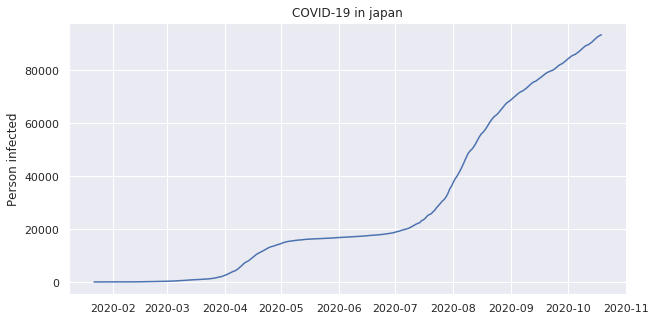

In [ ]:
sns.set()
plt.figure(figsize=(10, 5))
plt.plot(daily_japan)
plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

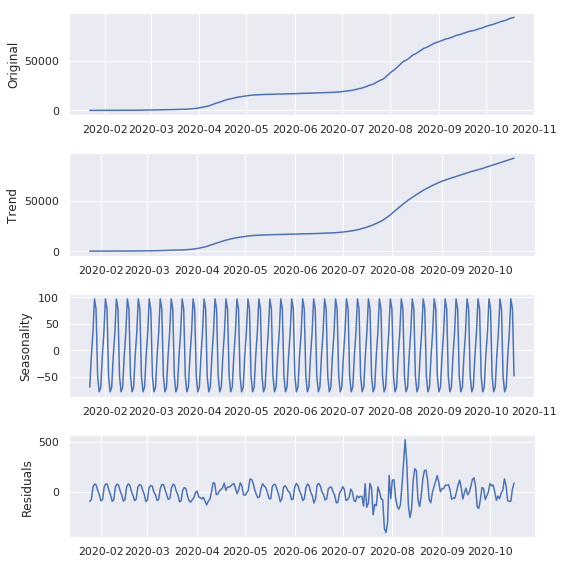

In [ ]:
res = sm.tsa.seasonal_decompose(daily_japan)#データを分解

original = daily_japan # オリジナルデータ
trend = res.trend # トレンドデータ
seasonal = res.seasonal # 季節性データ
residual = res.resid # 残差データ

plt.figure(figsize=(8, 8)) # グラフ描画枠作成、サイズ指定

# オリジナルデータのプロット
plt.subplot(411) # グラフ4行1列の1番目の位置（一番上）
plt.plot(original)
plt.ylabel('Original')

# trend データのプロット
plt.subplot(412) # グラフ4行1列の2番目の位置
plt.plot(trend)
plt.ylabel('Trend')

# seasonalデータ のプロット
plt.subplot(413) # グラフ4行1列の3番目の位置
plt.plot(seasonal)
plt.ylabel('Seasonality')

# residual データのプロット
plt.subplot(414) # グラフ4行1列の4番目の位置（一番下）
plt.plot(residual)
plt.ylabel('Residuals')

plt.tight_layout() # グラフの間隔を自動調整

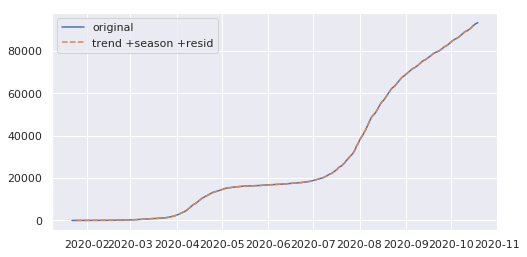

In [ ]:
sum_three_data = trend + seasonal + residual # トレンド + 季節性 + 残差

plt.figure(figsize=(8, 4)) # グラフ描画枠作成、サイズ指定
plt.plot(original, label='original')
plt.plot(sum_three_data, label='trend +season +resid', linestyle='--')
plt.legend(loc='best') # 凡例表示

In [ ]:
# ADF検定（原型列で確認だけ）
res_ctt = sm.tsa.stattools.adfuller(daily_japan, regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = sm.tsa.stattools.adfuller(daily_japan, regression="ct") # トレンド項あり（１次）、定数項あり
res_c = sm.tsa.stattools.adfuller(daily_japan, regression="c") # トレンド項なし、定数項あり
res_nc = sm.tsa.stattools.adfuller(daily_japan, regression="nc") # トレンド項なし、定数項なし

In [ ]:
print("ctt:")
print(res_ctt[1])
print("-------------------------------")
print("ct:")
print(res_ct[1])
print("-------------------------------")
print("c:")
print(res_c[1])
print("-------------------------------")
print("nc:")
print(res_nc[1])

ctt:
0.47291254303096286
-------------------------------
ct:
0.9172864066182708
-------------------------------
c:
0.996017692916598
-------------------------------
nc:
0.9820558713100673


出力結果の2番目の値がp値です。ADF検定ではでデータが単位根過程であることが帰無仮説になっていているので、棄却することができればデータが単位根過程でない、つまり定常であると判断できます。

In [ ]:
daily_japan_acf = sm.tsa.stattools.acf(daily_japan, nlags=40) #ラグ=40(デフォルト値)、省略可能
#daily_japan_acf

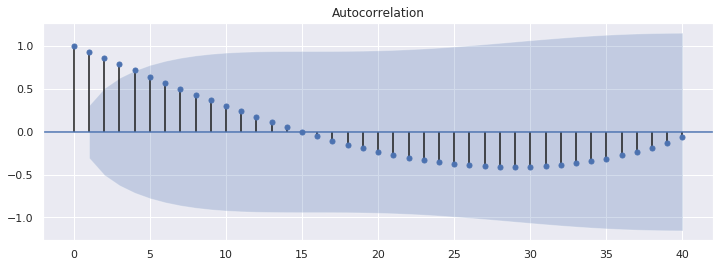

In [ ]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_acf(daily_japan_acf, lags=40, ax=ax1) #飛行機乗客数データ、ラグ40、グラフaxes
plt.show() # インライン表示で同じグラフが2個出でるので回避

In [ ]:
daily_japan_pacf = sm.tsa.stattools.pacf(daily_japan, nlags=40) #ラグ=40(デフォルト値)、省略可能
#daily_japan_pacf

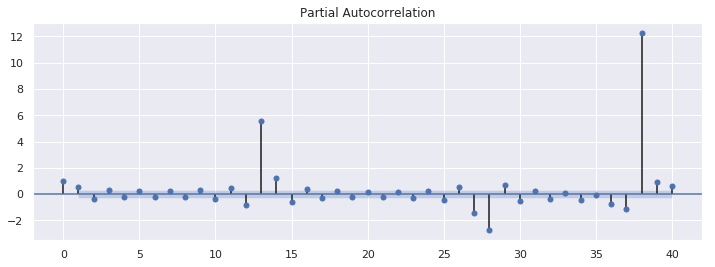

In [ ]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_pacf(daily_japan_pacf, lags=40, ax=ax1) #飛行機乗客数データ、ラグ40、グラフaxes
plt.show() # インライン表示で同じグラフが2個出でるので回避

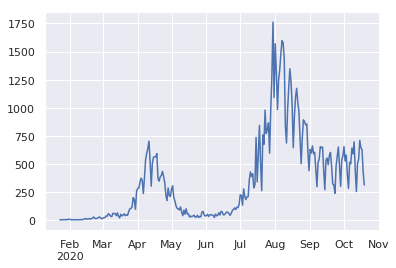

In [ ]:
daily_japan_diff = daily_japan - daily_japan.shift() # 差分(1階差)　Pandasのdiff()でpassengers.diff()としてもOK
daily_japan_diff = daily_japan_diff.dropna() # 1個できるNaNデータは捨てる
daily_japan_diff.plot()

In [ ]:
daily_japan_diff.tail(7)

2020-10-13    501.0
2020-10-14    541.0
2020-10-15    708.0
2020-10-16    642.0
2020-10-17    626.0
2020-10-18    428.0
2020-10-19    310.0
Name: 151, dtype: float64

In [ ]:
daily_japan_diff_train = daily_japan_diff.copy()[:-7]

In [ ]:
print(daily_japan_diff.tail(7))
print(daily_japan_diff_train.tail(7))

2020-10-13    501.0
2020-10-14    541.0
2020-10-15    708.0
2020-10-16    642.0
2020-10-17    626.0
2020-10-18    428.0
2020-10-19    310.0
Name: 151, dtype: float64
2020-10-06    513.0
2020-10-07    499.0
2020-10-08    640.0
2020-10-09    588.0
2020-10-10    695.0
2020-10-11    438.0
2020-10-12    252.0
Name: 151, dtype: float64


In [ ]:
test_data = daily_japan_diff.copy()[-7:]
test_data

2020-10-13    501.0
2020-10-14    541.0
2020-10-15    708.0
2020-10-16    642.0
2020-10-17    626.0
2020-10-18    428.0
2020-10-19    310.0
Name: 151, dtype: float64

In [ ]:
# ADF検定（原型列で確認だけ）
res_ctt = sm.tsa.stattools.adfuller(daily_japan_diff, regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = sm.tsa.stattools.adfuller(daily_japan_diff, regression="ct") # トレンド項あり（１次）、定数項あり
res_c = sm.tsa.stattools.adfuller(daily_japan_diff, regression="c") # トレンド項なし、定数項あり
res_nc = sm.tsa.stattools.adfuller(daily_japan_diff, regression="nc") # トレンド項なし、定数項なし
print("ctt:")
print(res_ctt[1])
print("-------------------------------")
print("ct:")
print(res_ct[1])
print("-------------------------------")
print("c:")
print(res_c[1])
print("-------------------------------")
print("nc:")
print(res_nc[1])

ctt:
0.43495334416138426
-------------------------------
ct:
0.21676759623652708
-------------------------------
c:
0.21754744905770285
-------------------------------
nc:
0.19486094747207094


In [ ]:
daily_japan_diff_acf = sm.tsa.stattools.acf(daily_japan_diff_train, nlags=40) #ラグ=40(デフォルト値)、省略可能
#daily_japan_diff_acf

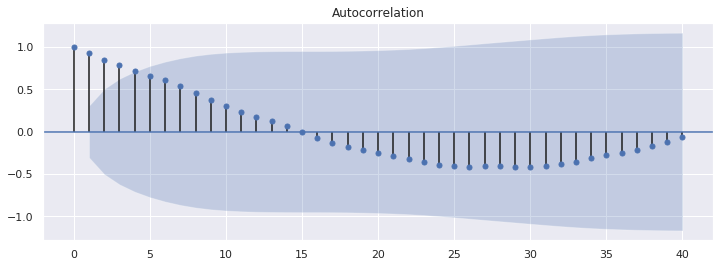

In [ ]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_acf(daily_japan_diff_acf, lags=40, ax=ax1) #飛行機乗客数データ、ラグ40、グラフaxes
plt.show() # インライン表示で同じグラフが2個出でるので回避

In [ ]:
daily_japan_diff_pacf = sm.tsa.stattools.pacf(daily_japan_diff_train, nlags=40) #ラグ=40(デフォルト値)、省略可能
#daily_japan_diff_pacf

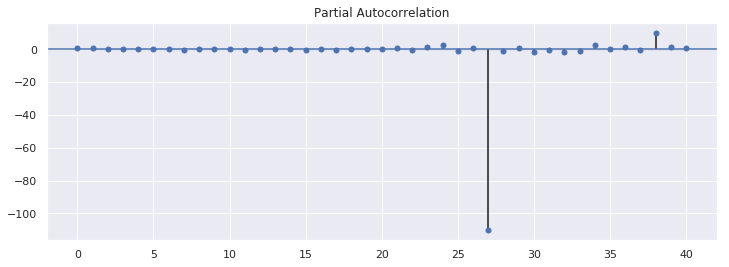

In [ ]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_pacf(daily_japan_diff_pacf, lags=40, ax=ax1) #飛行機乗客数データ、ラグ40、グラフaxes
plt.show() # インライン表示で同じグラフが2個出でるので回避

In [ ]:
# 自動ARMAパラメータ推定関数
res_selection = sm.tsa.arma_order_select_ic(daily_japan_diff_train, ic='aic', trend='nc')
res_selection

{'aic':              0            1            2
 0          NaN  3765.174152  3631.256343
 1  3351.867907  3345.450543  3329.229398
 2  3348.515471  3330.471404  3329.831599
 3  3344.977916  3328.091650  3286.254014
 4  3340.941689  3323.584045  3280.185814, 'aic_min_order': (4, 2)}

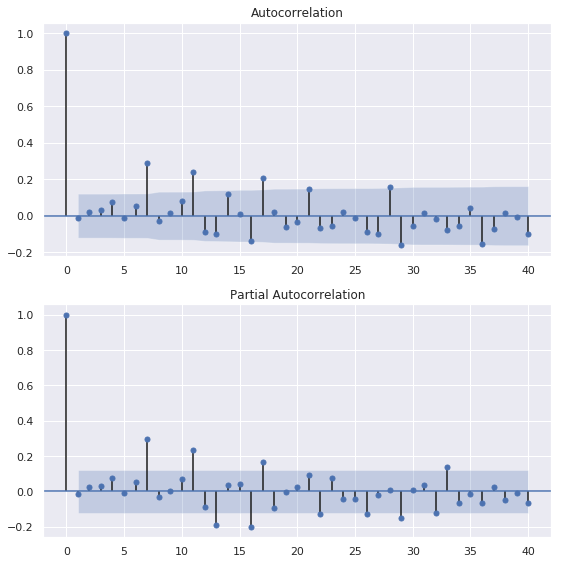

In [ ]:
# SRIMAモデル（試しに）季節調整なし = ARIMAモデル
sarimax_noseasonal = sm.tsa.SARIMAX(daily_japan_diff_train, 
                        order=(4, 1, 2),
                        seasonal_order=(0, 0, 0, 0),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

sarimax_noseasonal_resid = sarimax_noseasonal.resid # 残差成分

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_noseasonal_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_noseasonal_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

<function matplotlib.pyplot.show(*args, **kw)>

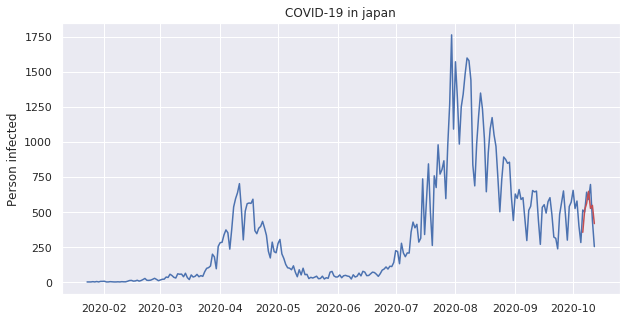

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff_train)
sarimax_noseasonal_eval = sarimax_noseasonal.predict('2020-10-06', '2020-10-12') 
plt.plot(sarimax_noseasonal_eval, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

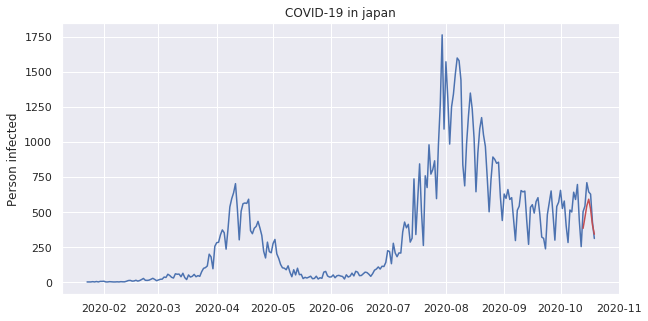

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff)
#plt.plot(test_data)
sarimax_pred = sarimax_noseasonal.predict('2020-10-13', '2020-10-19') 
plt.plot(sarimax_pred, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

In [ ]:
# SARIMAパラメター最適化（総当たりチェック）
import warnings
warnings.filterwarnings('ignore') # 警告非表示（収束：ConvergenceWarning）

# パラメータ範囲
# order(p, d, q)
min_p = 1; max_p = 5 # min_pは1以上を指定しないとエラー
min_d = 0; max_d = 3
min_q = 0; max_q = 5

# seasonal_order(sp, sd, sq)
min_sp = 0; max_sp = 5
min_sd = 0; max_sd = 3
min_sq = 0; max_sq = 5

test_pattern = (max_p - min_p +1)*(max_q - min_q + 1)*(max_d - min_d + 1)*(max_sp - min_sp + 1)*(max_sq - min_sq + 1)*(max_sd - min_sd + 1)
print("pattern:", test_pattern)

sfq = 7 # seasonal_order周期パラメータ
ts = daily_japan_diff_train # 時系列データ

test_results = pd.DataFrame(index=range(test_pattern), columns=["model_parameters", "aic"])
num = 0
for p in range(min_p, max_p + 1):
    for d in range(min_d, max_d + 1):
        for q in range(min_q, max_q + 1):
            for sp in range(min_sp, max_sp + 1):
                for sd in range(min_sd, max_sd + 1):
                    for sq in range(min_sq, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p, d, q), 
                            seasonal_order=(sp, sd, sq, sfq), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        test_results.iloc[num]["model_parameters"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), seasonal_order=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        test_results.iloc[num]["aic"] = sarima.aic
                        print(num,'/', test_pattern-1, test_results.iloc[num]["model_parameters"],  test_results.iloc[num]["aic"] )
                        num = num + 1

# 結果（最小AiC）
print("best[aic] parameter ********")
print(test_results[test_results.aic == min(test_results.aic)])

pattern: 17280
0 / 17279 order=(1,0,0), seasonal_order=(0,0,0) 3337.596740517198
1 / 17279 order=(1,0,0), seasonal_order=(0,0,1) 3223.17779854704
2 / 17279 order=(1,0,0), seasonal_order=(0,0,2) 3126.318715997198
3 / 17279 order=(1,0,0), seasonal_order=(0,0,3) 3042.65986065684
4 / 17279 order=(1,0,0), seasonal_order=(0,0,4) 2949.2172138308606
5 / 17279 order=(1,0,0), seasonal_order=(0,0,5) 2868.9587137897415
6 / 17279 order=(1,0,0), seasonal_order=(0,1,0) 3237.825388532714
7 / 17279 order=(1,0,0), seasonal_order=(0,1,1) 3090.959649721616
8 / 17279 order=(1,0,0), seasonal_order=(0,1,2) 3011.6350457381695
9 / 17279 order=(1,0,0), seasonal_order=(0,1,3) 2931.967672787809
10 / 17279 order=(1,0,0), seasonal_order=(0,1,4) 2853.6320602683063
11 / 17279 order=(1,0,0), seasonal_order=(0,1,5) 2770.3869963447896
12 / 17279 order=(1,0,0), seasonal_order=(0,2,0) 3368.4570114808457
13 / 17279 order=(1,0,0), seasonal_order=(0,2,1) 3095.9137294066627
14 / 17279 order=(1,0,0), seasonal_order=(0,2,2) 295

121 / 17279 order=(1,0,0), seasonal_order=(5,0,1) 2855.122499254392
122 / 17279 order=(1,0,0), seasonal_order=(5,0,2) 2856.1206621701913
123 / 17279 order=(1,0,0), seasonal_order=(5,0,3) 2857.018827646082
124 / 17279 order=(1,0,0), seasonal_order=(5,0,4) 2864.66756039077
125 / 17279 order=(1,0,0), seasonal_order=(5,0,5) 2865.9459462705126
126 / 17279 order=(1,0,0), seasonal_order=(5,1,0) 2776.29937541582
127 / 17279 order=(1,0,0), seasonal_order=(5,1,1) 2774.536507913292
128 / 17279 order=(1,0,0), seasonal_order=(5,1,2) 2774.459760948813
129 / 17279 order=(1,0,0), seasonal_order=(5,1,3) 2775.4005418731067
130 / 17279 order=(1,0,0), seasonal_order=(5,1,4) 2779.698939947408
131 / 17279 order=(1,0,0), seasonal_order=(5,1,5) 2778.538811443026
132 / 17279 order=(1,0,0), seasonal_order=(5,2,0) 2751.234036861384
133 / 17279 order=(1,0,0), seasonal_order=(5,2,1) 2715.6280898793584
134 / 17279 order=(1,0,0), seasonal_order=(5,2,2) 2716.4238670748914
135 / 17279 order=(1,0,0), seasonal_order=(5,

241 / 17279 order=(1,0,1), seasonal_order=(4,0,1) 2907.537117009925
242 / 17279 order=(1,0,1), seasonal_order=(4,0,2) 2909.6906904725556
243 / 17279 order=(1,0,1), seasonal_order=(4,0,3) 2915.182109625203
244 / 17279 order=(1,0,1), seasonal_order=(4,0,4) 2909.9173891287446
245 / 17279 order=(1,0,1), seasonal_order=(4,0,5) 2832.163705898988
246 / 17279 order=(1,0,1), seasonal_order=(4,1,0) 2835.8165116620657
247 / 17279 order=(1,0,1), seasonal_order=(4,1,1) 2829.668963800109
248 / 17279 order=(1,0,1), seasonal_order=(4,1,2) 2828.466260555092
249 / 17279 order=(1,0,1), seasonal_order=(4,1,3) 2828.2186220274807
250 / 17279 order=(1,0,1), seasonal_order=(4,1,4) 2820.1209542233187
251 / 17279 order=(1,0,1), seasonal_order=(4,1,5) 2742.023260892299
252 / 17279 order=(1,0,1), seasonal_order=(4,2,0) 2831.16055836277
253 / 17279 order=(1,0,1), seasonal_order=(4,2,1) 2775.5267976063124
254 / 17279 order=(1,0,1), seasonal_order=(4,2,2) 2777.5384779307815
255 / 17279 order=(1,0,1), seasonal_order=

361 / 17279 order=(1,0,2), seasonal_order=(3,0,1) 2988.9387331652338
362 / 17279 order=(1,0,2), seasonal_order=(3,0,2) 2990.0140427046017
363 / 17279 order=(1,0,2), seasonal_order=(3,0,3) 2972.1014204803187
364 / 17279 order=(1,0,2), seasonal_order=(3,0,4) 2889.9199812355128
365 / 17279 order=(1,0,2), seasonal_order=(3,0,5) 2817.067846401282
366 / 17279 order=(1,0,2), seasonal_order=(3,1,0) 2915.3857036535746
367 / 17279 order=(1,0,2), seasonal_order=(3,1,1) 2908.6013482536723
368 / 17279 order=(1,0,2), seasonal_order=(3,1,2) 2908.8241418062053
369 / 17279 order=(1,0,2), seasonal_order=(3,1,3) 2887.372618283895
370 / 17279 order=(1,0,2), seasonal_order=(3,1,4) 2811.6197046806046
371 / 17279 order=(1,0,2), seasonal_order=(3,1,5) 2730.153956090174
372 / 17279 order=(1,0,2), seasonal_order=(3,2,0) 2922.1995723402642
373 / 17279 order=(1,0,2), seasonal_order=(3,2,1) 2858.3574482949316
374 / 17279 order=(1,0,2), seasonal_order=(3,2,2) 2858.7905110671563
375 / 17279 order=(1,0,2), seasonal_o

481 / 17279 order=(1,0,3), seasonal_order=(2,0,1) 3068.3031547974824
482 / 17279 order=(1,0,3), seasonal_order=(2,0,2) 3035.031760670058
483 / 17279 order=(1,0,3), seasonal_order=(2,0,3) 2956.8523588805283
484 / 17279 order=(1,0,3), seasonal_order=(2,0,4) 2878.7400623298063
485 / 17279 order=(1,0,3), seasonal_order=(2,0,5) 2795.5472506577994
486 / 17279 order=(1,0,3), seasonal_order=(2,1,0) 3005.2135685531075
487 / 17279 order=(1,0,3), seasonal_order=(2,1,1) 2987.9473359796457
488 / 17279 order=(1,0,3), seasonal_order=(2,1,2) 2954.556670656228
489 / 17279 order=(1,0,3), seasonal_order=(2,1,3) 2876.4037021021622
490 / 17279 order=(1,0,3), seasonal_order=(2,1,4) 2799.7391995415737
491 / 17279 order=(1,0,3), seasonal_order=(2,1,5) 2715.9870783754577
492 / 17279 order=(1,0,3), seasonal_order=(2,2,0) 3046.090251883521
493 / 17279 order=(1,0,3), seasonal_order=(2,2,1) 2948.6493923942426
494 / 17279 order=(1,0,3), seasonal_order=(2,2,2) 2907.144739185812
495 / 17279 order=(1,0,3), seasonal_or

601 / 17279 order=(1,0,4), seasonal_order=(1,0,1) 3100.983003396934
602 / 17279 order=(1,0,4), seasonal_order=(1,0,2) 3023.5952628335835
603 / 17279 order=(1,0,4), seasonal_order=(1,0,3) 2946.630168325069
604 / 17279 order=(1,0,4), seasonal_order=(1,0,4) 2869.3233593589193
605 / 17279 order=(1,0,4), seasonal_order=(1,0,5) 2786.3064885258495
606 / 17279 order=(1,0,4), seasonal_order=(1,1,0) 3096.5719446253015
607 / 17279 order=(1,0,4), seasonal_order=(1,1,1) 3021.7607472932796
608 / 17279 order=(1,0,4), seasonal_order=(1,1,2) 2943.9814985179573
609 / 17279 order=(1,0,4), seasonal_order=(1,1,3) 2864.111814262701
610 / 17279 order=(1,0,4), seasonal_order=(1,1,4) 2786.6371163410968
611 / 17279 order=(1,0,4), seasonal_order=(1,1,5) 2703.705253441908
612 / 17279 order=(1,0,4), seasonal_order=(1,2,0) 3151.3205985670047
613 / 17279 order=(1,0,4), seasonal_order=(1,2,1) 2993.3580722061547
614 / 17279 order=(1,0,4), seasonal_order=(1,2,2) 2930.164225466983
615 / 17279 order=(1,0,4), seasonal_ord

721 / 17279 order=(1,0,5), seasonal_order=(0,0,1) 3123.5413086865656
722 / 17279 order=(1,0,5), seasonal_order=(0,0,2) 3034.414617542906
723 / 17279 order=(1,0,5), seasonal_order=(0,0,3) 2948.291786768006
724 / 17279 order=(1,0,5), seasonal_order=(0,0,4) 2859.4613441641354
725 / 17279 order=(1,0,5), seasonal_order=(0,0,5) 2781.358014541382
726 / 17279 order=(1,0,5), seasonal_order=(0,1,0) 3135.9191087265435
727 / 17279 order=(1,0,5), seasonal_order=(0,1,1) 3005.843723943247
728 / 17279 order=(1,0,5), seasonal_order=(0,1,2) 2922.6225035994676
729 / 17279 order=(1,0,5), seasonal_order=(0,1,3) 2844.824458535397
730 / 17279 order=(1,0,5), seasonal_order=(0,1,4) 2766.3572426475694
731 / 17279 order=(1,0,5), seasonal_order=(0,1,5) 2685.1598075834063
732 / 17279 order=(1,0,5), seasonal_order=(0,2,0) 3189.737780279649
733 / 17279 order=(1,0,5), seasonal_order=(0,2,1) 2997.7260337209545
734 / 17279 order=(1,0,5), seasonal_order=(0,2,2) 2877.4491281947494
735 / 17279 order=(1,0,5), seasonal_orde

841 / 17279 order=(1,0,5), seasonal_order=(5,0,1) 2827.6216114874915
842 / 17279 order=(1,0,5), seasonal_order=(5,0,2) 2832.93741941708
843 / 17279 order=(1,0,5), seasonal_order=(5,0,3) 2839.7026999215013
844 / 17279 order=(1,0,5), seasonal_order=(5,0,4) 2842.078803659683
845 / 17279 order=(1,0,5), seasonal_order=(5,0,5) 2784.621492368864
846 / 17279 order=(1,0,5), seasonal_order=(5,1,0) 2749.0381722837938
847 / 17279 order=(1,0,5), seasonal_order=(5,1,1) 2746.7187076076616
848 / 17279 order=(1,0,5), seasonal_order=(5,1,2) 2745.9889084884053
849 / 17279 order=(1,0,5), seasonal_order=(5,1,3) 2747.1678103599606
850 / 17279 order=(1,0,5), seasonal_order=(5,1,4) 2752.050479418005
851 / 17279 order=(1,0,5), seasonal_order=(5,1,5) 2702.693994116828
852 / 17279 order=(1,0,5), seasonal_order=(5,2,0) 2724.6898896969587
853 / 17279 order=(1,0,5), seasonal_order=(5,2,1) 2690.117902879795
854 / 17279 order=(1,0,5), seasonal_order=(5,2,2) 2690.8176920923524
855 / 17279 order=(1,0,5), seasonal_order

961 / 17279 order=(1,1,0), seasonal_order=(4,0,1) 2907.52759887067
962 / 17279 order=(1,1,0), seasonal_order=(4,0,2) 2908.8339771385054
963 / 17279 order=(1,1,0), seasonal_order=(4,0,3) 2910.803791004898
964 / 17279 order=(1,1,0), seasonal_order=(4,0,4) 2912.792618514576
965 / 17279 order=(1,1,0), seasonal_order=(4,0,5) 2830.138627118965
966 / 17279 order=(1,1,0), seasonal_order=(4,1,0) 2835.0927955675215
967 / 17279 order=(1,1,0), seasonal_order=(4,1,1) 2829.488284631814
968 / 17279 order=(1,1,0), seasonal_order=(4,1,2) 2828.378508481108
969 / 17279 order=(1,1,0), seasonal_order=(4,1,3) 2828.6785280222775
970 / 17279 order=(1,1,0), seasonal_order=(4,1,4) 2830.3564950665004
971 / 17279 order=(1,1,0), seasonal_order=(4,1,5) 2750.805927149069
972 / 17279 order=(1,1,0), seasonal_order=(4,2,0) 2831.739221740575
973 / 17279 order=(1,1,0), seasonal_order=(4,2,1) 2774.285237689618
974 / 17279 order=(1,1,0), seasonal_order=(4,2,2) 2776.1041695296653
975 / 17279 order=(1,1,0), seasonal_order=(4

1080 / 17279 order=(1,1,1), seasonal_order=(3,0,0) 2978.5050580270927
1081 / 17279 order=(1,1,1), seasonal_order=(3,0,1) 2978.589916514592
1082 / 17279 order=(1,1,1), seasonal_order=(3,0,2) 2979.5494007737275
1083 / 17279 order=(1,1,1), seasonal_order=(3,0,3) 2968.2421896362894
1084 / 17279 order=(1,1,1), seasonal_order=(3,0,4) 2890.609090551819
1085 / 17279 order=(1,1,1), seasonal_order=(3,0,5) 2807.1975632463186
1086 / 17279 order=(1,1,1), seasonal_order=(3,1,0) 2906.078239570553
1087 / 17279 order=(1,1,1), seasonal_order=(3,1,1) 2898.1103257843397
1088 / 17279 order=(1,1,1), seasonal_order=(3,1,2) 2898.2249232091217
1089 / 17279 order=(1,1,1), seasonal_order=(3,1,3) 2889.48355500917
1090 / 17279 order=(1,1,1), seasonal_order=(3,1,4) 2809.9729895321243
1091 / 17279 order=(1,1,1), seasonal_order=(3,1,5) 2727.609818663889
1092 / 17279 order=(1,1,1), seasonal_order=(3,2,0) 2915.7846358966044
1093 / 17279 order=(1,1,1), seasonal_order=(3,2,1) 2881.271765995983
1094 / 17279 order=(1,1,1),

1198 / 17279 order=(1,1,2), seasonal_order=(1,3,4) 2957.073270347655
1199 / 17279 order=(1,1,2), seasonal_order=(1,3,5) 2929.7689276953697
1200 / 17279 order=(1,1,2), seasonal_order=(2,0,0) 3061.382809134051
1201 / 17279 order=(1,1,2), seasonal_order=(2,0,1) 3053.874153600288
1202 / 17279 order=(1,1,2), seasonal_order=(2,0,2) 3032.4437150074946
1203 / 17279 order=(1,1,2), seasonal_order=(2,0,3) 2957.9793900599834
1204 / 17279 order=(1,1,2), seasonal_order=(2,0,4) 2879.628910238271
1205 / 17279 order=(1,1,2), seasonal_order=(2,0,5) 2799.7447286356582
1206 / 17279 order=(1,1,2), seasonal_order=(2,1,0) 2996.8353925079614
1207 / 17279 order=(1,1,2), seasonal_order=(2,1,1) 2977.5628651925545
1208 / 17279 order=(1,1,2), seasonal_order=(2,1,2) 2955.644191955782
1209 / 17279 order=(1,1,2), seasonal_order=(2,1,3) 2878.320659763659
1210 / 17279 order=(1,1,2), seasonal_order=(2,1,4) 2799.272170224792
1211 / 17279 order=(1,1,2), seasonal_order=(2,1,5) 2716.614784669897
1212 / 17279 order=(1,1,2), 

1316 / 17279 order=(1,1,3), seasonal_order=(0,3,2) 2977.3990263766445
1317 / 17279 order=(1,1,3), seasonal_order=(0,3,3) 2958.783887987941
1318 / 17279 order=(1,1,3), seasonal_order=(0,3,4) 2924.493247992906
1319 / 17279 order=(1,1,3), seasonal_order=(0,3,5) 2861.166141383142
1320 / 17279 order=(1,1,3), seasonal_order=(1,0,0) 3148.8932917297334
1321 / 17279 order=(1,1,3), seasonal_order=(1,0,1) 3102.545174179321
1322 / 17279 order=(1,1,3), seasonal_order=(1,0,2) 3024.799263299372
1323 / 17279 order=(1,1,3), seasonal_order=(1,0,3) 2947.8015344839096
1324 / 17279 order=(1,1,3), seasonal_order=(1,0,4) 2868.569006018049
1325 / 17279 order=(1,1,3), seasonal_order=(1,0,5) 2799.9532495018448
1326 / 17279 order=(1,1,3), seasonal_order=(1,1,0) 3089.5404341948347
1327 / 17279 order=(1,1,3), seasonal_order=(1,1,1) 3018.895427497787
1328 / 17279 order=(1,1,3), seasonal_order=(1,1,2) 2940.9803286108618
1329 / 17279 order=(1,1,3), seasonal_order=(1,1,3) 2865.498174865971
1330 / 17279 order=(1,1,3), 

1434 / 17279 order=(1,1,3), seasonal_order=(5,3,0) 2881.393739904851
1435 / 17279 order=(1,1,3), seasonal_order=(5,3,1) 2709.9857590584243
1436 / 17279 order=(1,1,3), seasonal_order=(5,3,2) 3017.8178603866227
1437 / 17279 order=(1,1,3), seasonal_order=(5,3,3) 2920.969551808003
1438 / 17279 order=(1,1,3), seasonal_order=(5,3,4) 3019.330783787524
1439 / 17279 order=(1,1,3), seasonal_order=(5,3,5) 2973.9395411825103
1440 / 17279 order=(1,1,4), seasonal_order=(0,0,0) 3237.662566867947
1441 / 17279 order=(1,1,4), seasonal_order=(0,0,1) 3132.7402854687525
1442 / 17279 order=(1,1,4), seasonal_order=(0,0,2) 3038.2530853374155
1443 / 17279 order=(1,1,4), seasonal_order=(0,0,3) 2953.907875954911
1444 / 17279 order=(1,1,4), seasonal_order=(0,0,4) 2865.0290116435995
1445 / 17279 order=(1,1,4), seasonal_order=(0,0,5) 2787.0678965833895
1446 / 17279 order=(1,1,4), seasonal_order=(0,1,0) 3159.3285649464033
1447 / 17279 order=(1,1,4), seasonal_order=(0,1,1) 3015.4401986968664
1448 / 17279 order=(1,1,4

1552 / 17279 order=(1,1,4), seasonal_order=(4,2,4) 2777.5033772737233
1553 / 17279 order=(1,1,4), seasonal_order=(4,2,5) 2739.698915167788
1554 / 17279 order=(1,1,4), seasonal_order=(4,3,0) 2863.0380159667434
1555 / 17279 order=(1,1,4), seasonal_order=(4,3,1) 2961.3779818423204
1556 / 17279 order=(1,1,4), seasonal_order=(4,3,2) 2932.835162213565
1557 / 17279 order=(1,1,4), seasonal_order=(4,3,3) 3103.039130246186
1558 / 17279 order=(1,1,4), seasonal_order=(4,3,4) 3065.041517040773
1559 / 17279 order=(1,1,4), seasonal_order=(4,3,5) 2937.309741941736
1560 / 17279 order=(1,1,4), seasonal_order=(5,0,0) 2822.5489462754085
1561 / 17279 order=(1,1,4), seasonal_order=(5,0,1) 2826.3727468703673
1562 / 17279 order=(1,1,4), seasonal_order=(5,0,2) 2829.6165316362058
1563 / 17279 order=(1,1,4), seasonal_order=(5,0,3) 2831.2020532319693
1564 / 17279 order=(1,1,4), seasonal_order=(5,0,4) 2832.3232033208824
1565 / 17279 order=(1,1,4), seasonal_order=(5,0,5) 2786.4404683357807
1566 / 17279 order=(1,1,4

1670 / 17279 order=(1,1,5), seasonal_order=(3,2,2) 2881.9665347305045
1671 / 17279 order=(1,1,5), seasonal_order=(3,2,3) 2912.8105672101374
1672 / 17279 order=(1,1,5), seasonal_order=(3,2,4) 2821.1336104529482
1673 / 17279 order=(1,1,5), seasonal_order=(3,2,5) 2724.7691373911043
1674 / 17279 order=(1,1,5), seasonal_order=(3,3,0) 2956.9830625444783
1675 / 17279 order=(1,1,5), seasonal_order=(3,3,1) 2970.1623915351975
1676 / 17279 order=(1,1,5), seasonal_order=(3,3,2) 2981.847797286484
1677 / 17279 order=(1,1,5), seasonal_order=(3,3,3) 3124.5266655956075
1678 / 17279 order=(1,1,5), seasonal_order=(3,3,4) 3051.0536529123174
1679 / 17279 order=(1,1,5), seasonal_order=(3,3,5) 2945.693696047228
1680 / 17279 order=(1,1,5), seasonal_order=(4,0,0) 2890.2940087420816
1681 / 17279 order=(1,1,5), seasonal_order=(4,0,1) 2892.241891441007
1682 / 17279 order=(1,1,5), seasonal_order=(4,0,2) 2900.2437573974485
1683 / 17279 order=(1,1,5), seasonal_order=(4,0,3) 2905.0409981580983
1684 / 17279 order=(1,1

1788 / 17279 order=(1,2,0), seasonal_order=(2,2,0) 3186.345795081854
1789 / 17279 order=(1,2,0), seasonal_order=(2,2,1) 3077.644605589473
1790 / 17279 order=(1,2,0), seasonal_order=(2,2,2) 3067.0819358061603
1791 / 17279 order=(1,2,0), seasonal_order=(2,2,3) 2978.0390463309013
1792 / 17279 order=(1,2,0), seasonal_order=(2,2,4) 2891.9386720171838
1793 / 17279 order=(1,2,0), seasonal_order=(2,2,5) 2817.631474389417
1794 / 17279 order=(1,2,0), seasonal_order=(2,3,0) 3187.765270535133
1795 / 17279 order=(1,2,0), seasonal_order=(2,3,1) 3340.668389173745
1796 / 17279 order=(1,2,0), seasonal_order=(2,3,2) 3390.1030554374747
1797 / 17279 order=(1,2,0), seasonal_order=(2,3,3) 3271.256169860794
1798 / 17279 order=(1,2,0), seasonal_order=(2,3,4) 2896.5023295879773
1799 / 17279 order=(1,2,0), seasonal_order=(2,3,5) 2804.792678914397
1800 / 17279 order=(1,2,0), seasonal_order=(3,0,0) 3123.8753974571237
1801 / 17279 order=(1,2,0), seasonal_order=(3,0,1) 3123.231150835196
1802 / 17279 order=(1,2,0), 

1906 / 17279 order=(1,2,1), seasonal_order=(1,1,4) 2811.7365931574723
1907 / 17279 order=(1,2,1), seasonal_order=(1,1,5) 2729.208605851575
1908 / 17279 order=(1,2,1), seasonal_order=(1,2,0) 3177.7374932098155
1909 / 17279 order=(1,2,1), seasonal_order=(1,2,1) 3026.46606411417
1910 / 17279 order=(1,2,1), seasonal_order=(1,2,2) 2920.687594666131
1911 / 17279 order=(1,2,1), seasonal_order=(1,2,3) 2838.433749169064
1912 / 17279 order=(1,2,1), seasonal_order=(1,2,4) 2754.9798619515805
1913 / 17279 order=(1,2,1), seasonal_order=(1,2,5) 2679.3881731609563
1914 / 17279 order=(1,2,1), seasonal_order=(1,3,0) 3433.32532438987
1915 / 17279 order=(1,2,1), seasonal_order=(1,3,1) 3416.9904454201424
1916 / 17279 order=(1,2,1), seasonal_order=(1,3,2) 3314.039208957983
1917 / 17279 order=(1,2,1), seasonal_order=(1,3,3) 3257.970525109459
1918 / 17279 order=(1,2,1), seasonal_order=(1,3,4) 2799.8774118160263
1919 / 17279 order=(1,2,1), seasonal_order=(1,3,5) 2706.166346816234
1920 / 17279 order=(1,2,1), se

2024 / 17279 order=(1,2,2), seasonal_order=(0,1,2) 2947.8502063391475
2025 / 17279 order=(1,2,2), seasonal_order=(0,1,3) 2869.6406938099453
2026 / 17279 order=(1,2,2), seasonal_order=(0,1,4) 2791.8244919950434
2027 / 17279 order=(1,2,2), seasonal_order=(0,1,5) 2710.5810459670683
2028 / 17279 order=(1,2,2), seasonal_order=(0,2,0) 3336.878737272621
2029 / 17279 order=(1,2,2), seasonal_order=(0,2,1) 3039.71603621554
2030 / 17279 order=(1,2,2), seasonal_order=(0,2,2) 2897.076295292706
2031 / 17279 order=(1,2,2), seasonal_order=(0,2,3) 2829.552010127208
2032 / 17279 order=(1,2,2), seasonal_order=(0,2,4) 2833.15560578259
2033 / 17279 order=(1,2,2), seasonal_order=(0,2,5) 2811.111241957703
2034 / 17279 order=(1,2,2), seasonal_order=(0,3,0) 3456.763101562794
2035 / 17279 order=(1,2,2), seasonal_order=(0,3,1) 3144.5112491767504
2036 / 17279 order=(1,2,2), seasonal_order=(0,3,2) 3016.571162554542
2037 / 17279 order=(1,2,2), seasonal_order=(0,3,3) 2894.1347880585417
2038 / 17279 order=(1,2,2), se

2143 / 17279 order=(1,2,2), seasonal_order=(5,1,1) 2755.162881381598
2144 / 17279 order=(1,2,2), seasonal_order=(5,1,2) 2753.919908456215
2145 / 17279 order=(1,2,2), seasonal_order=(5,1,3) 2759.390288503919
2146 / 17279 order=(1,2,2), seasonal_order=(5,1,4) 2759.9316667929925
2147 / 17279 order=(1,2,2), seasonal_order=(5,1,5) 2737.688309099365
2148 / 17279 order=(1,2,2), seasonal_order=(5,2,0) 2719.6836105567245
2149 / 17279 order=(1,2,2), seasonal_order=(5,2,1) 2835.754134374196
2150 / 17279 order=(1,2,2), seasonal_order=(5,2,2) 2834.992658015643
2151 / 17279 order=(1,2,2), seasonal_order=(5,2,3) 2830.2546379078367
2152 / 17279 order=(1,2,2), seasonal_order=(5,2,4) 2839.181312971994
2153 / 17279 order=(1,2,2), seasonal_order=(5,2,5) 2813.50462533303
2154 / 17279 order=(1,2,2), seasonal_order=(5,3,0) 2800.9178189586455
2155 / 17279 order=(1,2,2), seasonal_order=(5,3,1) 3090.25642047938
2156 / 17279 order=(1,2,2), seasonal_order=(5,3,2) 3088.9043208304934
2157 / 17279 order=(1,2,2), sea

2261 / 17279 order=(1,2,3), seasonal_order=(4,0,5) 2795.6710885265575
2262 / 17279 order=(1,2,3), seasonal_order=(4,1,0) 2819.6701010107813
2263 / 17279 order=(1,2,3), seasonal_order=(4,1,1) 2824.5210182908604
2264 / 17279 order=(1,2,3), seasonal_order=(4,1,2) 2867.8160792621475
2265 / 17279 order=(1,2,3), seasonal_order=(4,1,3) 2866.3482125245314
2266 / 17279 order=(1,2,3), seasonal_order=(4,1,4) 2829.3880311737294
2267 / 17279 order=(1,2,3), seasonal_order=(4,1,5) 2746.2362692229
2268 / 17279 order=(1,2,3), seasonal_order=(4,2,0) 2817.5235816691566
2269 / 17279 order=(1,2,3), seasonal_order=(4,2,1) 2965.216151554085
2270 / 17279 order=(1,2,3), seasonal_order=(4,2,2) 2977.1744264696254
2271 / 17279 order=(1,2,3), seasonal_order=(4,2,3) 2961.056915390408
2272 / 17279 order=(1,2,3), seasonal_order=(4,2,4) 2944.3059841610857
2273 / 17279 order=(1,2,3), seasonal_order=(4,2,5) 2859.5932471396327
2274 / 17279 order=(1,2,3), seasonal_order=(4,3,0) 3161.6015929638197
2275 / 17279 order=(1,2,3

2379 / 17279 order=(1,2,4), seasonal_order=(3,0,3) 2943.72960320722
2380 / 17279 order=(1,2,4), seasonal_order=(3,0,4) 2871.203649457258
2381 / 17279 order=(1,2,4), seasonal_order=(3,0,5) 2790.2812663616437
2382 / 17279 order=(1,2,4), seasonal_order=(3,1,0) 2901.0809890429946
2383 / 17279 order=(1,2,4), seasonal_order=(3,1,1) 2917.402999735493
2384 / 17279 order=(1,2,4), seasonal_order=(3,1,2) 2936.998926034154
2385 / 17279 order=(1,2,4), seasonal_order=(3,1,3) 2857.155791530504
2386 / 17279 order=(1,2,4), seasonal_order=(3,1,4) 2821.6666160257537
2387 / 17279 order=(1,2,4), seasonal_order=(3,1,5) 2715.482713475102
2388 / 17279 order=(1,2,4), seasonal_order=(3,2,0) 2910.0485969060546
2389 / 17279 order=(1,2,4), seasonal_order=(3,2,1) 2879.7197040785186
2390 / 17279 order=(1,2,4), seasonal_order=(3,2,2) 2981.324009632901
2391 / 17279 order=(1,2,4), seasonal_order=(3,2,3) 3032.4305865161373
2392 / 17279 order=(1,2,4), seasonal_order=(3,2,4) 2892.9829139737412
2393 / 17279 order=(1,2,4), 

2497 / 17279 order=(1,2,5), seasonal_order=(2,0,1) 3081.761633897945
2498 / 17279 order=(1,2,5), seasonal_order=(2,0,2) 3019.433040517142
2499 / 17279 order=(1,2,5), seasonal_order=(2,0,3) 2942.3899312994163
2500 / 17279 order=(1,2,5), seasonal_order=(2,0,4) 2860.8310795614852
2501 / 17279 order=(1,2,5), seasonal_order=(2,0,5) 2780.0888587392797
2502 / 17279 order=(1,2,5), seasonal_order=(2,1,0) 2999.974893000763
2503 / 17279 order=(1,2,5), seasonal_order=(2,1,1) 2980.413864646002
2504 / 17279 order=(1,2,5), seasonal_order=(2,1,2) 2916.527699516265
2505 / 17279 order=(1,2,5), seasonal_order=(2,1,3) 2863.8257699539636
2506 / 17279 order=(1,2,5), seasonal_order=(2,1,4) 2766.120284519575
2507 / 17279 order=(1,2,5), seasonal_order=(2,1,5) 2698.6929489749573
2508 / 17279 order=(1,2,5), seasonal_order=(2,2,0) 3037.1310002186374
2509 / 17279 order=(1,2,5), seasonal_order=(2,2,1) 3047.2071266682287
2510 / 17279 order=(1,2,5), seasonal_order=(2,2,2) 3014.3247092288475
2511 / 17279 order=(1,2,5)

2615 / 17279 order=(1,3,0), seasonal_order=(0,3,5) 3360.978857008211
2616 / 17279 order=(1,3,0), seasonal_order=(1,0,0) 3539.068798978814
2617 / 17279 order=(1,3,0), seasonal_order=(1,0,1) 3506.512164883213
2618 / 17279 order=(1,3,0), seasonal_order=(1,0,2) 3412.6607993265916
2619 / 17279 order=(1,3,0), seasonal_order=(1,0,3) 3323.312276678118
2620 / 17279 order=(1,3,0), seasonal_order=(1,0,4) 3233.888095309667
2621 / 17279 order=(1,3,0), seasonal_order=(1,0,5) 3142.714058074106
2622 / 17279 order=(1,3,0), seasonal_order=(1,1,0) 3439.6056993284064
2623 / 17279 order=(1,3,0), seasonal_order=(1,1,1) 3414.5976148932714
2624 / 17279 order=(1,3,0), seasonal_order=(1,1,2) 3320.050005464227
2625 / 17279 order=(1,3,0), seasonal_order=(1,1,3) 3228.984479473882
2626 / 17279 order=(1,3,0), seasonal_order=(1,1,4) 3139.891155255679
2627 / 17279 order=(1,3,0), seasonal_order=(1,1,5) 3049.2360001792076
2628 / 17279 order=(1,3,0), seasonal_order=(1,2,0) 3526.0451545259634
2629 / 17279 order=(1,3,0), s

2733 / 17279 order=(1,3,0), seasonal_order=(5,3,3) 3365.223499432067
2734 / 17279 order=(1,3,0), seasonal_order=(5,3,4) 3364.224196880289
2735 / 17279 order=(1,3,0), seasonal_order=(5,3,5) 3368.795211442307
2736 / 17279 order=(1,3,1), seasonal_order=(0,0,0) 3438.440535800655
2737 / 17279 order=(1,3,1), seasonal_order=(0,0,1) 3325.8909948022156
2738 / 17279 order=(1,3,1), seasonal_order=(0,0,2) 3217.06341631193
2739 / 17279 order=(1,3,1), seasonal_order=(0,0,3) 3128.1088905574834
2740 / 17279 order=(1,3,1), seasonal_order=(0,0,4) 3034.2293017478833
2741 / 17279 order=(1,3,1), seasonal_order=(0,0,5) 2949.369549807756
2742 / 17279 order=(1,3,1), seasonal_order=(0,1,0) 3383.3589196149396
2743 / 17279 order=(1,3,1), seasonal_order=(0,1,1) 3188.7997958444366
2744 / 17279 order=(1,3,1), seasonal_order=(0,1,2) 3106.344797850137
2745 / 17279 order=(1,3,1), seasonal_order=(0,1,3) 3020.09554578641
2746 / 17279 order=(1,3,1), seasonal_order=(0,1,4) 2937.7044262872323
2747 / 17279 order=(1,3,1), se

2851 / 17279 order=(1,3,1), seasonal_order=(4,3,1) 3307.4385449621973
2852 / 17279 order=(1,3,1), seasonal_order=(4,3,2) 3308.9983001082155
2853 / 17279 order=(1,3,1), seasonal_order=(4,3,3) 3295.469308921234
2854 / 17279 order=(1,3,1), seasonal_order=(4,3,4) 3297.8411646780132
2855 / 17279 order=(1,3,1), seasonal_order=(4,3,5) 3180.3538791670117
2856 / 17279 order=(1,3,1), seasonal_order=(5,0,0) 2947.777172332252
2857 / 17279 order=(1,3,1), seasonal_order=(5,0,1) 2949.4196633358742
2858 / 17279 order=(1,3,1), seasonal_order=(5,0,2) 2953.1562018599066
2859 / 17279 order=(1,3,1), seasonal_order=(5,0,3) 2982.1776334954643
2860 / 17279 order=(1,3,1), seasonal_order=(5,0,4) 2983.4962722602177
2861 / 17279 order=(1,3,1), seasonal_order=(5,0,5) 2974.368241139905
2862 / 17279 order=(1,3,1), seasonal_order=(5,1,0) 2868.2562991920936
2863 / 17279 order=(1,3,1), seasonal_order=(5,1,1) 2870.010916761518
2864 / 17279 order=(1,3,1), seasonal_order=(5,1,2) 2901.4221237022703
2865 / 17279 order=(1,3,

2969 / 17279 order=(1,3,2), seasonal_order=(3,2,5) 2981.2234627266143
2970 / 17279 order=(1,3,2), seasonal_order=(3,3,0) 3408.592885505866
2971 / 17279 order=(1,3,2), seasonal_order=(3,3,1) 3461.036543164072
2972 / 17279 order=(1,3,2), seasonal_order=(3,3,2) 3418.5122156057932
2973 / 17279 order=(1,3,2), seasonal_order=(3,3,3) 3399.156028818872
2974 / 17279 order=(1,3,2), seasonal_order=(3,3,4) 3266.212480273637
2975 / 17279 order=(1,3,2), seasonal_order=(3,3,5) 3162.5379197019456
2976 / 17279 order=(1,3,2), seasonal_order=(4,0,0) 3012.6663871084593
2977 / 17279 order=(1,3,2), seasonal_order=(4,0,1) 3013.6371121960688
2978 / 17279 order=(1,3,2), seasonal_order=(4,0,2) 3016.405513541978
2979 / 17279 order=(1,3,2), seasonal_order=(4,0,3) 3018.4696441238652
2980 / 17279 order=(1,3,2), seasonal_order=(4,0,4) 2994.6906068816998
2981 / 17279 order=(1,3,2), seasonal_order=(4,0,5) 2908.6448139304357
2982 / 17279 order=(1,3,2), seasonal_order=(4,1,0) 2949.9281472479206
2983 / 17279 order=(1,3,2

3087 / 17279 order=(1,3,3), seasonal_order=(2,2,3) 3215.2759189062936
3088 / 17279 order=(1,3,3), seasonal_order=(2,2,4) 3116.6023306155894
3089 / 17279 order=(1,3,3), seasonal_order=(2,2,5) 3017.5217881683166
3090 / 17279 order=(1,3,3), seasonal_order=(2,3,0) 3565.4839371946564
3091 / 17279 order=(1,3,3), seasonal_order=(2,3,1) 3564.388674573017
3092 / 17279 order=(1,3,3), seasonal_order=(2,3,2) 3521.8052371731596
3093 / 17279 order=(1,3,3), seasonal_order=(2,3,3) 3405.0007142031864
3094 / 17279 order=(1,3,3), seasonal_order=(2,3,4) 3301.88508045608
3095 / 17279 order=(1,3,3), seasonal_order=(2,3,5) 3188.5943023734876
3096 / 17279 order=(1,3,3), seasonal_order=(3,0,0) 3039.559826185475
3097 / 17279 order=(1,3,3), seasonal_order=(3,0,1) 3051.4226226201026
3098 / 17279 order=(1,3,3), seasonal_order=(3,0,2) 3041.0020851364848
3099 / 17279 order=(1,3,3), seasonal_order=(3,0,3) 3006.272968942776
3100 / 17279 order=(1,3,3), seasonal_order=(3,0,4) 2932.0532964294284
3101 / 17279 order=(1,3,3

3205 / 17279 order=(1,3,4), seasonal_order=(1,2,1) 3363.089121730985
3206 / 17279 order=(1,3,4), seasonal_order=(1,2,2) 3301.676897246742
3207 / 17279 order=(1,3,4), seasonal_order=(1,2,3) 3201.7486430321233
3208 / 17279 order=(1,3,4), seasonal_order=(1,2,4) 3104.4503586654237
3209 / 17279 order=(1,3,4), seasonal_order=(1,2,5) 3005.833076144353
3210 / 17279 order=(1,3,4), seasonal_order=(1,3,0) 3670.398229765047
3211 / 17279 order=(1,3,4), seasonal_order=(1,3,1) 3623.3464222437815
3212 / 17279 order=(1,3,4), seasonal_order=(1,3,2) 3517.681050149985
3213 / 17279 order=(1,3,4), seasonal_order=(1,3,3) 3400.812200033986
3214 / 17279 order=(1,3,4), seasonal_order=(1,3,4) 3292.371043395181
3215 / 17279 order=(1,3,4), seasonal_order=(1,3,5) 3267.0611638793393
3216 / 17279 order=(1,3,4), seasonal_order=(2,0,0) 3134.3019469278215
3217 / 17279 order=(1,3,4), seasonal_order=(2,0,1) 3136.710829517457
3218 / 17279 order=(1,3,4), seasonal_order=(2,0,2) 3085.390364411599
3219 / 17279 order=(1,3,4), s

3323 / 17279 order=(1,3,5), seasonal_order=(0,1,5) 2831.2362125800237
3324 / 17279 order=(1,3,5), seasonal_order=(0,2,0) 3519.894618047886
3325 / 17279 order=(1,3,5), seasonal_order=(0,2,1) 3385.499765753354
3326 / 17279 order=(1,3,5), seasonal_order=(0,2,2) 3291.041918721724
3327 / 17279 order=(1,3,5), seasonal_order=(0,2,3) 3191.803953022468
3328 / 17279 order=(1,3,5), seasonal_order=(0,2,4) 3095.844265997349
3329 / 17279 order=(1,3,5), seasonal_order=(0,2,5) 2997.6196337101037
3330 / 17279 order=(1,3,5), seasonal_order=(0,3,0) 3823.9425173448562
3331 / 17279 order=(1,3,5), seasonal_order=(0,3,1) 3720.68772094755
3332 / 17279 order=(1,3,5), seasonal_order=(0,3,2) 3596.133569985198
3333 / 17279 order=(1,3,5), seasonal_order=(0,3,3) 3480.736045207843
3334 / 17279 order=(1,3,5), seasonal_order=(0,3,4) 3368.9039739254613
3335 / 17279 order=(1,3,5), seasonal_order=(0,3,5) 3257.210061126014
3336 / 17279 order=(1,3,5), seasonal_order=(1,0,0) 3206.400926821064
3337 / 17279 order=(1,3,5), sea

3442 / 17279 order=(1,3,5), seasonal_order=(5,1,4) 2901.513788490889
3443 / 17279 order=(1,3,5), seasonal_order=(5,1,5) 2838.494477239068
3444 / 17279 order=(1,3,5), seasonal_order=(5,2,0) 3068.85238479385
3445 / 17279 order=(1,3,5), seasonal_order=(5,2,1) 3070.959043784449
3446 / 17279 order=(1,3,5), seasonal_order=(5,2,2) 3070.696910385041
3447 / 17279 order=(1,3,5), seasonal_order=(5,2,3) 3072.3684778400893
3448 / 17279 order=(1,3,5), seasonal_order=(5,2,4) 3074.3778794149575
3449 / 17279 order=(1,3,5), seasonal_order=(5,2,5) 3004.1990717883846
3450 / 17279 order=(1,3,5), seasonal_order=(5,3,0) 3246.850687778458
3451 / 17279 order=(1,3,5), seasonal_order=(5,3,1) 3248.6794911858087
3452 / 17279 order=(1,3,5), seasonal_order=(5,3,2) 3248.568528144513
3453 / 17279 order=(1,3,5), seasonal_order=(5,3,3) 3248.7132027840316
3454 / 17279 order=(1,3,5), seasonal_order=(5,3,4) 3251.752896434622
3455 / 17279 order=(1,3,5), seasonal_order=(5,3,5) 3210.370088646808
3456 / 17279 order=(2,0,0), se

3560 / 17279 order=(2,0,0), seasonal_order=(4,1,2) 2823.8277449551415
3561 / 17279 order=(2,0,0), seasonal_order=(4,1,3) 2824.162422419271
3562 / 17279 order=(2,0,0), seasonal_order=(4,1,4) 2826.5512150093764
3563 / 17279 order=(2,0,0), seasonal_order=(4,1,5) 2760.8229280681717
3564 / 17279 order=(2,0,0), seasonal_order=(4,2,0) 2822.942953105401
3565 / 17279 order=(2,0,0), seasonal_order=(4,2,1) 2769.039553160147
3566 / 17279 order=(2,0,0), seasonal_order=(4,2,2) 2769.8937178159263
3567 / 17279 order=(2,0,0), seasonal_order=(4,2,3) 2804.462604821055
3568 / 17279 order=(2,0,0), seasonal_order=(4,2,4) 2788.3586228255326
3569 / 17279 order=(2,0,0), seasonal_order=(4,2,5) 2773.730179341038
3570 / 17279 order=(2,0,0), seasonal_order=(4,3,0) 2858.1787682021413
3571 / 17279 order=(2,0,0), seasonal_order=(4,3,1) 2791.5674228165535
3572 / 17279 order=(2,0,0), seasonal_order=(4,3,2) 2907.7365089008917
3573 / 17279 order=(2,0,0), seasonal_order=(4,3,3) 2911.596232235376
3574 / 17279 order=(2,0,0)

3678 / 17279 order=(2,0,1), seasonal_order=(3,1,0) 2903.9779781408147
3679 / 17279 order=(2,0,1), seasonal_order=(3,1,1) 2897.293966816144
3680 / 17279 order=(2,0,1), seasonal_order=(3,1,2) 2899.29648227101
3681 / 17279 order=(2,0,1), seasonal_order=(3,1,3) 2902.584633676746
3682 / 17279 order=(2,0,1), seasonal_order=(3,1,4) 2825.0081868968955
3683 / 17279 order=(2,0,1), seasonal_order=(3,1,5) 2741.571674688779
3684 / 17279 order=(2,0,1), seasonal_order=(3,2,0) 2910.3561069569887
3685 / 17279 order=(2,0,1), seasonal_order=(3,2,1) 2846.4602005753823
3686 / 17279 order=(2,0,1), seasonal_order=(3,2,2) 2847.109903478182
3687 / 17279 order=(2,0,1), seasonal_order=(3,2,3) 2910.4563366864268
3688 / 17279 order=(2,0,1), seasonal_order=(3,2,4) 2845.3838302519252
3689 / 17279 order=(2,0,1), seasonal_order=(3,2,5) 2759.501247241697
3690 / 17279 order=(2,0,1), seasonal_order=(3,3,0) 2975.8871414350233
3691 / 17279 order=(2,0,1), seasonal_order=(3,3,1) 2884.148169883843
3692 / 17279 order=(2,0,1), 

3796 / 17279 order=(2,0,2), seasonal_order=(2,0,4) 2897.9736233257545
3797 / 17279 order=(2,0,2), seasonal_order=(2,0,5) 2817.5014971028686
3798 / 17279 order=(2,0,2), seasonal_order=(2,1,0) 2989.250570237161
3799 / 17279 order=(2,0,2), seasonal_order=(2,1,1) 2971.5736553590614
3800 / 17279 order=(2,0,2), seasonal_order=(2,1,2) 2962.1420785172795
3801 / 17279 order=(2,0,2), seasonal_order=(2,1,3) 2884.312415559597
3802 / 17279 order=(2,0,2), seasonal_order=(2,1,4) 2810.767373043695
3803 / 17279 order=(2,0,2), seasonal_order=(2,1,5) 2726.6039505676663
3804 / 17279 order=(2,0,2), seasonal_order=(2,2,0) 3030.9066457974213
3805 / 17279 order=(2,0,2), seasonal_order=(2,2,1) 2931.3099241905875
3806 / 17279 order=(2,0,2), seasonal_order=(2,2,2) 2912.990508898627
3807 / 17279 order=(2,0,2), seasonal_order=(2,2,3) 2906.401142306045
3808 / 17279 order=(2,0,2), seasonal_order=(2,2,4) 2838.500876665369
3809 / 17279 order=(2,0,2), seasonal_order=(2,2,5) 2735.78327344653
3810 / 17279 order=(2,0,2), 

3914 / 17279 order=(2,0,3), seasonal_order=(1,0,2) 3040.341415321048
3915 / 17279 order=(2,0,3), seasonal_order=(1,0,3) 2961.3097749566987
3916 / 17279 order=(2,0,3), seasonal_order=(1,0,4) 2882.5793039321916
3917 / 17279 order=(2,0,3), seasonal_order=(1,0,5) 2803.287761574139
3918 / 17279 order=(2,0,3), seasonal_order=(1,1,0) 3082.5640097634514
3919 / 17279 order=(2,0,3), seasonal_order=(1,1,1) 3029.4874601546826
3920 / 17279 order=(2,0,3), seasonal_order=(1,1,2) 2951.4103836988597
3921 / 17279 order=(2,0,3), seasonal_order=(1,1,3) 2872.4899328063584
3922 / 17279 order=(2,0,3), seasonal_order=(1,1,4) 2795.0309867722453
3923 / 17279 order=(2,0,3), seasonal_order=(1,1,5) 2711.999899261446
3924 / 17279 order=(2,0,3), seasonal_order=(1,2,0) 3157.5374581153937
3925 / 17279 order=(2,0,3), seasonal_order=(1,2,1) 3005.40338092566
3926 / 17279 order=(2,0,3), seasonal_order=(1,2,2) 2899.8042511812682
3927 / 17279 order=(2,0,3), seasonal_order=(1,2,3) 2899.880503223564
3928 / 17279 order=(2,0,3)

4032 / 17279 order=(2,0,4), seasonal_order=(0,0,0) 3250.4186032598172
4033 / 17279 order=(2,0,4), seasonal_order=(0,0,1) 3148.151617690964
4034 / 17279 order=(2,0,4), seasonal_order=(0,0,2) 3052.802368360066
4035 / 17279 order=(2,0,4), seasonal_order=(0,0,3) 3019.543881979395
4036 / 17279 order=(2,0,4), seasonal_order=(0,0,4) 2931.0063432742136
4037 / 17279 order=(2,0,4), seasonal_order=(0,0,5) 2802.1657030447586
4038 / 17279 order=(2,0,4), seasonal_order=(0,1,0) 3165.0878965034735
4039 / 17279 order=(2,0,4), seasonal_order=(0,1,1) 3025.5786099465204
4040 / 17279 order=(2,0,4), seasonal_order=(0,1,2) 2942.868386590102
4041 / 17279 order=(2,0,4), seasonal_order=(0,1,3) 2860.242457665574
4042 / 17279 order=(2,0,4), seasonal_order=(0,1,4) 2786.155687918491
4043 / 17279 order=(2,0,4), seasonal_order=(0,1,5) 2704.5106047338904
4044 / 17279 order=(2,0,4), seasonal_order=(0,2,0) 3188.3861666524126
4045 / 17279 order=(2,0,4), seasonal_order=(0,2,1) 3025.0537020363663
4046 / 17279 order=(2,0,4)

4150 / 17279 order=(2,0,4), seasonal_order=(4,3,4) 3026.874260817072
4151 / 17279 order=(2,0,4), seasonal_order=(4,3,5) 2931.783749576266
4152 / 17279 order=(2,0,4), seasonal_order=(5,0,0) 2826.3998865825206
4153 / 17279 order=(2,0,4), seasonal_order=(5,0,1) 2828.733694928418
4154 / 17279 order=(2,0,4), seasonal_order=(5,0,2) 2831.8328740711104
4155 / 17279 order=(2,0,4), seasonal_order=(5,0,3) 2832.21390280632
4156 / 17279 order=(2,0,4), seasonal_order=(5,0,4) 2833.293785816002
4157 / 17279 order=(2,0,4), seasonal_order=(5,0,5) 2800.99931802056
4158 / 17279 order=(2,0,4), seasonal_order=(5,1,0) 2745.6706333484667
4159 / 17279 order=(2,0,4), seasonal_order=(5,1,1) 2743.302913602155
4160 / 17279 order=(2,0,4), seasonal_order=(5,1,2) 2747.794703443627
4161 / 17279 order=(2,0,4), seasonal_order=(5,1,3) 2740.575498134709
4162 / 17279 order=(2,0,4), seasonal_order=(5,1,4) 2752.4273723164924
4163 / 17279 order=(2,0,4), seasonal_order=(5,1,5) 2718.1890645051444
4164 / 17279 order=(2,0,4), sea

4268 / 17279 order=(2,0,5), seasonal_order=(3,3,2) 3150.228933028562
4269 / 17279 order=(2,0,5), seasonal_order=(3,3,3) 3117.948779683961
4270 / 17279 order=(2,0,5), seasonal_order=(3,3,4) 3019.827554890372
4271 / 17279 order=(2,0,5), seasonal_order=(3,3,5) 2922.0477496508047
4272 / 17279 order=(2,0,5), seasonal_order=(4,0,0) 2888.392877726593
4273 / 17279 order=(2,0,5), seasonal_order=(4,0,1) 2900.6658617018284
4274 / 17279 order=(2,0,5), seasonal_order=(4,0,2) 2902.4755456023013
4275 / 17279 order=(2,0,5), seasonal_order=(4,0,3) 2904.56429302205
4276 / 17279 order=(2,0,5), seasonal_order=(4,0,4) 2860.250304708502
4277 / 17279 order=(2,0,5), seasonal_order=(4,0,5) 2778.900823853606
4278 / 17279 order=(2,0,5), seasonal_order=(4,1,0) 2817.557711873106
4279 / 17279 order=(2,0,5), seasonal_order=(4,1,1) 2821.7424311658488
4280 / 17279 order=(2,0,5), seasonal_order=(4,1,2) 2821.9516961456425
4281 / 17279 order=(2,0,5), seasonal_order=(4,1,3) 2822.8962011254316
4282 / 17279 order=(2,0,5), s

4386 / 17279 order=(2,1,0), seasonal_order=(2,3,0) 3053.20006159874
4387 / 17279 order=(2,1,0), seasonal_order=(2,3,1) 2983.7904870551306
4388 / 17279 order=(2,1,0), seasonal_order=(2,3,2) 3120.1502003854093
4389 / 17279 order=(2,1,0), seasonal_order=(2,3,3) 3011.840056400482
4390 / 17279 order=(2,1,0), seasonal_order=(2,3,4) 2790.9731289531146
4391 / 17279 order=(2,1,0), seasonal_order=(2,3,5) 2759.368238908736
4392 / 17279 order=(2,1,0), seasonal_order=(3,0,0) 2972.1672623669297
4393 / 17279 order=(2,1,0), seasonal_order=(3,0,1) 2971.3633138851155
4394 / 17279 order=(2,1,0), seasonal_order=(3,0,2) 2972.954281793067
4395 / 17279 order=(2,1,0), seasonal_order=(3,0,3) 2973.178957394489
4396 / 17279 order=(2,1,0), seasonal_order=(3,0,4) 2905.652725122867
4397 / 17279 order=(2,1,0), seasonal_order=(3,0,5) 2821.8895131538975
4398 / 17279 order=(2,1,0), seasonal_order=(3,1,0) 2897.2766646367027
4399 / 17279 order=(2,1,0), seasonal_order=(3,1,1) 2891.3408237688272
4400 / 17279 order=(2,1,0),

4504 / 17279 order=(2,1,1), seasonal_order=(1,2,4) 2799.0329865674466
4505 / 17279 order=(2,1,1), seasonal_order=(1,2,5) 2724.6694201731793
4506 / 17279 order=(2,1,1), seasonal_order=(1,3,0) 3144.063022226425
4507 / 17279 order=(2,1,1), seasonal_order=(1,3,1) 3241.7869249249875
4508 / 17279 order=(2,1,1), seasonal_order=(1,3,2) 2973.305764032278
4509 / 17279 order=(2,1,1), seasonal_order=(1,3,3) 2890.143363479321
4510 / 17279 order=(2,1,1), seasonal_order=(1,3,4) 2999.2760775286115
4511 / 17279 order=(2,1,1), seasonal_order=(1,3,5) 2958.894034035039
4512 / 17279 order=(2,1,1), seasonal_order=(2,0,0) 3049.8801827049383
4513 / 17279 order=(2,1,1), seasonal_order=(2,0,1) 3046.846396721179
4514 / 17279 order=(2,1,1), seasonal_order=(2,0,2) 3047.619817145764
4515 / 17279 order=(2,1,1), seasonal_order=(2,0,3) 2969.1978684817313
4516 / 17279 order=(2,1,1), seasonal_order=(2,0,4) 2898.153116841083
4517 / 17279 order=(2,1,1), seasonal_order=(2,0,5) 2819.6101713587077
4518 / 17279 order=(2,1,1),

4622 / 17279 order=(2,1,2), seasonal_order=(0,2,2) 2904.874093802435
4623 / 17279 order=(2,1,2), seasonal_order=(0,2,3) 2818.5437272837016
4624 / 17279 order=(2,1,2), seasonal_order=(0,2,4) 2839.8108166917427
4625 / 17279 order=(2,1,2), seasonal_order=(0,2,5) 2754.9423422452724
4626 / 17279 order=(2,1,2), seasonal_order=(0,3,0) 3325.60348608637
4627 / 17279 order=(2,1,2), seasonal_order=(0,3,1) 3053.835272320066
4628 / 17279 order=(2,1,2), seasonal_order=(0,3,2) 2974.907547781281
4629 / 17279 order=(2,1,2), seasonal_order=(0,3,3) 2982.7802797724316
4630 / 17279 order=(2,1,2), seasonal_order=(0,3,4) 3045.7060048597486
4631 / 17279 order=(2,1,2), seasonal_order=(0,3,5) 2959.1708474100296
4632 / 17279 order=(2,1,2), seasonal_order=(1,0,0) 3136.9694184706177
4633 / 17279 order=(2,1,2), seasonal_order=(1,0,1) 3109.8650495974393
4634 / 17279 order=(2,1,2), seasonal_order=(1,0,2) 3037.0482417400026
4635 / 17279 order=(2,1,2), seasonal_order=(1,0,3) 2959.8578229850523
4636 / 17279 order=(2,1,2

4740 / 17279 order=(2,1,2), seasonal_order=(5,2,0) 2707.47887605579
4741 / 17279 order=(2,1,2), seasonal_order=(5,2,1) 2741.391683604741
4742 / 17279 order=(2,1,2), seasonal_order=(5,2,2) 2753.3235855464136
4743 / 17279 order=(2,1,2), seasonal_order=(5,2,3) 2764.198441166007
4744 / 17279 order=(2,1,2), seasonal_order=(5,2,4) 2765.475046109345
4745 / 17279 order=(2,1,2), seasonal_order=(5,2,5) 2755.6417666079697
4746 / 17279 order=(2,1,2), seasonal_order=(5,3,0) 2824.9557799853374
4747 / 17279 order=(2,1,2), seasonal_order=(5,3,1) 2893.2491100549187
4748 / 17279 order=(2,1,2), seasonal_order=(5,3,2) 2965.3410153241684
4749 / 17279 order=(2,1,2), seasonal_order=(5,3,3) 2965.710601511295
4750 / 17279 order=(2,1,2), seasonal_order=(5,3,4) 2969.5439171339976
4751 / 17279 order=(2,1,2), seasonal_order=(5,3,5) 2951.404335588156
4752 / 17279 order=(2,1,3), seasonal_order=(0,0,0) 3209.369116096697
4753 / 17279 order=(2,1,3), seasonal_order=(0,0,1) 3110.431789011205
4754 / 17279 order=(2,1,3), s

4858 / 17279 order=(2,1,3), seasonal_order=(4,1,4) 2784.1828151671416
4859 / 17279 order=(2,1,3), seasonal_order=(4,1,5) 2702.9732087260127
4860 / 17279 order=(2,1,3), seasonal_order=(4,2,0) 2802.252242949453
4861 / 17279 order=(2,1,3), seasonal_order=(4,2,1) 2795.9183602048765
4862 / 17279 order=(2,1,3), seasonal_order=(4,2,2) 2794.5641137483954
4863 / 17279 order=(2,1,3), seasonal_order=(4,2,3) 2797.46395232967
4864 / 17279 order=(2,1,3), seasonal_order=(4,2,4) 2775.243925868338
4865 / 17279 order=(2,1,3), seasonal_order=(4,2,5) 2687.5682494847674
4866 / 17279 order=(2,1,3), seasonal_order=(4,3,0) 2856.706702339241
4867 / 17279 order=(2,1,3), seasonal_order=(4,3,1) 2953.583240045887
4868 / 17279 order=(2,1,3), seasonal_order=(4,3,2) 2977.2787523391576
4869 / 17279 order=(2,1,3), seasonal_order=(4,3,3) 2964.94414131087
4870 / 17279 order=(2,1,3), seasonal_order=(4,3,4) 2942.9787216781906
4871 / 17279 order=(2,1,3), seasonal_order=(4,3,5) 2857.2248497434502
4872 / 17279 order=(2,1,3), 

4976 / 17279 order=(2,1,4), seasonal_order=(3,1,2) 2876.952608245063
4977 / 17279 order=(2,1,4), seasonal_order=(3,1,3) 2840.368214153772
4978 / 17279 order=(2,1,4), seasonal_order=(3,1,4) 2765.123502585022
4979 / 17279 order=(2,1,4), seasonal_order=(3,1,5) 2682.505857396879
4980 / 17279 order=(2,1,4), seasonal_order=(3,2,0) 2885.017890786964
4981 / 17279 order=(2,1,4), seasonal_order=(3,2,1) 2838.7873064473333
4982 / 17279 order=(2,1,4), seasonal_order=(3,2,2) 2864.8915785001673
4983 / 17279 order=(2,1,4), seasonal_order=(3,2,3) 2877.573304780016
4984 / 17279 order=(2,1,4), seasonal_order=(3,2,4) 2796.2879269986943
4985 / 17279 order=(2,1,4), seasonal_order=(3,2,5) 2709.9330338098284
4986 / 17279 order=(2,1,4), seasonal_order=(3,3,0) 2947.833260902911
4987 / 17279 order=(2,1,4), seasonal_order=(3,3,1) 2894.570348817616
4988 / 17279 order=(2,1,4), seasonal_order=(3,3,2) 3032.88411912412
4989 / 17279 order=(2,1,4), seasonal_order=(3,3,3) 3101.1974232406164
4990 / 17279 order=(2,1,4), se

5094 / 17279 order=(2,1,5), seasonal_order=(2,1,0) 2957.412333292712
5095 / 17279 order=(2,1,5), seasonal_order=(2,1,1) 2948.253398716179
5096 / 17279 order=(2,1,5), seasonal_order=(2,1,2) 2902.252560864955
5097 / 17279 order=(2,1,5), seasonal_order=(2,1,3) 2827.834677720637
5098 / 17279 order=(2,1,5), seasonal_order=(2,1,4) 2751.7341558551752
5099 / 17279 order=(2,1,5), seasonal_order=(2,1,5) 2670.806853388055
5100 / 17279 order=(2,1,5), seasonal_order=(2,2,0) 2986.8089136565122
5101 / 17279 order=(2,1,5), seasonal_order=(2,2,1) 2904.6973528533945
5102 / 17279 order=(2,1,5), seasonal_order=(2,2,2) 2951.7164646459787
5103 / 17279 order=(2,1,5), seasonal_order=(2,2,3) 2877.470896140854
5104 / 17279 order=(2,1,5), seasonal_order=(2,2,4) 2785.7149884956852
5105 / 17279 order=(2,1,5), seasonal_order=(2,2,5) 2692.8808709171644
5106 / 17279 order=(2,1,5), seasonal_order=(2,3,0) 3041.9316223855835
5107 / 17279 order=(2,1,5), seasonal_order=(2,3,1) 3263.6330955223057
5108 / 17279 order=(2,1,5)

5212 / 17279 order=(2,2,0), seasonal_order=(1,0,4) 2989.1399892244563
5213 / 17279 order=(2,2,0), seasonal_order=(1,0,5) 2901.8825151559186
5214 / 17279 order=(2,2,0), seasonal_order=(1,1,0) 3178.186048969651
5215 / 17279 order=(2,2,0), seasonal_order=(1,1,1) 3138.9473977580856
5216 / 17279 order=(2,2,0), seasonal_order=(1,1,2) 3067.704063637446
5217 / 17279 order=(2,2,0), seasonal_order=(1,1,3) 2987.1431728186367
5218 / 17279 order=(2,2,0), seasonal_order=(1,1,4) 2905.331915389829
5219 / 17279 order=(2,2,0), seasonal_order=(1,1,5) 2818.254279598309
5220 / 17279 order=(2,2,0), seasonal_order=(1,2,0) 3266.573911697168
5221 / 17279 order=(2,2,0), seasonal_order=(1,2,1) 3117.9129892364485
5222 / 17279 order=(2,2,0), seasonal_order=(1,2,2) 3013.9507188248144
5223 / 17279 order=(2,2,0), seasonal_order=(1,2,3) 2927.451691835801
5224 / 17279 order=(2,2,0), seasonal_order=(1,2,4) 2842.1478896901945
5225 / 17279 order=(2,2,0), seasonal_order=(1,2,5) 2760.8132269050743
5226 / 17279 order=(2,2,0)

5331 / 17279 order=(2,2,1), seasonal_order=(0,0,3) 2991.721346119348
5332 / 17279 order=(2,2,1), seasonal_order=(0,0,4) 2898.2505467905303
5333 / 17279 order=(2,2,1), seasonal_order=(0,0,5) 2819.2082722551954
5334 / 17279 order=(2,2,1), seasonal_order=(0,1,0) 3190.744884125158
5335 / 17279 order=(2,2,1), seasonal_order=(0,1,1) 3045.882629817892
5336 / 17279 order=(2,2,1), seasonal_order=(0,1,2) 2963.0913373970034
5337 / 17279 order=(2,2,1), seasonal_order=(0,1,3) 2884.919680363839
5338 / 17279 order=(2,2,1), seasonal_order=(0,1,4) 2807.0367596714873
5339 / 17279 order=(2,2,1), seasonal_order=(0,1,5) 2724.4736022485286
5340 / 17279 order=(2,2,1), seasonal_order=(0,2,0) 3347.392881928662
5341 / 17279 order=(2,2,1), seasonal_order=(0,2,1) 3052.5617391613814
5342 / 17279 order=(2,2,1), seasonal_order=(0,2,2) 2915.272289524677
5343 / 17279 order=(2,2,1), seasonal_order=(0,2,3) 2833.0235596859984
5344 / 17279 order=(2,2,1), seasonal_order=(0,2,4) 2753.384393882089
5345 / 17279 order=(2,2,1),

5450 / 17279 order=(2,2,1), seasonal_order=(5,0,2) 2809.5934592458566
5451 / 17279 order=(2,2,1), seasonal_order=(5,0,3) 2837.558613263898
5452 / 17279 order=(2,2,1), seasonal_order=(5,0,4) 2816.3163143385505
5453 / 17279 order=(2,2,1), seasonal_order=(5,0,5) 2827.52402651752
5454 / 17279 order=(2,2,1), seasonal_order=(5,1,0) 2729.0630511938916
5455 / 17279 order=(2,2,1), seasonal_order=(5,1,1) 2730.633333375827
5456 / 17279 order=(2,2,1), seasonal_order=(5,1,2) 2740.2124939278274
5457 / 17279 order=(2,2,1), seasonal_order=(5,1,3) 2747.761337217902
5458 / 17279 order=(2,2,1), seasonal_order=(5,1,4) 2749.0237154582496
5459 / 17279 order=(2,2,1), seasonal_order=(5,1,5) 2757.8018008943154
5460 / 17279 order=(2,2,1), seasonal_order=(5,2,0) 2704.8041879668
5461 / 17279 order=(2,2,1), seasonal_order=(5,2,1) 2672.840485457841
5462 / 17279 order=(2,2,1), seasonal_order=(5,2,2) 2724.698785852912
5463 / 17279 order=(2,2,1), seasonal_order=(5,2,3) 2795.874028112419
5464 / 17279 order=(2,2,1), sea

5568 / 17279 order=(2,2,2), seasonal_order=(4,0,0) 2883.9129416798487
5569 / 17279 order=(2,2,2), seasonal_order=(4,0,1) 2888.073669486681
5570 / 17279 order=(2,2,2), seasonal_order=(4,0,2) 2900.5456252811573
5571 / 17279 order=(2,2,2), seasonal_order=(4,0,3) 2902.5463193055684
5572 / 17279 order=(2,2,2), seasonal_order=(4,0,4) 2892.6800464777943
5573 / 17279 order=(2,2,2), seasonal_order=(4,0,5) 2811.7771809395745
5574 / 17279 order=(2,2,2), seasonal_order=(4,1,0) 2812.9584269322745
5575 / 17279 order=(2,2,2), seasonal_order=(4,1,1) 2821.445928202055
5576 / 17279 order=(2,2,2), seasonal_order=(4,1,2) 2825.801267585939
5577 / 17279 order=(2,2,2), seasonal_order=(4,1,3) 2820.9071134896667
5578 / 17279 order=(2,2,2), seasonal_order=(4,1,4) 2815.3065000582565
5579 / 17279 order=(2,2,2), seasonal_order=(4,1,5) 2732.111313641226
5580 / 17279 order=(2,2,2), seasonal_order=(4,2,0) 2818.352337929578
5581 / 17279 order=(2,2,2), seasonal_order=(4,2,1) 2797.9755601111356
5582 / 17279 order=(2,2,2

5686 / 17279 order=(2,2,3), seasonal_order=(2,3,4) 3042.841046164091
5687 / 17279 order=(2,2,3), seasonal_order=(2,3,5) 2958.622803514275
5688 / 17279 order=(2,2,3), seasonal_order=(3,0,0) 2972.4075929718024
5689 / 17279 order=(2,2,3), seasonal_order=(3,0,1) 2974.4716153933723
5690 / 17279 order=(2,2,3), seasonal_order=(3,0,2) 2975.8849951886095
5691 / 17279 order=(2,2,3), seasonal_order=(3,0,3) 2953.9537814164214
5692 / 17279 order=(2,2,3), seasonal_order=(3,0,4) 2876.3362744719466
5693 / 17279 order=(2,2,3), seasonal_order=(3,0,5) 2794.0816096550398
5694 / 17279 order=(2,2,3), seasonal_order=(3,1,0) 2885.8203074729827
5695 / 17279 order=(2,2,3), seasonal_order=(3,1,1) 2882.5426062308043
5696 / 17279 order=(2,2,3), seasonal_order=(3,1,2) 2891.9965800493837
5697 / 17279 order=(2,2,3), seasonal_order=(3,1,3) 2872.652174271069
5698 / 17279 order=(2,2,3), seasonal_order=(3,1,4) 2785.6191312419996
5699 / 17279 order=(2,2,3), seasonal_order=(3,1,5) 2710.49199951019
5700 / 17279 order=(2,2,3

5805 / 17279 order=(2,2,4), seasonal_order=(1,3,3) 3151.7745390620294
5806 / 17279 order=(2,2,4), seasonal_order=(1,3,4) 3036.625189563576
5807 / 17279 order=(2,2,4), seasonal_order=(1,3,5) 2952.2045955725725
5808 / 17279 order=(2,2,4), seasonal_order=(2,0,0) 3056.090923088972
5809 / 17279 order=(2,2,4), seasonal_order=(2,0,1) 3055.5269649003367
5810 / 17279 order=(2,2,4), seasonal_order=(2,0,2) 3021.8206896403267
5811 / 17279 order=(2,2,4), seasonal_order=(2,0,3) 2945.242990302612
5812 / 17279 order=(2,2,4), seasonal_order=(2,0,4) 2862.1009898929296
5813 / 17279 order=(2,2,4), seasonal_order=(2,0,5) 2781.3523538278705
5814 / 17279 order=(2,2,4), seasonal_order=(2,1,0) 2957.3314685560035
5815 / 17279 order=(2,2,4), seasonal_order=(2,1,1) 2954.3491937794643
5816 / 17279 order=(2,2,4), seasonal_order=(2,1,2) 2927.913045111329
5817 / 17279 order=(2,2,4), seasonal_order=(2,1,3) 2852.6111018297433
5818 / 17279 order=(2,2,4), seasonal_order=(2,1,4) 2768.735432008235
5819 / 17279 order=(2,2,4

5923 / 17279 order=(2,2,5), seasonal_order=(0,3,1) 3004.7906367231058
5924 / 17279 order=(2,2,5), seasonal_order=(0,3,2) 3095.4569882320748
5925 / 17279 order=(2,2,5), seasonal_order=(0,3,3) 2833.5915496227553
5926 / 17279 order=(2,2,5), seasonal_order=(0,3,4) 3038.5634056916642
5927 / 17279 order=(2,2,5), seasonal_order=(0,3,5) 2939.235438640205
5928 / 17279 order=(2,2,5), seasonal_order=(1,0,0) 3132.6916751436047
5929 / 17279 order=(2,2,5), seasonal_order=(1,0,1) 3094.192803372035
5930 / 17279 order=(2,2,5), seasonal_order=(1,0,2) 3010.123168428123
5931 / 17279 order=(2,2,5), seasonal_order=(1,0,3) 2937.809450387099
5932 / 17279 order=(2,2,5), seasonal_order=(1,0,4) 2856.8432140315927
5933 / 17279 order=(2,2,5), seasonal_order=(1,0,5) 2775.438882752023
5934 / 17279 order=(2,2,5), seasonal_order=(1,1,0) 3060.0373127561857
5935 / 17279 order=(2,2,5), seasonal_order=(1,1,1) 2981.9523199070854
5936 / 17279 order=(2,2,5), seasonal_order=(1,1,2) 2898.3772037974213
5937 / 17279 order=(2,2,5

6041 / 17279 order=(2,2,5), seasonal_order=(5,2,5) 2718.6567148838735
6042 / 17279 order=(2,2,5), seasonal_order=(5,3,0) 2751.2729583915516
6043 / 17279 order=(2,2,5), seasonal_order=(5,3,1) 3003.9178332791344
6044 / 17279 order=(2,2,5), seasonal_order=(5,3,2) 3004.6674526823845
6045 / 17279 order=(2,2,5), seasonal_order=(5,3,3) 2997.2567619855854
6046 / 17279 order=(2,2,5), seasonal_order=(5,3,4) 3008.2212871965403
6047 / 17279 order=(2,2,5), seasonal_order=(5,3,5) 2949.0177163244434
6048 / 17279 order=(2,3,0), seasonal_order=(0,0,0) 3557.8873783423196
6049 / 17279 order=(2,3,0), seasonal_order=(0,0,1) 3429.4447331427464
6050 / 17279 order=(2,3,0), seasonal_order=(0,0,2) 3338.004075267284
6051 / 17279 order=(2,3,0), seasonal_order=(0,0,3) 3244.647135930074
6052 / 17279 order=(2,3,0), seasonal_order=(0,0,4) 3143.6127848193155
6053 / 17279 order=(2,3,0), seasonal_order=(0,0,5) 3056.237899978195
6054 / 17279 order=(2,3,0), seasonal_order=(0,1,0) 3460.5346369467243
6055 / 17279 order=(2,3

6159 / 17279 order=(2,3,0), seasonal_order=(4,2,3) 3059.6848725549685
6160 / 17279 order=(2,3,0), seasonal_order=(4,2,4) 3065.392273754921
6161 / 17279 order=(2,3,0), seasonal_order=(4,2,5) 2990.898142876894
6162 / 17279 order=(2,3,0), seasonal_order=(4,3,0) 3235.6158844197957
6163 / 17279 order=(2,3,0), seasonal_order=(4,3,1) 3074.3344298861525
6164 / 17279 order=(2,3,0), seasonal_order=(4,3,2) 2987.0919817500458
6165 / 17279 order=(2,3,0), seasonal_order=(4,3,3) 3233.5702307882975
6166 / 17279 order=(2,3,0), seasonal_order=(4,3,4) 3251.999713878735
6167 / 17279 order=(2,3,0), seasonal_order=(4,3,5) 3057.3947962073207
6168 / 17279 order=(2,3,0), seasonal_order=(5,0,0) 3032.097190030172
6169 / 17279 order=(2,3,0), seasonal_order=(5,0,1) 3034.0875426834427
6170 / 17279 order=(2,3,0), seasonal_order=(5,0,2) 3035.47485429053
6171 / 17279 order=(2,3,0), seasonal_order=(5,0,3) 3041.990947575932
6172 / 17279 order=(2,3,0), seasonal_order=(5,0,4) 3040.7344854340936
6173 / 17279 order=(2,3,0),

6278 / 17279 order=(2,3,1), seasonal_order=(3,2,2) 2921.2695281772526
6279 / 17279 order=(2,3,1), seasonal_order=(3,2,3) 3044.5941253544647
6280 / 17279 order=(2,3,1), seasonal_order=(3,2,4) 2918.3568373414705
6281 / 17279 order=(2,3,1), seasonal_order=(3,2,5) 2884.2176200398185
6282 / 17279 order=(2,3,1), seasonal_order=(3,3,0) 3007.6984845252914
6283 / 17279 order=(2,3,1), seasonal_order=(3,3,1) 3217.75169854278
6284 / 17279 order=(2,3,1), seasonal_order=(3,3,2) nan
6285 / 17279 order=(2,3,1), seasonal_order=(3,3,3) 3264.6160580735664
6286 / 17279 order=(2,3,1), seasonal_order=(3,3,4) 3130.03955897198
6287 / 17279 order=(2,3,1), seasonal_order=(3,3,5) 3103.7387184266686
6288 / 17279 order=(2,3,1), seasonal_order=(4,0,0) 2967.713697766446
6289 / 17279 order=(2,3,1), seasonal_order=(4,0,1) 2969.3311712418363
6290 / 17279 order=(2,3,1), seasonal_order=(4,0,2) 2971.0348229619767
6291 / 17279 order=(2,3,1), seasonal_order=(4,0,3) 2986.022371649362
6292 / 17279 order=(2,3,1), seasonal_orde

6397 / 17279 order=(2,3,2), seasonal_order=(2,2,1) 3026.7399787692143
6398 / 17279 order=(2,3,2), seasonal_order=(2,2,2) 3128.624104550964
6399 / 17279 order=(2,3,2), seasonal_order=(2,2,3) 3034.951408238848
6400 / 17279 order=(2,3,2), seasonal_order=(2,2,4) 2941.8633558379806
6401 / 17279 order=(2,3,2), seasonal_order=(2,2,5) 2848.7204703440684
6402 / 17279 order=(2,3,2), seasonal_order=(2,3,0) 3374.8445932528357
6403 / 17279 order=(2,3,2), seasonal_order=(2,3,1) 3003.828667816877
6404 / 17279 order=(2,3,2), seasonal_order=(2,3,2) 3297.036370638068
6405 / 17279 order=(2,3,2), seasonal_order=(2,3,3) 2996.248494523558
6406 / 17279 order=(2,3,2), seasonal_order=(2,3,4) 3174.6506490668658
6407 / 17279 order=(2,3,2), seasonal_order=(2,3,5) 3071.7487753629484
6408 / 17279 order=(2,3,2), seasonal_order=(3,0,0) 3057.152514990815
6409 / 17279 order=(2,3,2), seasonal_order=(3,0,1) 3097.4146591242015
6410 / 17279 order=(2,3,2), seasonal_order=(3,0,2) 3115.6786923694594
6411 / 17279 order=(2,3,2)

6516 / 17279 order=(2,3,3), seasonal_order=(1,2,0) 3280.7946211780163
6517 / 17279 order=(2,3,3), seasonal_order=(1,2,1) 3233.454661403843
6518 / 17279 order=(2,3,3), seasonal_order=(1,2,2) 3137.9823443722125
6519 / 17279 order=(2,3,3), seasonal_order=(1,2,3) 3046.2537230261987
6520 / 17279 order=(2,3,3), seasonal_order=(1,2,4) 2956.217275232382
6521 / 17279 order=(2,3,3), seasonal_order=(1,2,5) 2861.1569310653886
6522 / 17279 order=(2,3,3), seasonal_order=(1,3,0) 3524.1447681735845
6523 / 17279 order=(2,3,3), seasonal_order=(1,3,1) 3418.52658843669
6524 / 17279 order=(2,3,3), seasonal_order=(1,3,2) 3301.8343553455825
6525 / 17279 order=(2,3,3), seasonal_order=(1,3,3) 3285.720321603511
6526 / 17279 order=(2,3,3), seasonal_order=(1,3,4) 3195.037183940708
6527 / 17279 order=(2,3,3), seasonal_order=(1,3,5) 3092.3679000713164
6528 / 17279 order=(2,3,3), seasonal_order=(2,0,0) 3091.8116658791996
6529 / 17279 order=(2,3,3), seasonal_order=(2,0,1) 3092.988342337151
6530 / 17279 order=(2,3,3),

6635 / 17279 order=(2,3,4), seasonal_order=(0,1,5) 2750.2355320990937
6636 / 17279 order=(2,3,4), seasonal_order=(0,2,0) 3262.4479009055085
6637 / 17279 order=(2,3,4), seasonal_order=(0,2,1) 3168.7985799172457
6638 / 17279 order=(2,3,4), seasonal_order=(0,2,2) 3022.4112793462573
6639 / 17279 order=(2,3,4), seasonal_order=(0,2,3) 2970.056002452565
6640 / 17279 order=(2,3,4), seasonal_order=(0,2,4) 2929.51976734303
6641 / 17279 order=(2,3,4), seasonal_order=(0,2,5) 2839.0752215446537
6642 / 17279 order=(2,3,4), seasonal_order=(0,3,0) 3562.6572751612257
6643 / 17279 order=(2,3,4), seasonal_order=(0,3,1) 3449.74675971778
6644 / 17279 order=(2,3,4), seasonal_order=(0,3,2) 3346.9257553278667
6645 / 17279 order=(2,3,4), seasonal_order=(0,3,3) 3254.5522744583595
6646 / 17279 order=(2,3,4), seasonal_order=(0,3,4) 3144.463032296195
6647 / 17279 order=(2,3,4), seasonal_order=(0,3,5) 3038.256576758748
6648 / 17279 order=(2,3,4), seasonal_order=(1,0,0) 3196.23974432661
6649 / 17279 order=(2,3,4), s

6754 / 17279 order=(2,3,4), seasonal_order=(5,1,4) 2795.707599642724
6755 / 17279 order=(2,3,4), seasonal_order=(5,1,5) 2756.814343829168
6756 / 17279 order=(2,3,4), seasonal_order=(5,2,0) 2819.4563091783575
6757 / 17279 order=(2,3,4), seasonal_order=(5,2,1) 2876.883440018919
6758 / 17279 order=(2,3,4), seasonal_order=(5,2,2) 2878.519866543198
6759 / 17279 order=(2,3,4), seasonal_order=(5,2,3) 2879.5532963113487
6760 / 17279 order=(2,3,4), seasonal_order=(5,2,4) 2881.1470060947304
6761 / 17279 order=(2,3,4), seasonal_order=(5,2,5) 2843.6398355390784
6762 / 17279 order=(2,3,4), seasonal_order=(5,3,0) 3018.3132339262397
6763 / 17279 order=(2,3,4), seasonal_order=(5,3,1) 3039.2346550275133
6764 / 17279 order=(2,3,4), seasonal_order=(5,3,2) 3086.5063509046613
6765 / 17279 order=(2,3,4), seasonal_order=(5,3,3) 3087.214648780069
6766 / 17279 order=(2,3,4), seasonal_order=(5,3,4) 3092.8095385250595
6767 / 17279 order=(2,3,4), seasonal_order=(5,3,5) 3040.8879955387724
6768 / 17279 order=(2,3,5

6872 / 17279 order=(2,3,5), seasonal_order=(4,1,2) 2871.7744084662745
6873 / 17279 order=(2,3,5), seasonal_order=(4,1,3) 2870.9117053427726
6874 / 17279 order=(2,3,5), seasonal_order=(4,1,4) 2821.985219890378
6875 / 17279 order=(2,3,5), seasonal_order=(4,1,5) 2736.5815690512063
6876 / 17279 order=(2,3,5), seasonal_order=(4,2,0) 2975.4484002596696
6877 / 17279 order=(2,3,5), seasonal_order=(4,2,1) 2969.5009159341244
6878 / 17279 order=(2,3,5), seasonal_order=(4,2,2) 2971.1394298776677
6879 / 17279 order=(2,3,5), seasonal_order=(4,2,3) 2973.289740037969
6880 / 17279 order=(2,3,5), seasonal_order=(4,2,4) 2919.511000532604
6881 / 17279 order=(2,3,5), seasonal_order=(4,2,5) 2827.6441919392983
6882 / 17279 order=(2,3,5), seasonal_order=(4,3,0) 3187.8513496086803
6883 / 17279 order=(2,3,5), seasonal_order=(4,3,1) 3121.044457515838
6884 / 17279 order=(2,3,5), seasonal_order=(4,3,2) 3118.7331661627472
6885 / 17279 order=(2,3,5), seasonal_order=(4,3,3) 3200.823316366137
6886 / 17279 order=(2,3,5

6990 / 17279 order=(3,0,0), seasonal_order=(3,1,0) 2893.70667696209
6991 / 17279 order=(3,0,0), seasonal_order=(3,1,1) 2888.6139285366135
6992 / 17279 order=(3,0,0), seasonal_order=(3,1,2) 2889.359057573003
6993 / 17279 order=(3,0,0), seasonal_order=(3,1,3) 2890.9895708499926
6994 / 17279 order=(3,0,0), seasonal_order=(3,1,4) 2837.5432516340297
6995 / 17279 order=(3,0,0), seasonal_order=(3,1,5) 2753.9691855731235
6996 / 17279 order=(3,0,0), seasonal_order=(3,2,0) 2898.753164853334
6997 / 17279 order=(3,0,0), seasonal_order=(3,2,1) 2835.5954390013176
6998 / 17279 order=(3,0,0), seasonal_order=(3,2,2) 2836.0245838254336
6999 / 17279 order=(3,0,0), seasonal_order=(3,2,3) 2838.3721091108155
7000 / 17279 order=(3,0,0), seasonal_order=(3,2,4) 2822.2472139896036
7001 / 17279 order=(3,0,0), seasonal_order=(3,2,5) 2735.5700163492766
7002 / 17279 order=(3,0,0), seasonal_order=(3,3,0) 2940.476101117993
7003 / 17279 order=(3,0,0), seasonal_order=(3,3,1) 2871.2677713560006
7004 / 17279 order=(3,0,0

7108 / 17279 order=(3,0,1), seasonal_order=(2,0,4) 2903.7049331171615
7109 / 17279 order=(3,0,1), seasonal_order=(2,0,5) 2819.5321938980965
7110 / 17279 order=(3,0,1), seasonal_order=(2,1,0) 2981.665179184906
7111 / 17279 order=(3,0,1), seasonal_order=(2,1,1) 2967.938402082349
7112 / 17279 order=(3,0,1), seasonal_order=(2,1,2) 2968.4737805905
7113 / 17279 order=(3,0,1), seasonal_order=(2,1,3) 2898.8957412195496
7114 / 17279 order=(3,0,1), seasonal_order=(2,1,4) 2823.9150826701807
7115 / 17279 order=(3,0,1), seasonal_order=(2,1,5) 2740.1106461677205
7116 / 17279 order=(3,0,1), seasonal_order=(2,2,0) 3021.527520284726
7117 / 17279 order=(3,0,1), seasonal_order=(2,2,1) 2921.6992533327802
7118 / 17279 order=(3,0,1), seasonal_order=(2,2,2) 2988.000685839196
7119 / 17279 order=(3,0,1), seasonal_order=(2,2,3) 2845.9897307205338
7120 / 17279 order=(3,0,1), seasonal_order=(2,2,4) 2835.503960407921
7121 / 17279 order=(3,0,1), seasonal_order=(2,2,5) 2723.839701918439
7122 / 17279 order=(3,0,1), s

7226 / 17279 order=(3,0,2), seasonal_order=(1,0,2) 3047.9290808830538
7227 / 17279 order=(3,0,2), seasonal_order=(1,0,3) 2966.8520407504457
7228 / 17279 order=(3,0,2), seasonal_order=(1,0,4) 2891.3636077586234
7229 / 17279 order=(3,0,2), seasonal_order=(1,0,5) 2810.8910798581046
7230 / 17279 order=(3,0,2), seasonal_order=(1,1,0) 3070.8572504829644
7231 / 17279 order=(3,0,2), seasonal_order=(1,1,1) 3040.967993522727
7232 / 17279 order=(3,0,2), seasonal_order=(1,1,2) 2963.6012324852327
7233 / 17279 order=(3,0,2), seasonal_order=(1,1,3) 2887.755054652352
7234 / 17279 order=(3,0,2), seasonal_order=(1,1,4) 2809.134948779275
7235 / 17279 order=(3,0,2), seasonal_order=(1,1,5) 2726.660214537865
7236 / 17279 order=(3,0,2), seasonal_order=(1,2,0) 3108.6047159865957
7237 / 17279 order=(3,0,2), seasonal_order=(1,2,1) 3005.1398054804563
7238 / 17279 order=(3,0,2), seasonal_order=(1,2,2) 2911.718641549871
7239 / 17279 order=(3,0,2), seasonal_order=(1,2,3) 2828.82098262619
7240 / 17279 order=(3,0,2),

7344 / 17279 order=(3,0,3), seasonal_order=(0,0,0) 3244.633766379392
7345 / 17279 order=(3,0,3), seasonal_order=(0,0,1) 3155.0487455802113
7346 / 17279 order=(3,0,3), seasonal_order=(0,0,2) 3043.073998014982
7347 / 17279 order=(3,0,3), seasonal_order=(0,0,3) 3019.882314814561
7348 / 17279 order=(3,0,3), seasonal_order=(0,0,4) 2967.5918163665538
7349 / 17279 order=(3,0,3), seasonal_order=(0,0,5) 2818.0422364759793
7350 / 17279 order=(3,0,3), seasonal_order=(0,1,0) 3139.430727408723
7351 / 17279 order=(3,0,3), seasonal_order=(0,1,1) 3029.5574908034177
7352 / 17279 order=(3,0,3), seasonal_order=(0,1,2) 2934.3795158741214
7353 / 17279 order=(3,0,3), seasonal_order=(0,1,3) 2857.1559833608103
7354 / 17279 order=(3,0,3), seasonal_order=(0,1,4) 2779.3977217165407
7355 / 17279 order=(3,0,3), seasonal_order=(0,1,5) 2704.9633027663135
7356 / 17279 order=(3,0,3), seasonal_order=(0,2,0) 3234.3954602840513
7357 / 17279 order=(3,0,3), seasonal_order=(0,2,1) 2999.9873575038637
7358 / 17279 order=(3,0,

7462 / 17279 order=(3,0,3), seasonal_order=(4,3,4) 2947.9956408003827
7463 / 17279 order=(3,0,3), seasonal_order=(4,3,5) 2845.6864872806373
7464 / 17279 order=(3,0,3), seasonal_order=(5,0,0) 2808.248805658933
7465 / 17279 order=(3,0,3), seasonal_order=(5,0,1) 2809.5992302770696
7466 / 17279 order=(3,0,3), seasonal_order=(5,0,2) 2811.1495079198335
7467 / 17279 order=(3,0,3), seasonal_order=(5,0,3) 2812.3879740609473
7468 / 17279 order=(3,0,3), seasonal_order=(5,0,4) 2812.394311707163
7469 / 17279 order=(3,0,3), seasonal_order=(5,0,5) 2807.0152401380824
7470 / 17279 order=(3,0,3), seasonal_order=(5,1,0) 2718.5700417977196
7471 / 17279 order=(3,0,3), seasonal_order=(5,1,1) 2714.3965517616443
7472 / 17279 order=(3,0,3), seasonal_order=(5,1,2) 2719.3732942340916
7473 / 17279 order=(3,0,3), seasonal_order=(5,1,3) 2723.2038501237685
7474 / 17279 order=(3,0,3), seasonal_order=(5,1,4) 2725.0699819511183
7475 / 17279 order=(3,0,3), seasonal_order=(5,1,5) 2714.325680397149
7476 / 17279 order=(3,0

7580 / 17279 order=(3,0,4), seasonal_order=(3,3,2) 3048.1398324581814
7581 / 17279 order=(3,0,4), seasonal_order=(3,3,3) 3001.491635350285
7582 / 17279 order=(3,0,4), seasonal_order=(3,3,4) 2917.330702993694
7583 / 17279 order=(3,0,4), seasonal_order=(3,3,5) 2866.0795844253826
7584 / 17279 order=(3,0,4), seasonal_order=(4,0,0) 2885.9105713886092
7585 / 17279 order=(3,0,4), seasonal_order=(4,0,1) 2895.0281996668164
7586 / 17279 order=(3,0,4), seasonal_order=(4,0,2) 2896.7343647526886
7587 / 17279 order=(3,0,4), seasonal_order=(4,0,3) 2898.5433135829153
7588 / 17279 order=(3,0,4), seasonal_order=(4,0,4) 2877.554573289031
7589 / 17279 order=(3,0,4), seasonal_order=(4,0,5) 2796.2146539623654
7590 / 17279 order=(3,0,4), seasonal_order=(4,1,0) 2798.5829861151196
7591 / 17279 order=(3,0,4), seasonal_order=(4,1,1) 2796.8150129275778
7592 / 17279 order=(3,0,4), seasonal_order=(4,1,2) 2795.729267326845
7593 / 17279 order=(3,0,4), seasonal_order=(4,1,3) 2799.7209694945113
7594 / 17279 order=(3,0,

7698 / 17279 order=(3,0,5), seasonal_order=(2,3,0) 3154.257128932244
7699 / 17279 order=(3,0,5), seasonal_order=(2,3,1) 3041.061894978484
7700 / 17279 order=(3,0,5), seasonal_order=(2,3,2) 3137.5028679333955
7701 / 17279 order=(3,0,5), seasonal_order=(2,3,3) 3020.46437119857
7702 / 17279 order=(3,0,5), seasonal_order=(2,3,4) 2945.9072528550505
7703 / 17279 order=(3,0,5), seasonal_order=(2,3,5) 2861.957601144367
7704 / 17279 order=(3,0,5), seasonal_order=(3,0,0) 2963.7296016434275
7705 / 17279 order=(3,0,5), seasonal_order=(3,0,1) 2962.9032598338545
7706 / 17279 order=(3,0,5), seasonal_order=(3,0,2) 2964.71992795638
7707 / 17279 order=(3,0,5), seasonal_order=(3,0,3) 2931.466329528649
7708 / 17279 order=(3,0,5), seasonal_order=(3,0,4) 2853.14336441443
7709 / 17279 order=(3,0,5), seasonal_order=(3,0,5) 2772.1283001337843
7710 / 17279 order=(3,0,5), seasonal_order=(3,1,0) 2875.9688154922133
7711 / 17279 order=(3,0,5), seasonal_order=(3,1,1) 2867.2987080828834
7712 / 17279 order=(3,0,5), se

7817 / 17279 order=(3,1,0), seasonal_order=(1,2,5) 2686.317855109139
7818 / 17279 order=(3,1,0), seasonal_order=(1,3,0) 3134.4289208311475
7819 / 17279 order=(3,1,0), seasonal_order=(1,3,1) 3061.4385233687008
7820 / 17279 order=(3,1,0), seasonal_order=(1,3,2) 2985.689893897818
7821 / 17279 order=(3,1,0), seasonal_order=(1,3,3) 2902.8382457256303
7822 / 17279 order=(3,1,0), seasonal_order=(1,3,4) 2779.761669877271
7823 / 17279 order=(3,1,0), seasonal_order=(1,3,5) 2699.250515459624
7824 / 17279 order=(3,1,0), seasonal_order=(2,0,0) 3045.2189575523153
7825 / 17279 order=(3,1,0), seasonal_order=(2,0,1) 3040.2110628638325
7826 / 17279 order=(3,1,0), seasonal_order=(2,0,2) 3040.59160124018
7827 / 17279 order=(3,1,0), seasonal_order=(2,0,3) 2984.9340580174758
7828 / 17279 order=(3,1,0), seasonal_order=(2,0,4) 2906.384525770016
7829 / 17279 order=(3,1,0), seasonal_order=(2,0,5) 2822.2264367506596
7830 / 17279 order=(3,1,0), seasonal_order=(2,1,0) 2976.646245109696
7831 / 17279 order=(3,1,0), 

7935 / 17279 order=(3,1,1), seasonal_order=(0,2,3) 2836.1152486619767
7936 / 17279 order=(3,1,1), seasonal_order=(0,2,4) 2838.05086852284
7937 / 17279 order=(3,1,1), seasonal_order=(0,2,5) 2720.8303594684185
7938 / 17279 order=(3,1,1), seasonal_order=(0,3,0) 3383.14040160662
7939 / 17279 order=(3,1,1), seasonal_order=(0,3,1) 3111.9133425663395
7940 / 17279 order=(3,1,1), seasonal_order=(0,3,2) 3013.200850586554
7941 / 17279 order=(3,1,1), seasonal_order=(0,3,3) 3020.6465331539084
7942 / 17279 order=(3,1,1), seasonal_order=(0,3,4) 3064.116792274357
7943 / 17279 order=(3,1,1), seasonal_order=(0,3,5) 2935.007058436794
7944 / 17279 order=(3,1,1), seasonal_order=(1,0,0) 3128.7324364616074
7945 / 17279 order=(3,1,1), seasonal_order=(1,0,1) 3114.231917224395
7946 / 17279 order=(3,1,1), seasonal_order=(1,0,2) 3048.2858009586394
7947 / 17279 order=(3,1,1), seasonal_order=(1,0,3) 2971.1338231436234
7948 / 17279 order=(3,1,1), seasonal_order=(1,0,4) 2893.833984671358
7949 / 17279 order=(3,1,1), s

8053 / 17279 order=(3,1,1), seasonal_order=(5,2,1) 2663.7787411805293
8054 / 17279 order=(3,1,1), seasonal_order=(5,2,2) 2723.2187418242856
8055 / 17279 order=(3,1,1), seasonal_order=(5,2,3) 2739.749032455795
8056 / 17279 order=(3,1,1), seasonal_order=(5,2,4) 2742.8149509354116
8057 / 17279 order=(3,1,1), seasonal_order=(5,2,5) 2749.5008063200207
8058 / 17279 order=(3,1,1), seasonal_order=(5,3,0) 2734.111181431641
8059 / 17279 order=(3,1,1), seasonal_order=(5,3,1) 2669.42402463468
8060 / 17279 order=(3,1,1), seasonal_order=(5,3,2) 2946.215635416173
8061 / 17279 order=(3,1,1), seasonal_order=(5,3,3) 2922.397567341618
8062 / 17279 order=(3,1,1), seasonal_order=(5,3,4) 2951.8597174993947
8063 / 17279 order=(3,1,1), seasonal_order=(5,3,5) 2947.6352289665283
8064 / 17279 order=(3,1,2), seasonal_order=(0,0,0) 3230.9291881409254
8065 / 17279 order=(3,1,2), seasonal_order=(0,0,1) 3158.3187468380233
8066 / 17279 order=(3,1,2), seasonal_order=(0,0,2) 3049.2749141887784
8067 / 17279 order=(3,1,2)

8171 / 17279 order=(3,1,2), seasonal_order=(4,1,5) 2720.525323786718
8172 / 17279 order=(3,1,2), seasonal_order=(4,2,0) 2846.795182346822
8173 / 17279 order=(3,1,2), seasonal_order=(4,2,1) 2824.8433981191483
8174 / 17279 order=(3,1,2), seasonal_order=(4,2,2) 2831.4458604905385
8175 / 17279 order=(3,1,2), seasonal_order=(4,2,3) 2829.8180717293717
8176 / 17279 order=(3,1,2), seasonal_order=(4,2,4) 2823.168177936332
8177 / 17279 order=(3,1,2), seasonal_order=(4,2,5) 2750.8570065068648
8178 / 17279 order=(3,1,2), seasonal_order=(4,3,0) 2841.7696781442583
8179 / 17279 order=(3,1,2), seasonal_order=(4,3,1) 2993.237573980444
8180 / 17279 order=(3,1,2), seasonal_order=(4,3,2) 3049.255131930705
8181 / 17279 order=(3,1,2), seasonal_order=(4,3,3) 3037.466331650089
8182 / 17279 order=(3,1,2), seasonal_order=(4,3,4) 2923.700006387702
8183 / 17279 order=(3,1,2), seasonal_order=(4,3,5) 2955.028475674916
8184 / 17279 order=(3,1,2), seasonal_order=(5,0,0) 2792.6361465489417
8185 / 17279 order=(3,1,2), 

8289 / 17279 order=(3,1,3), seasonal_order=(3,1,3) 2859.4376748894156
8290 / 17279 order=(3,1,3), seasonal_order=(3,1,4) 2780.3137983685965
8291 / 17279 order=(3,1,3), seasonal_order=(3,1,5) 2697.290176633987
8292 / 17279 order=(3,1,3), seasonal_order=(3,2,0) 2873.7799504897257
8293 / 17279 order=(3,1,3), seasonal_order=(3,2,1) 2869.4003105641004
8294 / 17279 order=(3,1,3), seasonal_order=(3,2,2) 2870.6513743754026
8295 / 17279 order=(3,1,3), seasonal_order=(3,2,3) 2854.260387400247
8296 / 17279 order=(3,1,3), seasonal_order=(3,2,4) 2774.175013017352
8297 / 17279 order=(3,1,3), seasonal_order=(3,2,5) 2688.5698118733803
8298 / 17279 order=(3,1,3), seasonal_order=(3,3,0) 3061.7364524218874
8299 / 17279 order=(3,1,3), seasonal_order=(3,3,1) 3049.8054151580204
8300 / 17279 order=(3,1,3), seasonal_order=(3,3,2) 3060.707780333507
8301 / 17279 order=(3,1,3), seasonal_order=(3,3,3) 3046.810677322437
8302 / 17279 order=(3,1,3), seasonal_order=(3,3,4) 2952.4989024885226
8303 / 17279 order=(3,1,3

8407 / 17279 order=(3,1,4), seasonal_order=(2,1,1) 2948.672441160891
8408 / 17279 order=(3,1,4), seasonal_order=(2,1,2) 2924.487908679335
8409 / 17279 order=(3,1,4), seasonal_order=(2,1,3) 2844.6300173972004
8410 / 17279 order=(3,1,4), seasonal_order=(2,1,4) 2764.110977417589
8411 / 17279 order=(3,1,4), seasonal_order=(2,1,5) 2682.404981319471
8412 / 17279 order=(3,1,4), seasonal_order=(2,2,0) 2993.108206705182
8413 / 17279 order=(3,1,4), seasonal_order=(2,2,1) 2994.419922843764
8414 / 17279 order=(3,1,4), seasonal_order=(2,2,2) 2968.7995400400678
8415 / 17279 order=(3,1,4), seasonal_order=(2,2,3) 2887.0198745601538
8416 / 17279 order=(3,1,4), seasonal_order=(2,2,4) 2791.4991504958643
8417 / 17279 order=(3,1,4), seasonal_order=(2,2,5) 2711.0141636993294
8418 / 17279 order=(3,1,4), seasonal_order=(2,3,0) 3244.9242782230513
8419 / 17279 order=(3,1,4), seasonal_order=(2,3,1) 3244.0650630356477
8420 / 17279 order=(3,1,4), seasonal_order=(2,3,2) 3216.289517205412
8421 / 17279 order=(3,1,4),

8525 / 17279 order=(3,1,5), seasonal_order=(1,0,5) 2760.808018648564
8526 / 17279 order=(3,1,5), seasonal_order=(1,1,0) 3041.4017793876646
8527 / 17279 order=(3,1,5), seasonal_order=(1,1,1) 2992.7644203537366
8528 / 17279 order=(3,1,5), seasonal_order=(1,1,2) 2907.3904031446746
8529 / 17279 order=(3,1,5), seasonal_order=(1,1,3) 2827.455630017309
8530 / 17279 order=(3,1,5), seasonal_order=(1,1,4) 2749.3380397627743
8531 / 17279 order=(3,1,5), seasonal_order=(1,1,5) 2666.6190273746633
8532 / 17279 order=(3,1,5), seasonal_order=(1,2,0) 3117.687254301225
8533 / 17279 order=(3,1,5), seasonal_order=(1,2,1) 3052.4844765006146
8534 / 17279 order=(3,1,5), seasonal_order=(1,2,2) 2966.183631242571
8535 / 17279 order=(3,1,5), seasonal_order=(1,2,3) 2868.5816538360405
8536 / 17279 order=(3,1,5), seasonal_order=(1,2,4) 2778.381301823839
8537 / 17279 order=(3,1,5), seasonal_order=(1,2,5) 2648.7368510466686
8538 / 17279 order=(3,1,5), seasonal_order=(1,3,0) 3144.8939080282
8539 / 17279 order=(3,1,5), 

8644 / 17279 order=(3,2,0), seasonal_order=(0,0,4) 2996.7839465942134
8645 / 17279 order=(3,2,0), seasonal_order=(0,0,5) 2914.358974743104
8646 / 17279 order=(3,2,0), seasonal_order=(0,1,0) 3269.8871028667813
8647 / 17279 order=(3,2,0), seasonal_order=(0,1,1) 3143.312980256449
8648 / 17279 order=(3,2,0), seasonal_order=(0,1,2) 3058.3146842362344
8649 / 17279 order=(3,2,0), seasonal_order=(0,1,3) 2978.071003315262
8650 / 17279 order=(3,2,0), seasonal_order=(0,1,4) 2897.733902996881
8651 / 17279 order=(3,2,0), seasonal_order=(0,1,5) 2810.78549944717
8652 / 17279 order=(3,2,0), seasonal_order=(0,2,0) 3421.4159020216516
8653 / 17279 order=(3,2,0), seasonal_order=(0,2,1) 3147.770281325553
8654 / 17279 order=(3,2,0), seasonal_order=(0,2,2) 3004.764026657899
8655 / 17279 order=(3,2,0), seasonal_order=(0,2,3) 2918.8343516504938
8656 / 17279 order=(3,2,0), seasonal_order=(0,2,4) 2837.530625815596
8657 / 17279 order=(3,2,0), seasonal_order=(0,2,5) 2792.468246870848
8658 / 17279 order=(3,2,0), se

8763 / 17279 order=(3,2,0), seasonal_order=(5,0,3) 2876.6191887337773
8764 / 17279 order=(3,2,0), seasonal_order=(5,0,4) 2880.990200298592
8765 / 17279 order=(3,2,0), seasonal_order=(5,0,5) 2889.1553715768773
8766 / 17279 order=(3,2,0), seasonal_order=(5,1,0) 2792.5744542252355
8767 / 17279 order=(3,2,0), seasonal_order=(5,1,1) 2794.3215094663133
8768 / 17279 order=(3,2,0), seasonal_order=(5,1,2) 2792.23039159837
8769 / 17279 order=(3,2,0), seasonal_order=(5,1,3) 2792.6821293345038
8770 / 17279 order=(3,2,0), seasonal_order=(5,1,4) 2795.6925464492033
8771 / 17279 order=(3,2,0), seasonal_order=(5,1,5) 2797.042460159376
8772 / 17279 order=(3,2,0), seasonal_order=(5,2,0) 2762.813121734515
8773 / 17279 order=(3,2,0), seasonal_order=(5,2,1) 2728.4035180933424
8774 / 17279 order=(3,2,0), seasonal_order=(5,2,2) 2729.1842025559276
8775 / 17279 order=(3,2,0), seasonal_order=(5,2,3) 2806.9264777761773
8776 / 17279 order=(3,2,0), seasonal_order=(5,2,4) 2812.412762352526
8777 / 17279 order=(3,2,0)

8881 / 17279 order=(3,2,1), seasonal_order=(4,0,1) 2876.831402825869
8882 / 17279 order=(3,2,1), seasonal_order=(4,0,2) 2877.7159614361262
8883 / 17279 order=(3,2,1), seasonal_order=(4,0,3) 2883.245466198352
8884 / 17279 order=(3,2,1), seasonal_order=(4,0,4) 2911.3161142754516
8885 / 17279 order=(3,2,1), seasonal_order=(4,0,5) 2831.2973286363044
8886 / 17279 order=(3,2,1), seasonal_order=(4,1,0) 2803.6027204278053
8887 / 17279 order=(3,2,1), seasonal_order=(4,1,1) 2805.570281460623
8888 / 17279 order=(3,2,1), seasonal_order=(4,1,2) 2799.283632154803
8889 / 17279 order=(3,2,1), seasonal_order=(4,1,3) 2813.5296668558067
8890 / 17279 order=(3,2,1), seasonal_order=(4,1,4) 2829.903385525236
8891 / 17279 order=(3,2,1), seasonal_order=(4,1,5) 2757.501386609789
8892 / 17279 order=(3,2,1), seasonal_order=(4,2,0) 2800.380235309076
8893 / 17279 order=(3,2,1), seasonal_order=(4,2,1) 2746.196495678079
8894 / 17279 order=(3,2,1), seasonal_order=(4,2,2) 2747.970666243342
8895 / 17279 order=(3,2,1), s

8999 / 17279 order=(3,2,2), seasonal_order=(2,3,5) 3053.74232055866
9000 / 17279 order=(3,2,2), seasonal_order=(3,0,0) 2956.2943426474994
9001 / 17279 order=(3,2,2), seasonal_order=(3,0,1) 2962.0664880165714
9002 / 17279 order=(3,2,2), seasonal_order=(3,0,2) 2969.137819009228
9003 / 17279 order=(3,2,2), seasonal_order=(3,0,3) 2969.7245921460403
9004 / 17279 order=(3,2,2), seasonal_order=(3,0,4) 2889.4713457485946
9005 / 17279 order=(3,2,2), seasonal_order=(3,0,5) 2808.7525236844103
9006 / 17279 order=(3,2,2), seasonal_order=(3,1,0) 2903.4893099541587
9007 / 17279 order=(3,2,2), seasonal_order=(3,1,1) 2887.9961436431076
9008 / 17279 order=(3,2,2), seasonal_order=(3,1,2) 2899.609451746868
9009 / 17279 order=(3,2,2), seasonal_order=(3,1,3) 2898.956977915537
9010 / 17279 order=(3,2,2), seasonal_order=(3,1,4) 2818.323067988012
9011 / 17279 order=(3,2,2), seasonal_order=(3,1,5) 2720.6029816293485
9012 / 17279 order=(3,2,2), seasonal_order=(3,2,0) 2947.4635782585187
9013 / 17279 order=(3,2,2)

9117 / 17279 order=(3,2,3), seasonal_order=(1,3,3) 3155.191637351064
9118 / 17279 order=(3,2,3), seasonal_order=(1,3,4) 3067.6889673351716
9119 / 17279 order=(3,2,3), seasonal_order=(1,3,5) 2836.7595250712707
9120 / 17279 order=(3,2,3), seasonal_order=(2,0,0) 3042.3604299801723
9121 / 17279 order=(3,2,3), seasonal_order=(2,0,1) 3049.186003460197
9122 / 17279 order=(3,2,3), seasonal_order=(2,0,2) 3030.18285115247
9123 / 17279 order=(3,2,3), seasonal_order=(2,0,3) 2957.8880156703917
9124 / 17279 order=(3,2,3), seasonal_order=(2,0,4) 2876.9470872054953
9125 / 17279 order=(3,2,3), seasonal_order=(2,0,5) 2796.363870869369
9126 / 17279 order=(3,2,3), seasonal_order=(2,1,0) 2949.830630226917
9127 / 17279 order=(3,2,3), seasonal_order=(2,1,1) 2951.075710610672
9128 / 17279 order=(3,2,3), seasonal_order=(2,1,2) 2946.064241867768
9129 / 17279 order=(3,2,3), seasonal_order=(2,1,3) 2862.1684887899737
9130 / 17279 order=(3,2,3), seasonal_order=(2,1,4) 2786.478779602553
9131 / 17279 order=(3,2,3), s

9235 / 17279 order=(3,2,4), seasonal_order=(0,3,1) 3355.457223304505
9236 / 17279 order=(3,2,4), seasonal_order=(0,3,2) 3251.549710147261
9237 / 17279 order=(3,2,4), seasonal_order=(0,3,3) 3156.1089363020437
9238 / 17279 order=(3,2,4), seasonal_order=(0,3,4) 3062.808304484039
9239 / 17279 order=(3,2,4), seasonal_order=(0,3,5) 2966.2228211065885
9240 / 17279 order=(3,2,4), seasonal_order=(1,0,0) 3120.0417240365186
9241 / 17279 order=(3,2,4), seasonal_order=(1,0,1) 3094.933558098807
9242 / 17279 order=(3,2,4), seasonal_order=(1,0,2) 3026.8543676263275
9243 / 17279 order=(3,2,4), seasonal_order=(1,0,3) 2948.766750056371
9244 / 17279 order=(3,2,4), seasonal_order=(1,0,4) 2853.3581572032444
9245 / 17279 order=(3,2,4), seasonal_order=(1,0,5) 2788.241239084391
9246 / 17279 order=(3,2,4), seasonal_order=(1,1,0) 3059.131182097246
9247 / 17279 order=(3,2,4), seasonal_order=(1,1,1) 3017.7591141073426
9248 / 17279 order=(3,2,4), seasonal_order=(1,1,2) 2931.6885271708848
9249 / 17279 order=(3,2,4),

9353 / 17279 order=(3,2,4), seasonal_order=(5,2,5) 2749.5421434453947
9354 / 17279 order=(3,2,4), seasonal_order=(5,3,0) 2973.844142181554
9355 / 17279 order=(3,2,4), seasonal_order=(5,3,1) 2988.9334112912993
9356 / 17279 order=(3,2,4), seasonal_order=(5,3,2) 2988.0653982423573
9357 / 17279 order=(3,2,4), seasonal_order=(5,3,3) 2993.2411151667384
9358 / 17279 order=(3,2,4), seasonal_order=(5,3,4) 2992.8950037113163
9359 / 17279 order=(3,2,4), seasonal_order=(5,3,5) 2964.247700697997
9360 / 17279 order=(3,2,5), seasonal_order=(0,0,0) 3178.920326983468
9361 / 17279 order=(3,2,5), seasonal_order=(0,0,1) 3111.9598236178
9362 / 17279 order=(3,2,5), seasonal_order=(0,0,2) 3015.419973032722
9363 / 17279 order=(3,2,5), seasonal_order=(0,0,3) 2934.9847802001186
9364 / 17279 order=(3,2,5), seasonal_order=(0,0,4) 2850.461670753019
9365 / 17279 order=(3,2,5), seasonal_order=(0,0,5) 2773.363571731784
9366 / 17279 order=(3,2,5), seasonal_order=(0,1,0) 3115.867562019952
9367 / 17279 order=(3,2,5), se

9471 / 17279 order=(3,2,5), seasonal_order=(4,2,3) 2862.645488560718
9472 / 17279 order=(3,2,5), seasonal_order=(4,2,4) 2827.5979973139065
9473 / 17279 order=(3,2,5), seasonal_order=(4,2,5) 2739.5043310195433
9474 / 17279 order=(3,2,5), seasonal_order=(4,3,0) 3081.6590956324203
9475 / 17279 order=(3,2,5), seasonal_order=(4,3,1) 3006.8480761182036
9476 / 17279 order=(3,2,5), seasonal_order=(4,3,2) 3088.762730656279
9477 / 17279 order=(3,2,5), seasonal_order=(4,3,3) 3092.320125247405
9478 / 17279 order=(3,2,5), seasonal_order=(4,3,4) 3050.6248235408766
9479 / 17279 order=(3,2,5), seasonal_order=(4,3,5) 2926.720051323789
9480 / 17279 order=(3,2,5), seasonal_order=(5,0,0) 2797.1821041658804
9481 / 17279 order=(3,2,5), seasonal_order=(5,0,1) 2799.4320187570493
9482 / 17279 order=(3,2,5), seasonal_order=(5,0,2) 2801.523842508457
9483 / 17279 order=(3,2,5), seasonal_order=(5,0,3) 2805.117575153813
9484 / 17279 order=(3,2,5), seasonal_order=(5,0,4) 2804.0089899206696
9485 / 17279 order=(3,2,5)

9589 / 17279 order=(3,3,0), seasonal_order=(3,2,1) 3008.629459935918
9590 / 17279 order=(3,3,0), seasonal_order=(3,2,2) 3011.2667755177135
9591 / 17279 order=(3,3,0), seasonal_order=(3,2,3) 3013.0251075052934
9592 / 17279 order=(3,3,0), seasonal_order=(3,2,4) 3009.1841163290555
9593 / 17279 order=(3,3,0), seasonal_order=(3,2,5) 2947.90025554777
9594 / 17279 order=(3,3,0), seasonal_order=(3,3,0) 3102.1716509497605
9595 / 17279 order=(3,3,0), seasonal_order=(3,3,1) 3027.666364256059
9596 / 17279 order=(3,3,0), seasonal_order=(3,3,2) 3070.6647087953843
9597 / 17279 order=(3,3,0), seasonal_order=(3,3,3) 3311.9739923768075
9598 / 17279 order=(3,3,0), seasonal_order=(3,3,4) 3074.635500014623
9599 / 17279 order=(3,3,0), seasonal_order=(3,3,5) 3113.718126518511
9600 / 17279 order=(3,3,0), seasonal_order=(4,0,0) 3067.3408903173577
9601 / 17279 order=(3,3,0), seasonal_order=(4,0,1) 3069.0763239626353
9602 / 17279 order=(3,3,0), seasonal_order=(4,0,2) 3070.311963321652
9603 / 17279 order=(3,3,0),

9707 / 17279 order=(3,3,1), seasonal_order=(2,1,5) 2804.7073859797583
9708 / 17279 order=(3,3,1), seasonal_order=(2,2,0) 3095.1117696257866
9709 / 17279 order=(3,3,1), seasonal_order=(2,2,1) 2990.7110828800855
9710 / 17279 order=(3,3,1), seasonal_order=(2,2,2) 2984.8689775151342
9711 / 17279 order=(3,3,1), seasonal_order=(2,2,3) 3064.77038315178
9712 / 17279 order=(3,3,1), seasonal_order=(2,2,4) 2968.3115657204444
9713 / 17279 order=(3,3,1), seasonal_order=(2,2,5) 2881.040790626292
9714 / 17279 order=(3,3,1), seasonal_order=(2,3,0) 3103.385736048219
9715 / 17279 order=(3,3,1), seasonal_order=(2,3,1) 3031.485733265864
9716 / 17279 order=(3,3,1), seasonal_order=(2,3,2) 3388.5134213194215
9717 / 17279 order=(3,3,1), seasonal_order=(2,3,3) 3277.3185975834017
9718 / 17279 order=(3,3,1), seasonal_order=(2,3,4) 2888.786204905482
9719 / 17279 order=(3,3,1), seasonal_order=(2,3,5) 2756.049664496673
9720 / 17279 order=(3,3,1), seasonal_order=(3,0,0) 3035.6730526825586
9721 / 17279 order=(3,3,1),

9826 / 17279 order=(3,3,2), seasonal_order=(1,1,4) 2881.3180520733495
9827 / 17279 order=(3,3,2), seasonal_order=(1,1,5) 2801.1803383098304
9828 / 17279 order=(3,3,2), seasonal_order=(1,2,0) 3247.99663877117
9829 / 17279 order=(3,3,2), seasonal_order=(1,2,1) 3096.138802723953
9830 / 17279 order=(3,3,2), seasonal_order=(1,2,2) 3043.227495986294
9831 / 17279 order=(3,3,2), seasonal_order=(1,2,3) 2920.2506038462247
9832 / 17279 order=(3,3,2), seasonal_order=(1,2,4) 2834.432097502051
9833 / 17279 order=(3,3,2), seasonal_order=(1,2,5) 2753.7135292796456
9834 / 17279 order=(3,3,2), seasonal_order=(1,3,0) 3315.915124515832
9835 / 17279 order=(3,3,2), seasonal_order=(1,3,1) 3306.0270804938937
9836 / 17279 order=(3,3,2), seasonal_order=(1,3,2) 3212.4393157054583
9837 / 17279 order=(3,3,2), seasonal_order=(1,3,3) 3123.4629947629
9838 / 17279 order=(3,3,2), seasonal_order=(1,3,4) 3271.1003657350716
9839 / 17279 order=(3,3,2), seasonal_order=(1,3,5) 2926.6932814914203
9840 / 17279 order=(3,3,2), s

9945 / 17279 order=(3,3,3), seasonal_order=(0,1,3) 2922.6635199535076
9946 / 17279 order=(3,3,3), seasonal_order=(0,1,4) 2838.4860547203843
9947 / 17279 order=(3,3,3), seasonal_order=(0,1,5) 2752.9596118321415
9948 / 17279 order=(3,3,3), seasonal_order=(0,2,0) 3386.9193382277
9949 / 17279 order=(3,3,3), seasonal_order=(0,2,1) 3109.1190829971833
9950 / 17279 order=(3,3,3), seasonal_order=(0,2,2) 3112.1114234435327
9951 / 17279 order=(3,3,3), seasonal_order=(0,2,3) 3022.2004701497713
9952 / 17279 order=(3,3,3), seasonal_order=(0,2,4) 2931.0172235617483
9953 / 17279 order=(3,3,3), seasonal_order=(0,2,5) 2840.18580897856
9954 / 17279 order=(3,3,3), seasonal_order=(0,3,0) 3394.7860777169926
9955 / 17279 order=(3,3,3), seasonal_order=(0,3,1) 3461.793707421407
9956 / 17279 order=(3,3,3), seasonal_order=(0,3,2) 3354.9474831247007
9957 / 17279 order=(3,3,3), seasonal_order=(0,3,3) 3252.318546047306
9958 / 17279 order=(3,3,3), seasonal_order=(0,3,4) 3176.528381534089
9959 / 17279 order=(3,3,3), 

10062 / 17279 order=(3,3,3), seasonal_order=(5,1,0) 2766.714438465938
10063 / 17279 order=(3,3,3), seasonal_order=(5,1,1) 2771.2037248572296
10064 / 17279 order=(3,3,3), seasonal_order=(5,1,2) 2769.270198374419
10065 / 17279 order=(3,3,3), seasonal_order=(5,1,3) 2774.5448921098678
10066 / 17279 order=(3,3,3), seasonal_order=(5,1,4) 2773.0246776818003
10067 / 17279 order=(3,3,3), seasonal_order=(5,1,5) 2758.8012876667412
10068 / 17279 order=(3,3,3), seasonal_order=(5,2,0) 2853.968396976332
10069 / 17279 order=(3,3,3), seasonal_order=(5,2,1) 2852.96108129464
10070 / 17279 order=(3,3,3), seasonal_order=(5,2,2) 2852.723501728902
10071 / 17279 order=(3,3,3), seasonal_order=(5,2,3) 2854.253599209159
10072 / 17279 order=(3,3,3), seasonal_order=(5,2,4) 2856.6958110611627
10073 / 17279 order=(3,3,3), seasonal_order=(5,2,5) 2844.984347303078
10074 / 17279 order=(3,3,3), seasonal_order=(5,3,0) 3078.5652936952683
10075 / 17279 order=(3,3,3), seasonal_order=(5,3,1) 3078.8112843884423
10076 / 17279 

10179 / 17279 order=(3,3,4), seasonal_order=(4,0,3) 2911.688425021841
10180 / 17279 order=(3,3,4), seasonal_order=(4,0,4) 2888.0328720133984
10181 / 17279 order=(3,3,4), seasonal_order=(4,0,5) 2805.991953827407
10182 / 17279 order=(3,3,4), seasonal_order=(4,1,0) 2845.642221091055
10183 / 17279 order=(3,3,4), seasonal_order=(4,1,1) 2847.7723000365045
10184 / 17279 order=(3,3,4), seasonal_order=(4,1,2) 2849.696314153553
10185 / 17279 order=(3,3,4), seasonal_order=(4,1,3) 2848.8079400089737
10186 / 17279 order=(3,3,4), seasonal_order=(4,1,4) 2825.40754632126
10187 / 17279 order=(3,3,4), seasonal_order=(4,1,5) 2740.413584284104
10188 / 17279 order=(3,3,4), seasonal_order=(4,2,0) 2947.026204137368
10189 / 17279 order=(3,3,4), seasonal_order=(4,2,1) 2940.9315531642515
10190 / 17279 order=(3,3,4), seasonal_order=(4,2,2) 2941.9010669872487
10191 / 17279 order=(3,3,4), seasonal_order=(4,2,3) 2943.5958929503727
10192 / 17279 order=(3,3,4), seasonal_order=(4,2,4) 2918.401280570345
10193 / 17279 o

10296 / 17279 order=(3,3,5), seasonal_order=(3,0,0) 2998.0205397124882
10297 / 17279 order=(3,3,5), seasonal_order=(3,0,1) 2997.218707592716
10298 / 17279 order=(3,3,5), seasonal_order=(3,0,2) 3000.0363523059386
10299 / 17279 order=(3,3,5), seasonal_order=(3,0,3) 2966.1245660891063
10300 / 17279 order=(3,3,5), seasonal_order=(3,0,4) 2886.5495058120787
10301 / 17279 order=(3,3,5), seasonal_order=(3,0,5) 2799.0014600143477
10302 / 17279 order=(3,3,5), seasonal_order=(3,1,0) 2918.0762512540196
10303 / 17279 order=(3,3,5), seasonal_order=(3,1,1) 2920.8544670321753
10304 / 17279 order=(3,3,5), seasonal_order=(3,1,2) 2921.972861625952
10305 / 17279 order=(3,3,5), seasonal_order=(3,1,3) 2882.8612880020573
10306 / 17279 order=(3,3,5), seasonal_order=(3,1,4) 2799.379991832646
10307 / 17279 order=(3,3,5), seasonal_order=(3,1,5) 2715.1708725716926
10308 / 17279 order=(3,3,5), seasonal_order=(3,2,0) 3028.2414438508504
10309 / 17279 order=(3,3,5), seasonal_order=(3,2,1) 3020.4763642902753
10310 / 1

10413 / 17279 order=(4,0,0), seasonal_order=(1,3,3) 2909.473185384105
10414 / 17279 order=(4,0,0), seasonal_order=(1,3,4) 2787.520268520461
10415 / 17279 order=(4,0,0), seasonal_order=(1,3,5) 2883.21923158075
10416 / 17279 order=(4,0,0), seasonal_order=(2,0,0) 3041.8212135451213
10417 / 17279 order=(4,0,0), seasonal_order=(2,0,1) 3037.2639795267764
10418 / 17279 order=(4,0,0), seasonal_order=(2,0,2) 3037.5176366219694
10419 / 17279 order=(4,0,0), seasonal_order=(2,0,3) 2993.5414756427876
10420 / 17279 order=(4,0,0), seasonal_order=(2,0,4) 2914.625693390629
10421 / 17279 order=(4,0,0), seasonal_order=(2,0,5) 2834.6093103320254
10422 / 17279 order=(4,0,0), seasonal_order=(2,1,0) 2971.5233327297756
10423 / 17279 order=(4,0,0), seasonal_order=(2,1,1) 2956.7328048416803
10424 / 17279 order=(4,0,0), seasonal_order=(2,1,2) 2957.7008057264406
10425 / 17279 order=(4,0,0), seasonal_order=(2,1,3) 2912.4831184010686
10426 / 17279 order=(4,0,0), seasonal_order=(2,1,4) 2836.3071531155606
10427 / 172

10530 / 17279 order=(4,0,1), seasonal_order=(0,3,0) 3351.44056894691
10531 / 17279 order=(4,0,1), seasonal_order=(0,3,1) 3113.048408053249
10532 / 17279 order=(4,0,1), seasonal_order=(0,3,2) 2997.7738926748116
10533 / 17279 order=(4,0,1), seasonal_order=(0,3,3) 2918.5254176458698
10534 / 17279 order=(4,0,1), seasonal_order=(0,3,4) 2792.900460756222
10535 / 17279 order=(4,0,1), seasonal_order=(0,3,5) 2723.6442001076166
10536 / 17279 order=(4,0,1), seasonal_order=(1,0,0) 3132.9444557257502
10537 / 17279 order=(4,0,1), seasonal_order=(1,0,1) 3113.5134433031767
10538 / 17279 order=(4,0,1), seasonal_order=(1,0,2) 3057.833561813898
10539 / 17279 order=(4,0,1), seasonal_order=(1,0,3) 2988.4910090892167
10540 / 17279 order=(4,0,1), seasonal_order=(1,0,4) 2902.5936376463096
10541 / 17279 order=(4,0,1), seasonal_order=(1,0,5) 2822.175179566623
10542 / 17279 order=(4,0,1), seasonal_order=(1,1,0) 3062.7684501515305
10543 / 17279 order=(4,0,1), seasonal_order=(1,1,1) 3032.5308620223336
10544 / 1727

10647 / 17279 order=(4,0,1), seasonal_order=(5,2,3) 2703.075446772446
10648 / 17279 order=(4,0,1), seasonal_order=(5,2,4) 2706.2650030543773
10649 / 17279 order=(4,0,1), seasonal_order=(5,2,5) 2730.103553237811
10650 / 17279 order=(4,0,1), seasonal_order=(5,3,0) 2864.393014139262
10651 / 17279 order=(4,0,1), seasonal_order=(5,3,1) 2660.198796095497
10652 / 17279 order=(4,0,1), seasonal_order=(5,3,2) 2887.6454687077694
10653 / 17279 order=(4,0,1), seasonal_order=(5,3,3) 2891.757039365556
10654 / 17279 order=(4,0,1), seasonal_order=(5,3,4) 2910.398916527874
10655 / 17279 order=(4,0,1), seasonal_order=(5,3,5) 2836.624411845699
10656 / 17279 order=(4,0,2), seasonal_order=(0,0,0) 3292.436158543551
10657 / 17279 order=(4,0,2), seasonal_order=(0,0,1) 3171.6212616680673
10658 / 17279 order=(4,0,2), seasonal_order=(0,0,2) 3065.715626385887
10659 / 17279 order=(4,0,2), seasonal_order=(0,0,3) 2990.2262435928906
10660 / 17279 order=(4,0,2), seasonal_order=(0,0,4) 2909.729514550046
10661 / 17279 or

10764 / 17279 order=(4,0,2), seasonal_order=(4,2,0) 2783.800165180627
10765 / 17279 order=(4,0,2), seasonal_order=(4,2,1) 2728.210815262697
10766 / 17279 order=(4,0,2), seasonal_order=(4,2,2) 2791.892099368518
10767 / 17279 order=(4,0,2), seasonal_order=(4,2,3) 2804.685039857908
10768 / 17279 order=(4,0,2), seasonal_order=(4,2,4) 2811.75143884483
10769 / 17279 order=(4,0,2), seasonal_order=(4,2,5) 2741.5019080772
10770 / 17279 order=(4,0,2), seasonal_order=(4,3,0) 2843.580929038051
10771 / 17279 order=(4,0,2), seasonal_order=(4,3,1) 2916.591155812497
10772 / 17279 order=(4,0,2), seasonal_order=(4,3,2) 3012.0065084735133
10773 / 17279 order=(4,0,2), seasonal_order=(4,3,3) 3001.8703562082455
10774 / 17279 order=(4,0,2), seasonal_order=(4,3,4) 2997.735965928333
10775 / 17279 order=(4,0,2), seasonal_order=(4,3,5) 2822.80146431751
10776 / 17279 order=(4,0,2), seasonal_order=(5,0,0) 2798.5888056148488
10777 / 17279 order=(4,0,2), seasonal_order=(5,0,1) 2802.265328048382
10778 / 17279 order=(

10881 / 17279 order=(4,0,3), seasonal_order=(3,1,3) 2871.066997759869
10882 / 17279 order=(4,0,3), seasonal_order=(3,1,4) 2791.2207837300975
10883 / 17279 order=(4,0,3), seasonal_order=(3,1,5) 2705.4662037841413
10884 / 17279 order=(4,0,3), seasonal_order=(3,2,0) 2902.6909663950464
10885 / 17279 order=(4,0,3), seasonal_order=(3,2,1) 2868.1491940692163
10886 / 17279 order=(4,0,3), seasonal_order=(3,2,2) 2856.4246116312534
10887 / 17279 order=(4,0,3), seasonal_order=(3,2,3) 2863.4115215399297
10888 / 17279 order=(4,0,3), seasonal_order=(3,2,4) 2780.659544536559
10889 / 17279 order=(4,0,3), seasonal_order=(3,2,5) 2697.3621793269103
10890 / 17279 order=(4,0,3), seasonal_order=(3,3,0) 3031.0008316050607
10891 / 17279 order=(4,0,3), seasonal_order=(3,3,1) 3018.3114907635813
10892 / 17279 order=(4,0,3), seasonal_order=(3,3,2) 3012.1147553092205
10893 / 17279 order=(4,0,3), seasonal_order=(3,3,3) 3304.3132442870037
10894 / 17279 order=(4,0,3), seasonal_order=(3,3,4) 2930.726417716558
10895 / 1

10998 / 17279 order=(4,0,4), seasonal_order=(2,1,0) 2947.177130288931
10999 / 17279 order=(4,0,4), seasonal_order=(2,1,1) 2950.3252592816852
11000 / 17279 order=(4,0,4), seasonal_order=(2,1,2) 2939.0284090163423
11001 / 17279 order=(4,0,4), seasonal_order=(2,1,3) 2857.1900752395586
11002 / 17279 order=(4,0,4), seasonal_order=(2,1,4) 2778.7240444908484
11003 / 17279 order=(4,0,4), seasonal_order=(2,1,5) 2695.5232732954655
11004 / 17279 order=(4,0,4), seasonal_order=(2,2,0) 2975.3224290459975
11005 / 17279 order=(4,0,4), seasonal_order=(2,2,1) 2959.130154193031
11006 / 17279 order=(4,0,4), seasonal_order=(2,2,2) 2921.8491567641404
11007 / 17279 order=(4,0,4), seasonal_order=(2,2,3) 2834.503074796839
11008 / 17279 order=(4,0,4), seasonal_order=(2,2,4) 2770.7824976516235
11009 / 17279 order=(4,0,4), seasonal_order=(2,2,5) 2691.321572660032
11010 / 17279 order=(4,0,4), seasonal_order=(2,3,0) 3114.7549605325257
11011 / 17279 order=(4,0,4), seasonal_order=(2,3,1) 3191.408516011392
11012 / 172

11115 / 17279 order=(4,0,5), seasonal_order=(1,0,3) 2930.61191051491
11116 / 17279 order=(4,0,5), seasonal_order=(1,0,4) 2853.395733660836
11117 / 17279 order=(4,0,5), seasonal_order=(1,0,5) 2772.915262658603
11118 / 17279 order=(4,0,5), seasonal_order=(1,1,0) 3035.844551060791
11119 / 17279 order=(4,0,5), seasonal_order=(1,1,1) 3001.6988085900784
11120 / 17279 order=(4,0,5), seasonal_order=(1,1,2) 2916.357968206722
11121 / 17279 order=(4,0,5), seasonal_order=(1,1,3) 2836.850473284576
11122 / 17279 order=(4,0,5), seasonal_order=(1,1,4) 2759.5376652021405
11123 / 17279 order=(4,0,5), seasonal_order=(1,1,5) 2675.5950096739552
11124 / 17279 order=(4,0,5), seasonal_order=(1,2,0) 3093.7523817569154
11125 / 17279 order=(4,0,5), seasonal_order=(1,2,1) 3034.2879588978194
11126 / 17279 order=(4,0,5), seasonal_order=(1,2,2) 2948.6296901623923
11127 / 17279 order=(4,0,5), seasonal_order=(1,2,3) 2861.76968666566
11128 / 17279 order=(4,0,5), seasonal_order=(1,2,4) 2768.51419196374
11129 / 17279 ord

11233 / 17279 order=(4,1,0), seasonal_order=(0,0,1) 3166.3121559587635
11234 / 17279 order=(4,1,0), seasonal_order=(0,0,2) 3080.1073118129116
11235 / 17279 order=(4,1,0), seasonal_order=(0,0,3) 2994.9511869668295
11236 / 17279 order=(4,1,0), seasonal_order=(0,0,4) 2905.305691728103
11237 / 17279 order=(4,1,0), seasonal_order=(0,0,5) 2827.294582394332
11238 / 17279 order=(4,1,0), seasonal_order=(0,1,0) 3165.0753192931893
11239 / 17279 order=(4,1,0), seasonal_order=(0,1,1) 3055.953580308288
11240 / 17279 order=(4,1,0), seasonal_order=(0,1,2) 2970.7445657178528
11241 / 17279 order=(4,1,0), seasonal_order=(0,1,3) 2893.4204713500667
11242 / 17279 order=(4,1,0), seasonal_order=(0,1,4) 2815.431310093136
11243 / 17279 order=(4,1,0), seasonal_order=(0,1,5) 2733.642065393984
11244 / 17279 order=(4,1,0), seasonal_order=(0,2,0) 3317.4801106234927
11245 / 17279 order=(4,1,0), seasonal_order=(0,2,1) 3059.812052899719
11246 / 17279 order=(4,1,0), seasonal_order=(0,2,2) 2923.927157690183
11247 / 17279

11350 / 17279 order=(4,1,0), seasonal_order=(4,3,4) 2771.909449247537
11351 / 17279 order=(4,1,0), seasonal_order=(4,3,5) 2898.215001399951
11352 / 17279 order=(4,1,0), seasonal_order=(5,0,0) 2783.255921350188
11353 / 17279 order=(4,1,0), seasonal_order=(5,0,1) 2785.139164754628
11354 / 17279 order=(4,1,0), seasonal_order=(5,0,2) 2786.305969233866
11355 / 17279 order=(4,1,0), seasonal_order=(5,0,3) 2785.2484334678293
11356 / 17279 order=(4,1,0), seasonal_order=(5,0,4) 2791.1517458303942
11357 / 17279 order=(4,1,0), seasonal_order=(5,0,5) 2787.934382928025
11358 / 17279 order=(4,1,0), seasonal_order=(5,1,0) 2707.166212677936
11359 / 17279 order=(4,1,0), seasonal_order=(5,1,1) 2708.9724967497573
11360 / 17279 order=(4,1,0), seasonal_order=(5,1,2) 2703.736318941978
11361 / 17279 order=(4,1,0), seasonal_order=(5,1,3) 2704.049840277684
11362 / 17279 order=(4,1,0), seasonal_order=(5,1,4) 2707.4561350466684
11363 / 17279 order=(4,1,0), seasonal_order=(5,1,5) 2707.2443594018096
11364 / 17279 o

11467 / 17279 order=(4,1,1), seasonal_order=(3,3,1) 2879.704392972936
11468 / 17279 order=(4,1,1), seasonal_order=(3,3,2) 2874.474396179621
11469 / 17279 order=(4,1,1), seasonal_order=(3,3,3) 2989.6323333899513
11470 / 17279 order=(4,1,1), seasonal_order=(3,3,4) 3008.0978829027954
11471 / 17279 order=(4,1,1), seasonal_order=(3,3,5) 2865.8125863726113
11472 / 17279 order=(4,1,1), seasonal_order=(4,0,0) 2860.0069106650417
11473 / 17279 order=(4,1,1), seasonal_order=(4,0,1) 2861.9221696289474
11474 / 17279 order=(4,1,1), seasonal_order=(4,0,2) 2863.6704458017202
11475 / 17279 order=(4,1,1), seasonal_order=(4,0,3) 2864.3434628511986
11476 / 17279 order=(4,1,1), seasonal_order=(4,0,4) 2868.833355819078
11477 / 17279 order=(4,1,1), seasonal_order=(4,0,5) 2808.394666901546
11478 / 17279 order=(4,1,1), seasonal_order=(4,1,0) 2792.5545321498766
11479 / 17279 order=(4,1,1), seasonal_order=(4,1,1) 2783.4259739916934
11480 / 17279 order=(4,1,1), seasonal_order=(4,1,2) 2783.1567180231973
11481 / 17

11584 / 17279 order=(4,1,2), seasonal_order=(2,2,4) 2797.76022061322
11585 / 17279 order=(4,1,2), seasonal_order=(2,2,5) 2712.4689549858294
11586 / 17279 order=(4,1,2), seasonal_order=(2,3,0) 3026.157773303755
11587 / 17279 order=(4,1,2), seasonal_order=(2,3,1) 3175.9462024081467
11588 / 17279 order=(4,1,2), seasonal_order=(2,3,2) 3107.30140845982
11589 / 17279 order=(4,1,2), seasonal_order=(2,3,3) 3089.217484243291
11590 / 17279 order=(4,1,2), seasonal_order=(2,3,4) 2985.9253253193865
11591 / 17279 order=(4,1,2), seasonal_order=(2,3,5) 2895.9687160306266
11592 / 17279 order=(4,1,2), seasonal_order=(3,0,0) 2936.4342289493006
11593 / 17279 order=(4,1,2), seasonal_order=(3,0,1) 2937.138256910224
11594 / 17279 order=(4,1,2), seasonal_order=(3,0,2) 2938.9482603104807
11595 / 17279 order=(4,1,2), seasonal_order=(3,0,3) 2940.089381810001
11596 / 17279 order=(4,1,2), seasonal_order=(3,0,4) 2874.7213391768933
11597 / 17279 order=(4,1,2), seasonal_order=(3,0,5) 2794.44999995767
11598 / 17279 or

11701 / 17279 order=(4,1,3), seasonal_order=(1,2,1) 3000.1274476982367
11702 / 17279 order=(4,1,3), seasonal_order=(1,2,2) 2940.706159992469
11703 / 17279 order=(4,1,3), seasonal_order=(1,2,3) 2852.46972582497
11704 / 17279 order=(4,1,3), seasonal_order=(1,2,4) 2767.873563426636
11705 / 17279 order=(4,1,3), seasonal_order=(1,2,5) 2683.450370198906
11706 / 17279 order=(4,1,3), seasonal_order=(1,3,0) 3124.030907577323
11707 / 17279 order=(4,1,3), seasonal_order=(1,3,1) 3229.529877195595
11708 / 17279 order=(4,1,3), seasonal_order=(1,3,2) 3065.3151543847157
11709 / 17279 order=(4,1,3), seasonal_order=(1,3,3) 3038.0082904271085
11710 / 17279 order=(4,1,3), seasonal_order=(1,3,4) 2939.0098236060066
11711 / 17279 order=(4,1,3), seasonal_order=(1,3,5) 2849.6751462716256
11712 / 17279 order=(4,1,3), seasonal_order=(2,0,0) 3027.5802510432186
11713 / 17279 order=(4,1,3), seasonal_order=(2,0,1) 3024.4740695222545
11714 / 17279 order=(4,1,3), seasonal_order=(2,0,2) 3025.698655288377
11715 / 17279 

11818 / 17279 order=(4,1,4), seasonal_order=(0,1,4) 2761.2346929902833
11819 / 17279 order=(4,1,4), seasonal_order=(0,1,5) 2678.1538917498465
11820 / 17279 order=(4,1,4), seasonal_order=(0,2,0) 3217.181410325074
11821 / 17279 order=(4,1,4), seasonal_order=(0,2,1) 3007.8003639589806
11822 / 17279 order=(4,1,4), seasonal_order=(0,2,2) 2954.6919783054145
11823 / 17279 order=(4,1,4), seasonal_order=(0,2,3) 2863.8782033706993
11824 / 17279 order=(4,1,4), seasonal_order=(0,2,4) 2781.0169123423
11825 / 17279 order=(4,1,4), seasonal_order=(0,2,5) 2710.6062055787193
11826 / 17279 order=(4,1,4), seasonal_order=(0,3,0) 3277.1856880312944
11827 / 17279 order=(4,1,4), seasonal_order=(0,3,1) 3015.8227813306894
11828 / 17279 order=(4,1,4), seasonal_order=(0,3,2) 3203.3022363538266
11829 / 17279 order=(4,1,4), seasonal_order=(0,3,3) 3068.1191562223944
11830 / 17279 order=(4,1,4), seasonal_order=(0,3,4) 3010.2116977908718
11831 / 17279 order=(4,1,4), seasonal_order=(0,3,5) 2910.2357901459327
11832 / 17

11935 / 17279 order=(4,1,4), seasonal_order=(5,1,1) 2698.656048861667
11936 / 17279 order=(4,1,4), seasonal_order=(5,1,2) 2694.9750744333014
11937 / 17279 order=(4,1,4), seasonal_order=(5,1,3) 2695.7701568584507
11938 / 17279 order=(4,1,4), seasonal_order=(5,1,4) 2697.773847151805
11939 / 17279 order=(4,1,4), seasonal_order=(5,1,5) 2687.144039582118
11940 / 17279 order=(4,1,4), seasonal_order=(5,2,0) 2694.954814066624
11941 / 17279 order=(4,1,4), seasonal_order=(5,2,1) 2710.6649373479986
11942 / 17279 order=(4,1,4), seasonal_order=(5,2,2) 2709.2188531422835
11943 / 17279 order=(4,1,4), seasonal_order=(5,2,3) 2713.14009378151
11944 / 17279 order=(4,1,4), seasonal_order=(5,2,4) 2714.8790615716784
11945 / 17279 order=(4,1,4), seasonal_order=(5,2,5) 2699.5177301103504
11946 / 17279 order=(4,1,4), seasonal_order=(5,3,0) 2908.9527601464843
11947 / 17279 order=(4,1,4), seasonal_order=(5,3,1) 2903.181202576555
11948 / 17279 order=(4,1,4), seasonal_order=(5,3,2) 2919.2407137419514
11949 / 17279

12052 / 17279 order=(4,1,5), seasonal_order=(4,0,4) 2845.8080373081602
12053 / 17279 order=(4,1,5), seasonal_order=(4,0,5) 2765.7554339550115
12054 / 17279 order=(4,1,5), seasonal_order=(4,1,0) 2778.2307410324665
12055 / 17279 order=(4,1,5), seasonal_order=(4,1,1) 2774.901444086197
12056 / 17279 order=(4,1,5), seasonal_order=(4,1,2) 2776.237308203075
12057 / 17279 order=(4,1,5), seasonal_order=(4,1,3) 2776.1956185814906
12058 / 17279 order=(4,1,5), seasonal_order=(4,1,4) 2755.2426617972674
12059 / 17279 order=(4,1,5), seasonal_order=(4,1,5) 2676.0787515472575
12060 / 17279 order=(4,1,5), seasonal_order=(4,2,0) 2819.0940223195926
12061 / 17279 order=(4,1,5), seasonal_order=(4,2,1) 2812.0604798813238
12062 / 17279 order=(4,1,5), seasonal_order=(4,2,2) 2806.94095600806
12063 / 17279 order=(4,1,5), seasonal_order=(4,2,3) 2807.0915752030423
12064 / 17279 order=(4,1,5), seasonal_order=(4,2,4) 2786.4056722517917
12065 / 17279 order=(4,1,5), seasonal_order=(4,2,5) 2697.051828679432
12066 / 172

12169 / 17279 order=(4,2,0), seasonal_order=(3,0,1) 3015.1425478142883
12170 / 17279 order=(4,2,0), seasonal_order=(3,0,2) 3017.133421868576
12171 / 17279 order=(4,2,0), seasonal_order=(3,0,3) 3017.8331301851363
12172 / 17279 order=(4,2,0), seasonal_order=(3,0,4) 2971.34970940952
12173 / 17279 order=(4,2,0), seasonal_order=(3,0,5) 2896.227623920214
12174 / 17279 order=(4,2,0), seasonal_order=(3,1,0) 2937.3531602593
12175 / 17279 order=(4,2,0), seasonal_order=(3,1,1) 2934.4212898406945
12176 / 17279 order=(4,2,0), seasonal_order=(3,1,2) 2936.24571005801
12177 / 17279 order=(4,2,0), seasonal_order=(3,1,3) 2937.4077430158222
12178 / 17279 order=(4,2,0), seasonal_order=(3,1,4) 2892.9936810001627
12179 / 17279 order=(4,2,0), seasonal_order=(3,1,5) 2806.6217894423626
12180 / 17279 order=(4,2,0), seasonal_order=(3,2,0) 2943.0131801482867
12181 / 17279 order=(4,2,0), seasonal_order=(3,2,1) 2875.5504263262014
12182 / 17279 order=(4,2,0), seasonal_order=(3,2,2) 2876.6045316635623
12183 / 17279 o

12286 / 17279 order=(4,2,1), seasonal_order=(1,3,4) 2760.5733497586725
12287 / 17279 order=(4,2,1), seasonal_order=(1,3,5) 2676.169013459865
12288 / 17279 order=(4,2,1), seasonal_order=(2,0,0) 3019.5810579438394
12289 / 17279 order=(4,2,1), seasonal_order=(2,0,1) 3016.583104574621
12290 / 17279 order=(4,2,1), seasonal_order=(2,0,2) 3016.230970712806
12291 / 17279 order=(4,2,1), seasonal_order=(2,0,3) 2964.0022077931
12292 / 17279 order=(4,2,1), seasonal_order=(2,0,4) 2882.1440711426285
12293 / 17279 order=(4,2,1), seasonal_order=(2,0,5) 2801.1515481165143
12294 / 17279 order=(4,2,1), seasonal_order=(2,1,0) 2950.2534089875744
12295 / 17279 order=(4,2,1), seasonal_order=(2,1,1) 2936.4770577353056
12296 / 17279 order=(4,2,1), seasonal_order=(2,1,2) 2937.3173627074334
12297 / 17279 order=(4,2,1), seasonal_order=(2,1,3) 2879.4819444465325
12298 / 17279 order=(4,2,1), seasonal_order=(2,1,4) 2801.684158550873
12299 / 17279 order=(4,2,1), seasonal_order=(2,1,5) 2719.3682961506534
12300 / 17279

12403 / 17279 order=(4,2,2), seasonal_order=(0,3,1) 3104.499446102137
12404 / 17279 order=(4,2,2), seasonal_order=(0,3,2) 2950.3753909752304
12405 / 17279 order=(4,2,2), seasonal_order=(0,3,3) 3067.3675203810417
12406 / 17279 order=(4,2,2), seasonal_order=(0,3,4) 2957.7210276989863
12407 / 17279 order=(4,2,2), seasonal_order=(0,3,5) 2897.3210727452374
12408 / 17279 order=(4,2,2), seasonal_order=(1,0,0) 3101.222116849308
12409 / 17279 order=(4,2,2), seasonal_order=(1,0,1) 3093.7278068212645
12410 / 17279 order=(4,2,2), seasonal_order=(1,0,2) 3027.3479473747648
12411 / 17279 order=(4,2,2), seasonal_order=(1,0,3) 2949.5632254556867
12412 / 17279 order=(4,2,2), seasonal_order=(1,0,4) 2882.892741287207
12413 / 17279 order=(4,2,2), seasonal_order=(1,0,5) 2801.6636168513132
12414 / 17279 order=(4,2,2), seasonal_order=(1,1,0) 3047.9605172852125
12415 / 17279 order=(4,2,2), seasonal_order=(1,1,1) 3010.7677936345935
12416 / 17279 order=(4,2,2), seasonal_order=(1,1,2) 2942.3667373486164
12417 / 1

12520 / 17279 order=(4,2,2), seasonal_order=(5,2,4) 2707.8895988962217
12521 / 17279 order=(4,2,2), seasonal_order=(5,2,5) 2710.839813726335
12522 / 17279 order=(4,2,2), seasonal_order=(5,3,0) 2859.3472269762233
12523 / 17279 order=(4,2,2), seasonal_order=(5,3,1) 2870.828641918748
12524 / 17279 order=(4,2,2), seasonal_order=(5,3,2) 2876.6173929335364
12525 / 17279 order=(4,2,2), seasonal_order=(5,3,3) 2877.235917857014
12526 / 17279 order=(4,2,2), seasonal_order=(5,3,4) 2876.5015798249196
12527 / 17279 order=(4,2,2), seasonal_order=(5,3,5) 2872.62238496697
12528 / 17279 order=(4,2,3), seasonal_order=(0,0,0) 3196.8071781641297
12529 / 17279 order=(4,2,3), seasonal_order=(0,0,1) 3111.512743197043
12530 / 17279 order=(4,2,3), seasonal_order=(0,0,2) 3032.5863000353165
12531 / 17279 order=(4,2,3), seasonal_order=(0,0,3) 2952.219277840022
12532 / 17279 order=(4,2,3), seasonal_order=(0,0,4) 2867.524614736193
12533 / 17279 order=(4,2,3), seasonal_order=(0,0,5) 2788.0410522893962
12534 / 17279 

12637 / 17279 order=(4,2,3), seasonal_order=(4,2,1) 2827.63171176962
12638 / 17279 order=(4,2,3), seasonal_order=(4,2,2) 2833.3285265798595
12639 / 17279 order=(4,2,3), seasonal_order=(4,2,3) 2832.1294472376894
12640 / 17279 order=(4,2,3), seasonal_order=(4,2,4) 2836.6928006315475
12641 / 17279 order=(4,2,3), seasonal_order=(4,2,5) 2748.5811955744216
12642 / 17279 order=(4,2,3), seasonal_order=(4,3,0) 3030.109385058155
12643 / 17279 order=(4,2,3), seasonal_order=(4,3,1) 3055.8556459252463
12644 / 17279 order=(4,2,3), seasonal_order=(4,3,2) 3039.266632578597
12645 / 17279 order=(4,2,3), seasonal_order=(4,3,3) 3018.543919565888
12646 / 17279 order=(4,2,3), seasonal_order=(4,3,4) 3047.6417974915676
12647 / 17279 order=(4,2,3), seasonal_order=(4,3,5) 2959.4108434197947
12648 / 17279 order=(4,2,3), seasonal_order=(5,0,0) 2784.7398936357176
12649 / 17279 order=(4,2,3), seasonal_order=(5,0,1) 2786.1489631998675
12650 / 17279 order=(4,2,3), seasonal_order=(5,0,2) 2788.1872988422037
12651 / 172

12754 / 17279 order=(4,2,4), seasonal_order=(3,1,4) 2771.984156798644
12755 / 17279 order=(4,2,4), seasonal_order=(3,1,5) 2689.4474407126477
12756 / 17279 order=(4,2,4), seasonal_order=(3,2,0) 2942.997274493655
12757 / 17279 order=(4,2,4), seasonal_order=(3,2,1) 2928.161633035499
12758 / 17279 order=(4,2,4), seasonal_order=(3,2,2) 2927.7439665576103
12759 / 17279 order=(4,2,4), seasonal_order=(3,2,3) 2900.6345969415174
12760 / 17279 order=(4,2,4), seasonal_order=(3,2,4) 2830.080441385373
12761 / 17279 order=(4,2,4), seasonal_order=(3,2,5) 2742.284276943272
12762 / 17279 order=(4,2,4), seasonal_order=(3,3,0) 2925.828435645555
12763 / 17279 order=(4,2,4), seasonal_order=(3,3,1) 3165.5532026843484
12764 / 17279 order=(4,2,4), seasonal_order=(3,3,2) 3170.081513287212
12765 / 17279 order=(4,2,4), seasonal_order=(3,3,3) 3155.4458148035383
12766 / 17279 order=(4,2,4), seasonal_order=(3,3,4) 3058.0137766197968
12767 / 17279 order=(4,2,4), seasonal_order=(3,3,5) 2953.2459755828995
12768 / 17279

12870 / 17279 order=(4,2,5), seasonal_order=(2,1,0) 2956.039514398003
12871 / 17279 order=(4,2,5), seasonal_order=(2,1,1) 2953.316023144208
12872 / 17279 order=(4,2,5), seasonal_order=(2,1,2) 2928.3342181902462
12873 / 17279 order=(4,2,5), seasonal_order=(2,1,3) 2844.866970417079
12874 / 17279 order=(4,2,5), seasonal_order=(2,1,4) 2763.207695087266
12875 / 17279 order=(4,2,5), seasonal_order=(2,1,5) 2678.6165463694615
12876 / 17279 order=(4,2,5), seasonal_order=(2,2,0) 3046.335355840782
12877 / 17279 order=(4,2,5), seasonal_order=(2,2,1) 3026.798376356634
12878 / 17279 order=(4,2,5), seasonal_order=(2,2,2) 3002.327102998346
12879 / 17279 order=(4,2,5), seasonal_order=(2,2,3) 2913.76996166796
12880 / 17279 order=(4,2,5), seasonal_order=(2,2,4) 2824.094049277447
12881 / 17279 order=(4,2,5), seasonal_order=(2,2,5) 2735.1188189136974
12882 / 17279 order=(4,2,5), seasonal_order=(2,3,0) 3275.9694089556556
12883 / 17279 order=(4,2,5), seasonal_order=(2,3,1) 3276.358619453181
12884 / 17279 ord

12987 / 17279 order=(4,3,0), seasonal_order=(1,0,3) 3171.9038879694076
12988 / 17279 order=(4,3,0), seasonal_order=(1,0,4) 3086.881829915531
12989 / 17279 order=(4,3,0), seasonal_order=(1,0,5) 2998.186021349061
12990 / 17279 order=(4,3,0), seasonal_order=(1,1,0) 3255.105103259816
12991 / 17279 order=(4,3,0), seasonal_order=(1,1,1) 3217.038165302776
12992 / 17279 order=(4,3,0), seasonal_order=(1,1,2) 3169.4179819418805
12993 / 17279 order=(4,3,0), seasonal_order=(1,1,3) 3087.2527760095145
12994 / 17279 order=(4,3,0), seasonal_order=(1,1,4) 2999.6095595417255
12995 / 17279 order=(4,3,0), seasonal_order=(1,1,5) 2909.8762751002114
12996 / 17279 order=(4,3,0), seasonal_order=(1,2,0) 3339.6903273056423
12997 / 17279 order=(4,3,0), seasonal_order=(1,2,1) 3190.2741718698303
12998 / 17279 order=(4,3,0), seasonal_order=(1,2,2) 3109.700833556101
12999 / 17279 order=(4,3,0), seasonal_order=(1,2,3) 3022.7958580301265
13000 / 17279 order=(4,3,0), seasonal_order=(1,2,4) 2974.989838560121
13001 / 1727

13104 / 17279 order=(4,3,1), seasonal_order=(0,0,0) 3363.780714125729
13105 / 17279 order=(4,3,1), seasonal_order=(0,0,1) 3250.518372733654
13106 / 17279 order=(4,3,1), seasonal_order=(0,0,2) 3155.445587407594
13107 / 17279 order=(4,3,1), seasonal_order=(0,0,3) 3065.701285552679
13108 / 17279 order=(4,3,1), seasonal_order=(0,0,4) 2967.4006704874932
13109 / 17279 order=(4,3,1), seasonal_order=(0,0,5) 2885.0242576586634
13110 / 17279 order=(4,3,1), seasonal_order=(0,1,0) 3241.4801387927578
13111 / 17279 order=(4,3,1), seasonal_order=(0,1,1) 3115.4064291121445
13112 / 17279 order=(4,3,1), seasonal_order=(0,1,2) 3031.3169744333695
13113 / 17279 order=(4,3,1), seasonal_order=(0,1,3) 2951.5741164398105
13114 / 17279 order=(4,3,1), seasonal_order=(0,1,4) 2871.2890013700307
13115 / 17279 order=(4,3,1), seasonal_order=(0,1,5) 2785.0166658022818
13116 / 17279 order=(4,3,1), seasonal_order=(0,2,0) 3390.7890535172696
13117 / 17279 order=(4,3,1), seasonal_order=(0,2,1) 3122.832500160578
13118 / 172

13221 / 17279 order=(4,3,1), seasonal_order=(4,3,3) 3151.8762866416696
13222 / 17279 order=(4,3,1), seasonal_order=(4,3,4) 3073.088373552332
13223 / 17279 order=(4,3,1), seasonal_order=(4,3,5) 3040.381849208765
13224 / 17279 order=(4,3,1), seasonal_order=(5,0,0) 2846.065836387329
13225 / 17279 order=(4,3,1), seasonal_order=(5,0,1) 2847.2331542181137
13226 / 17279 order=(4,3,1), seasonal_order=(5,0,2) 2901.499303462605
13227 / 17279 order=(4,3,1), seasonal_order=(5,0,3) 2907.160155609571
13228 / 17279 order=(4,3,1), seasonal_order=(5,0,4) 2909.09484512447
13229 / 17279 order=(4,3,1), seasonal_order=(5,0,5) 2907.7387677678444
13230 / 17279 order=(4,3,1), seasonal_order=(5,1,0) 2765.597868337324
13231 / 17279 order=(4,3,1), seasonal_order=(5,1,1) 2769.2509373878092
13232 / 17279 order=(4,3,1), seasonal_order=(5,1,2) 2813.5359358630767
13233 / 17279 order=(4,3,1), seasonal_order=(5,1,3) 2807.4497369795554
13234 / 17279 order=(4,3,1), seasonal_order=(5,1,4) 2817.922170106034
13235 / 17279 o

13339 / 17279 order=(4,3,2), seasonal_order=(3,3,1) nan
13340 / 17279 order=(4,3,2), seasonal_order=(3,3,2) 3140.0651790893285
13341 / 17279 order=(4,3,2), seasonal_order=(3,3,3) 3159.554768446014
13342 / 17279 order=(4,3,2), seasonal_order=(3,3,4) 3186.5230830771225
13343 / 17279 order=(4,3,2), seasonal_order=(3,3,5) 2959.0903258405806
13344 / 17279 order=(4,3,2), seasonal_order=(4,0,0) 2959.544758566358
13345 / 17279 order=(4,3,2), seasonal_order=(4,0,1) 2961.6112782225537
13346 / 17279 order=(4,3,2), seasonal_order=(4,0,2) 2963.2820950953874
13347 / 17279 order=(4,3,2), seasonal_order=(4,0,3) 2965.6924136753523
13348 / 17279 order=(4,3,2), seasonal_order=(4,0,4) 2967.257179241513
13349 / 17279 order=(4,3,2), seasonal_order=(4,0,5) 2895.3533704238976
13350 / 17279 order=(4,3,2), seasonal_order=(4,1,0) 2860.1520970857773
13351 / 17279 order=(4,3,2), seasonal_order=(4,1,1) 2861.878310551192
13352 / 17279 order=(4,3,2), seasonal_order=(4,1,2) 2860.2812645546824
13353 / 17279 order=(4,3,

13456 / 17279 order=(4,3,3), seasonal_order=(2,2,4) 2945.2887884673646
13457 / 17279 order=(4,3,3), seasonal_order=(2,2,5) 2841.744698034695
13458 / 17279 order=(4,3,3), seasonal_order=(2,3,0) 3369.7816168421978
13459 / 17279 order=(4,3,3), seasonal_order=(2,3,1) 3357.575935060842
13460 / 17279 order=(4,3,3), seasonal_order=(2,3,2) 3353.749673262875
13461 / 17279 order=(4,3,3), seasonal_order=(2,3,3) 3254.21294317315
13462 / 17279 order=(4,3,3), seasonal_order=(2,3,4) 3174.600593093018
13463 / 17279 order=(4,3,3), seasonal_order=(2,3,5) 3071.273651935823
13464 / 17279 order=(4,3,3), seasonal_order=(3,0,0) 2978.057389677165
13465 / 17279 order=(4,3,3), seasonal_order=(3,0,1) 2980.4423069383597
13466 / 17279 order=(4,3,3), seasonal_order=(3,0,2) 2982.7148817356647
13467 / 17279 order=(4,3,3), seasonal_order=(3,0,3) 2982.417536901533
13468 / 17279 order=(4,3,3), seasonal_order=(3,0,4) 2900.7614161428455
13469 / 17279 order=(4,3,3), seasonal_order=(3,0,5) 2818.5783405034745
13470 / 17279 o

13573 / 17279 order=(4,3,4), seasonal_order=(1,2,1) 3192.0259674441695
13574 / 17279 order=(4,3,4), seasonal_order=(1,2,2) 3102.3897788524973
13575 / 17279 order=(4,3,4), seasonal_order=(1,2,3) 3007.279462305697
13576 / 17279 order=(4,3,4), seasonal_order=(1,2,4) 2915.2385814083236
13577 / 17279 order=(4,3,4), seasonal_order=(1,2,5) 2824.9050511197515
13578 / 17279 order=(4,3,4), seasonal_order=(1,3,0) 3453.1447198039778
13579 / 17279 order=(4,3,4), seasonal_order=(1,3,1) nan
13580 / 17279 order=(4,3,4), seasonal_order=(1,3,2) 3331.64665587533
13581 / 17279 order=(4,3,4), seasonal_order=(1,3,3) 3228.140929939196
13582 / 17279 order=(4,3,4), seasonal_order=(1,3,4) 3124.5598344995205
13583 / 17279 order=(4,3,4), seasonal_order=(1,3,5) 3032.8268537536887
13584 / 17279 order=(4,3,4), seasonal_order=(2,0,0) 3058.816470712289
13585 / 17279 order=(4,3,4), seasonal_order=(2,0,1) 3063.5065546272363
13586 / 17279 order=(4,3,4), seasonal_order=(2,0,2) 3045.152684374235
13587 / 17279 order=(4,3,4)

13691 / 17279 order=(4,3,5), seasonal_order=(0,1,5) 2713.9288131465782
13692 / 17279 order=(4,3,5), seasonal_order=(0,2,0) 3304.509378627082
13693 / 17279 order=(4,3,5), seasonal_order=(0,2,1) 3156.268976526355
13694 / 17279 order=(4,3,5), seasonal_order=(0,2,2) 3060.3266747842767
13695 / 17279 order=(4,3,5), seasonal_order=(0,2,3) 2981.746101638877
13696 / 17279 order=(4,3,5), seasonal_order=(0,2,4) 2890.6029249294206
13697 / 17279 order=(4,3,5), seasonal_order=(0,2,5) 2800.4177005593965
13698 / 17279 order=(4,3,5), seasonal_order=(0,3,0) 3523.748615520074
13699 / 17279 order=(4,3,5), seasonal_order=(0,3,1) 3411.496498626856
13700 / 17279 order=(4,3,5), seasonal_order=(0,3,2) 3313.9083482006017
13701 / 17279 order=(4,3,5), seasonal_order=(0,3,3) 3206.3684456130873
13702 / 17279 order=(4,3,5), seasonal_order=(0,3,4) 3129.9671166753615
13703 / 17279 order=(4,3,5), seasonal_order=(0,3,5) 3026.4351262362543
13704 / 17279 order=(4,3,5), seasonal_order=(1,0,0) 3152.389820881071
13705 / 1727

13808 / 17279 order=(4,3,5), seasonal_order=(5,1,2) 2742.929654193197
13809 / 17279 order=(4,3,5), seasonal_order=(5,1,3) 2744.768866400428
13810 / 17279 order=(4,3,5), seasonal_order=(5,1,4) 2746.409562883761
13811 / 17279 order=(4,3,5), seasonal_order=(5,1,5) 2720.7714900698757
13812 / 17279 order=(4,3,5), seasonal_order=(5,2,0) 2827.4211206271284
13813 / 17279 order=(4,3,5), seasonal_order=(5,2,1) 2829.42713479757
13814 / 17279 order=(4,3,5), seasonal_order=(5,2,2) 2826.755438240697
13815 / 17279 order=(4,3,5), seasonal_order=(5,2,3) 2827.915818893939
13816 / 17279 order=(4,3,5), seasonal_order=(5,2,4) 2829.9556194669194
13817 / 17279 order=(4,3,5), seasonal_order=(5,2,5) 2804.851405539516
13818 / 17279 order=(4,3,5), seasonal_order=(5,3,0) 3046.4582963083503
13819 / 17279 order=(4,3,5), seasonal_order=(5,3,1) 3051.7891048905203
13820 / 17279 order=(4,3,5), seasonal_order=(5,3,2) 3055.1306898315265
13821 / 17279 order=(4,3,5), seasonal_order=(5,3,3) 3056.4851649372786
13822 / 17279 

13925 / 17279 order=(5,0,0), seasonal_order=(4,0,5) 2838.0304439552765
13926 / 17279 order=(5,0,0), seasonal_order=(4,1,0) 2790.485725009805
13927 / 17279 order=(5,0,0), seasonal_order=(4,1,1) 2783.101740310015
13928 / 17279 order=(5,0,0), seasonal_order=(4,1,2) 2782.8242571322685
13929 / 17279 order=(5,0,0), seasonal_order=(4,1,3) 2782.049432313105
13930 / 17279 order=(5,0,0), seasonal_order=(4,1,4) 2787.0597688268936
13931 / 17279 order=(5,0,0), seasonal_order=(4,1,5) 2752.939800278784
13932 / 17279 order=(5,0,0), seasonal_order=(4,2,0) 2785.0824324040573
13933 / 17279 order=(5,0,0), seasonal_order=(4,2,1) 2729.4244477795023
13934 / 17279 order=(5,0,0), seasonal_order=(4,2,2) 2730.093862527884
13935 / 17279 order=(5,0,0), seasonal_order=(4,2,3) 2792.0642625076516
13936 / 17279 order=(5,0,0), seasonal_order=(4,2,4) 2733.8335852129176
13937 / 17279 order=(5,0,0), seasonal_order=(4,2,5) 2768.380200992735
13938 / 17279 order=(5,0,0), seasonal_order=(4,3,0) 2820.9844971153443
13939 / 1727

14042 / 17279 order=(5,0,1), seasonal_order=(3,0,2) 2949.1986850456615
14043 / 17279 order=(5,0,1), seasonal_order=(3,0,3) 2949.869229441142
14044 / 17279 order=(5,0,1), seasonal_order=(3,0,4) 2907.1629901204424
14045 / 17279 order=(5,0,1), seasonal_order=(3,0,5) 2825.6181723048117
14046 / 17279 order=(5,0,1), seasonal_order=(3,1,0) 2869.3899031787405
14047 / 17279 order=(5,0,1), seasonal_order=(3,1,1) 2860.621159284584
14048 / 17279 order=(5,0,1), seasonal_order=(3,1,2) 2865.6020505792903
14049 / 17279 order=(5,0,1), seasonal_order=(3,1,3) 2866.376732354266
14050 / 17279 order=(5,0,1), seasonal_order=(3,1,4) 2822.4213382431944
14051 / 17279 order=(5,0,1), seasonal_order=(3,1,5) 2740.0204487430005
14052 / 17279 order=(5,0,1), seasonal_order=(3,2,0) 2875.4226101079903
14053 / 17279 order=(5,0,1), seasonal_order=(3,2,1) 2810.4610157651546
14054 / 17279 order=(5,0,1), seasonal_order=(3,2,2) 2844.8263519318302
14055 / 17279 order=(5,0,1), seasonal_order=(3,2,3) 2877.883984398526
14056 / 17

14159 / 17279 order=(5,0,2), seasonal_order=(1,3,5) 2911.8573926564695
14160 / 17279 order=(5,0,2), seasonal_order=(2,0,0) 3030.6427451111394
14161 / 17279 order=(5,0,2), seasonal_order=(2,0,1) 3029.5139351621083
14162 / 17279 order=(5,0,2), seasonal_order=(2,0,2) 3031.458250872925
14163 / 17279 order=(5,0,2), seasonal_order=(2,0,3) 2979.0201710619085
14164 / 17279 order=(5,0,2), seasonal_order=(2,0,4) 2899.583527453211
14165 / 17279 order=(5,0,2), seasonal_order=(2,0,5) 2816.5143915622866
14166 / 17279 order=(5,0,2), seasonal_order=(2,1,0) 2933.9379950324737
14167 / 17279 order=(5,0,2), seasonal_order=(2,1,1) 2938.0765416799513
14168 / 17279 order=(5,0,2), seasonal_order=(2,1,2) 2941.525339275604
14169 / 17279 order=(5,0,2), seasonal_order=(2,1,3) 2880.314241277524
14170 / 17279 order=(5,0,2), seasonal_order=(2,1,4) 2794.834481067559
14171 / 17279 order=(5,0,2), seasonal_order=(2,1,5) 2716.851629279797
14172 / 17279 order=(5,0,2), seasonal_order=(2,2,0) 2954.477901424888
14173 / 17279

14276 / 17279 order=(5,0,3), seasonal_order=(0,3,2) 3128.1834362204545
14277 / 17279 order=(5,0,3), seasonal_order=(0,3,3) 3305.531125369725
14278 / 17279 order=(5,0,3), seasonal_order=(0,3,4) 3055.5469755290223
14279 / 17279 order=(5,0,3), seasonal_order=(0,3,5) 2833.7480535171594
14280 / 17279 order=(5,0,3), seasonal_order=(1,0,0) 3120.694787033972
14281 / 17279 order=(5,0,3), seasonal_order=(1,0,1) 3097.13925451468
14282 / 17279 order=(5,0,3), seasonal_order=(1,0,2) 3031.5565094298017
14283 / 17279 order=(5,0,3), seasonal_order=(1,0,3) 2956.1611109312335
14284 / 17279 order=(5,0,3), seasonal_order=(1,0,4) 2880.105760134325
14285 / 17279 order=(5,0,3), seasonal_order=(1,0,5) 2797.0662753797296
14286 / 17279 order=(5,0,3), seasonal_order=(1,1,0) 3048.2494806974405
14287 / 17279 order=(5,0,3), seasonal_order=(1,1,1) 3017.6424260704744
14288 / 17279 order=(5,0,3), seasonal_order=(1,1,2) 2946.4731141687853
14289 / 17279 order=(5,0,3), seasonal_order=(1,1,3) 2868.6842905966687
14290 / 172

14393 / 17279 order=(5,0,3), seasonal_order=(5,2,5) 2678.2430667401823
14394 / 17279 order=(5,0,3), seasonal_order=(5,3,0) 2810.5011359304963
14395 / 17279 order=(5,0,3), seasonal_order=(5,3,1) 2805.0959218970843
14396 / 17279 order=(5,0,3), seasonal_order=(5,3,2) 2802.076259656191
14397 / 17279 order=(5,0,3), seasonal_order=(5,3,3) 2906.194757695551
14398 / 17279 order=(5,0,3), seasonal_order=(5,3,4) 2837.4958912073657
14399 / 17279 order=(5,0,3), seasonal_order=(5,3,5) 2850.5144750513045
14400 / 17279 order=(5,0,4), seasonal_order=(0,0,0) 3207.722419281724
14401 / 17279 order=(5,0,4), seasonal_order=(0,0,1) 3116.0789058206406
14402 / 17279 order=(5,0,4), seasonal_order=(0,0,2) 3036.1544304119407
14403 / 17279 order=(5,0,4), seasonal_order=(0,0,3) 3021.396468290182
14404 / 17279 order=(5,0,4), seasonal_order=(0,0,4) 2917.167187779639
14405 / 17279 order=(5,0,4), seasonal_order=(0,0,5) 2792.566391198452
14406 / 17279 order=(5,0,4), seasonal_order=(0,1,0) 3114.2691594175685
14407 / 1727

14510 / 17279 order=(5,0,4), seasonal_order=(4,2,2) 2780.3594875597228
14511 / 17279 order=(5,0,4), seasonal_order=(4,2,3) 2782.4113951144614
14512 / 17279 order=(5,0,4), seasonal_order=(4,2,4) 2780.5100473331654
14513 / 17279 order=(5,0,4), seasonal_order=(4,2,5) 2699.076287694894
14514 / 17279 order=(5,0,4), seasonal_order=(4,3,0) 2925.8928019575546
14515 / 17279 order=(5,0,4), seasonal_order=(4,3,1) 2844.8493928137323
14516 / 17279 order=(5,0,4), seasonal_order=(4,3,2) 2986.6922448277546
14517 / 17279 order=(5,0,4), seasonal_order=(4,3,3) 2951.1845163333332
14518 / 17279 order=(5,0,4), seasonal_order=(4,3,4) 2986.04133187359
14519 / 17279 order=(5,0,4), seasonal_order=(4,3,5) 2849.8370126560726
14520 / 17279 order=(5,0,4), seasonal_order=(5,0,0) 2773.939349591914
14521 / 17279 order=(5,0,4), seasonal_order=(5,0,1) 2778.0500477111527
14522 / 17279 order=(5,0,4), seasonal_order=(5,0,2) 2780.692644450599
14523 / 17279 order=(5,0,4), seasonal_order=(5,0,3) 2782.3292201473637
14524 / 172

14627 / 17279 order=(5,0,5), seasonal_order=(3,1,5) 2682.6127011496906
14628 / 17279 order=(5,0,5), seasonal_order=(3,2,0) 2888.105305548884
14629 / 17279 order=(5,0,5), seasonal_order=(3,2,1) 2867.8460330564417
14630 / 17279 order=(5,0,5), seasonal_order=(3,2,2) 2863.7920829944196
14631 / 17279 order=(5,0,5), seasonal_order=(3,2,3) 2855.645639522999
14632 / 17279 order=(5,0,5), seasonal_order=(3,2,4) 2773.629017539473
14633 / 17279 order=(5,0,5), seasonal_order=(3,2,5) 2689.9141796916865
14634 / 17279 order=(5,0,5), seasonal_order=(3,3,0) 2894.7494147595007
14635 / 17279 order=(5,0,5), seasonal_order=(3,3,1) 3049.732163721403
14636 / 17279 order=(5,0,5), seasonal_order=(3,3,2) 3093.2696386799735
14637 / 17279 order=(5,0,5), seasonal_order=(3,3,3) 3082.693272084558
14638 / 17279 order=(5,0,5), seasonal_order=(3,3,4) 2961.0380432472475
14639 / 17279 order=(5,0,5), seasonal_order=(3,3,5) 2788.916230764321
14640 / 17279 order=(5,0,5), seasonal_order=(4,0,0) 2862.40513667126
14641 / 17279 

14744 / 17279 order=(5,1,0), seasonal_order=(2,1,2) 2923.406776156372
14745 / 17279 order=(5,1,0), seasonal_order=(2,1,3) 2889.7876556992323
14746 / 17279 order=(5,1,0), seasonal_order=(2,1,4) 2812.584946147852
14747 / 17279 order=(5,1,0), seasonal_order=(2,1,5) 2730.1372230297197
14748 / 17279 order=(5,1,0), seasonal_order=(2,2,0) 2984.575446851214
14749 / 17279 order=(5,1,0), seasonal_order=(2,2,1) 2883.537162212574
14750 / 17279 order=(5,1,0), seasonal_order=(2,2,2) 2873.546783983491
14751 / 17279 order=(5,1,0), seasonal_order=(2,2,3) 2839.312246679498
14752 / 17279 order=(5,1,0), seasonal_order=(2,2,4) 2753.197987320954
14753 / 17279 order=(5,1,0), seasonal_order=(2,2,5) 2673.7080108238633
14754 / 17279 order=(5,1,0), seasonal_order=(2,3,0) 3011.87799680817
14755 / 17279 order=(5,1,0), seasonal_order=(2,3,1) 2945.4766454578967
14756 / 17279 order=(5,1,0), seasonal_order=(2,3,2) 2937.8173880607947
14757 / 17279 order=(5,1,0), seasonal_order=(2,3,3) 2947.253039377587
14758 / 17279 or

14861 / 17279 order=(5,1,1), seasonal_order=(1,0,5) 2795.766856405693
14862 / 17279 order=(5,1,1), seasonal_order=(1,1,0) 3034.618019475947
14863 / 17279 order=(5,1,1), seasonal_order=(1,1,1) 2996.9564047598733
14864 / 17279 order=(5,1,1), seasonal_order=(1,1,2) 2951.153744517659
14865 / 17279 order=(5,1,1), seasonal_order=(1,1,3) 2873.2362092742283
14866 / 17279 order=(5,1,1), seasonal_order=(1,1,4) 2796.105445474843
14867 / 17279 order=(5,1,1), seasonal_order=(1,1,5) 2714.3040943450924
14868 / 17279 order=(5,1,1), seasonal_order=(1,2,0) 3114.3691874048072
14869 / 17279 order=(5,1,1), seasonal_order=(1,2,1) 2976.932379754382
14870 / 17279 order=(5,1,1), seasonal_order=(1,2,2) 2921.0209155454677
14871 / 17279 order=(5,1,1), seasonal_order=(1,2,3) 2909.0706747267805
14872 / 17279 order=(5,1,1), seasonal_order=(1,2,4) 2741.2838537487187
14873 / 17279 order=(5,1,1), seasonal_order=(1,2,5) 2671.9615446963944
14874 / 17279 order=(5,1,1), seasonal_order=(1,3,0) 3099.3354501883114
14875 / 172

14978 / 17279 order=(5,1,2), seasonal_order=(0,0,2) 3037.163467972925
14979 / 17279 order=(5,1,2), seasonal_order=(0,0,3) 2953.870312809635
14980 / 17279 order=(5,1,2), seasonal_order=(0,0,4) 2865.7802114131155
14981 / 17279 order=(5,1,2), seasonal_order=(0,0,5) 2789.637355442401
14982 / 17279 order=(5,1,2), seasonal_order=(0,1,0) 3115.3464438727406
14983 / 17279 order=(5,1,2), seasonal_order=(0,1,1) 3028.2747588941966
14984 / 17279 order=(5,1,2), seasonal_order=(0,1,2) 2947.177641512031
14985 / 17279 order=(5,1,2), seasonal_order=(0,1,3) 2868.8309777170934
14986 / 17279 order=(5,1,2), seasonal_order=(0,1,4) 2791.3463105550572
14987 / 17279 order=(5,1,2), seasonal_order=(0,1,5) 2713.9504642512966
14988 / 17279 order=(5,1,2), seasonal_order=(0,2,0) 3279.2447213375353
14989 / 17279 order=(5,1,2), seasonal_order=(0,2,1) 3050.046560869865
14990 / 17279 order=(5,1,2), seasonal_order=(0,2,2) 2965.0427249741933
14991 / 17279 order=(5,1,2), seasonal_order=(0,2,3) 2812.062808752038
14992 / 1727

15095 / 17279 order=(5,1,2), seasonal_order=(4,3,5) 2895.891106279356
15096 / 17279 order=(5,1,2), seasonal_order=(5,0,0) 2756.0773165475166
15097 / 17279 order=(5,1,2), seasonal_order=(5,0,1) 2757.9275251511017
15098 / 17279 order=(5,1,2), seasonal_order=(5,0,2) 2759.8582975504933
15099 / 17279 order=(5,1,2), seasonal_order=(5,0,3) 2761.3832700646453
15100 / 17279 order=(5,1,2), seasonal_order=(5,0,4) 2763.3488929870864
15101 / 17279 order=(5,1,2), seasonal_order=(5,0,5) 2764.024695864125
15102 / 17279 order=(5,1,2), seasonal_order=(5,1,0) 2695.285883044908
15103 / 17279 order=(5,1,2), seasonal_order=(5,1,1) 2699.5819841522416
15104 / 17279 order=(5,1,2), seasonal_order=(5,1,2) 2701.0356507022293
15105 / 17279 order=(5,1,2), seasonal_order=(5,1,3) 2702.2899181627135
15106 / 17279 order=(5,1,2), seasonal_order=(5,1,4) 2704.1990099722407
15107 / 17279 order=(5,1,2), seasonal_order=(5,1,5) 2705.241694485423
15108 / 17279 order=(5,1,2), seasonal_order=(5,2,0) 2691.5744943927657
15109 / 17

15212 / 17279 order=(5,1,3), seasonal_order=(3,3,2) 2999.3834522341385
15213 / 17279 order=(5,1,3), seasonal_order=(3,3,3) 2998.1406283055985
15214 / 17279 order=(5,1,3), seasonal_order=(3,3,4) 2920.822810425834
15215 / 17279 order=(5,1,3), seasonal_order=(3,3,5) 2833.40691542396
15216 / 17279 order=(5,1,3), seasonal_order=(4,0,0) 2862.390690162631
15217 / 17279 order=(5,1,3), seasonal_order=(4,0,1) 2863.918461056721
15218 / 17279 order=(5,1,3), seasonal_order=(4,0,2) 2865.4586740353293
15219 / 17279 order=(5,1,3), seasonal_order=(4,0,3) 2859.49405579029
15220 / 17279 order=(5,1,3), seasonal_order=(4,0,4) 2861.2859241973965
15221 / 17279 order=(5,1,3), seasonal_order=(4,0,5) 2796.874904890251
15222 / 17279 order=(5,1,3), seasonal_order=(4,1,0) 2760.1029034465405
15223 / 17279 order=(5,1,3), seasonal_order=(4,1,1) 2754.465642464391
15224 / 17279 order=(5,1,3), seasonal_order=(4,1,2) 2755.731375982203
15225 / 17279 order=(5,1,3), seasonal_order=(4,1,3) 2755.5545761949215
15226 / 17279 or

15329 / 17279 order=(5,1,4), seasonal_order=(2,2,5) 2702.463579926517
15330 / 17279 order=(5,1,4), seasonal_order=(2,3,0) 3202.868732594639
15331 / 17279 order=(5,1,4), seasonal_order=(2,3,1) 3199.7448797318966
15332 / 17279 order=(5,1,4), seasonal_order=(2,3,2) 3188.12270523214
15333 / 17279 order=(5,1,4), seasonal_order=(2,3,3) 3101.7752782917833
15334 / 17279 order=(5,1,4), seasonal_order=(2,3,4) 3004.9748476871573
15335 / 17279 order=(5,1,4), seasonal_order=(2,3,5) 2909.19283402054
15336 / 17279 order=(5,1,4), seasonal_order=(3,0,0) 2913.475100541279
15337 / 17279 order=(5,1,4), seasonal_order=(3,0,1) 2917.5978297206957
15338 / 17279 order=(5,1,4), seasonal_order=(3,0,2) 2920.1017823420843
15339 / 17279 order=(5,1,4), seasonal_order=(3,0,3) 2920.9954235448595
15340 / 17279 order=(5,1,4), seasonal_order=(3,0,4) 2844.1160777176024
15341 / 17279 order=(5,1,4), seasonal_order=(3,0,5) 2764.267229619876
15342 / 17279 order=(5,1,4), seasonal_order=(3,1,0) 2845.2462302278186
15343 / 17279 

15446 / 17279 order=(5,1,5), seasonal_order=(1,2,2) 2964.65995484296
15447 / 17279 order=(5,1,5), seasonal_order=(1,2,3) 2874.073460440317
15448 / 17279 order=(5,1,5), seasonal_order=(1,2,4) 2787.1987146733263
15449 / 17279 order=(5,1,5), seasonal_order=(1,2,5) 2702.359717824427
15450 / 17279 order=(5,1,5), seasonal_order=(1,3,0) 3304.752168314202
15451 / 17279 order=(5,1,5), seasonal_order=(1,3,1) 3295.603012695845
15452 / 17279 order=(5,1,5), seasonal_order=(1,3,2) 3189.3036889870546
15453 / 17279 order=(5,1,5), seasonal_order=(1,3,3) 3096.050953253509
15454 / 17279 order=(5,1,5), seasonal_order=(1,3,4) 2999.4804728365502
15455 / 17279 order=(5,1,5), seasonal_order=(1,3,5) 2906.346075922638
15456 / 17279 order=(5,1,5), seasonal_order=(2,0,0) 3003.0146701669564
15457 / 17279 order=(5,1,5), seasonal_order=(2,0,1) 3003.966877368308
15458 / 17279 order=(5,1,5), seasonal_order=(2,0,2) 2999.2665992791894
15459 / 17279 order=(5,1,5), seasonal_order=(2,0,3) 2921.347603623782
15460 / 17279 or

15563 / 17279 order=(5,2,0), seasonal_order=(0,1,5) 2746.9312264318537
15564 / 17279 order=(5,2,0), seasonal_order=(0,2,0) 3265.1031214137643
15565 / 17279 order=(5,2,0), seasonal_order=(0,2,1) 3053.3539714218196
15566 / 17279 order=(5,2,0), seasonal_order=(0,2,2) 2950.530947914138
15567 / 17279 order=(5,2,0), seasonal_order=(0,2,3) 2850.742297234942
15568 / 17279 order=(5,2,0), seasonal_order=(0,2,4) 2776.0144848407276
15569 / 17279 order=(5,2,0), seasonal_order=(0,2,5) 2744.7950012282854
15570 / 17279 order=(5,2,0), seasonal_order=(0,3,0) 3282.1883485273374
15571 / 17279 order=(5,2,0), seasonal_order=(0,3,1) 3087.2561511019626
15572 / 17279 order=(5,2,0), seasonal_order=(0,3,2) 3014.703402185577
15573 / 17279 order=(5,2,0), seasonal_order=(0,3,3) 2900.9834682500928
15574 / 17279 order=(5,2,0), seasonal_order=(0,3,4) 2955.9868128046755
15575 / 17279 order=(5,2,0), seasonal_order=(0,3,5) 2810.1013141940057
15576 / 17279 order=(5,2,0), seasonal_order=(1,0,0) 3114.0992388732575
15577 / 1

15680 / 17279 order=(5,2,0), seasonal_order=(5,1,2) 2711.6798109474507
15681 / 17279 order=(5,2,0), seasonal_order=(5,1,3) 2707.7994419045835
15682 / 17279 order=(5,2,0), seasonal_order=(5,1,4) 2709.795126835237
15683 / 17279 order=(5,2,0), seasonal_order=(5,1,5) 2710.628882310381
15684 / 17279 order=(5,2,0), seasonal_order=(5,2,0) 2676.393278639053
15685 / 17279 order=(5,2,0), seasonal_order=(5,2,1) 2646.483508499916
15686 / 17279 order=(5,2,0), seasonal_order=(5,2,2) 2690.118886434802
15687 / 17279 order=(5,2,0), seasonal_order=(5,2,3) 2692.8438111872733
15688 / 17279 order=(5,2,0), seasonal_order=(5,2,4) 2695.576394335165
15689 / 17279 order=(5,2,0), seasonal_order=(5,2,5) 2699.9254290041495
15690 / 17279 order=(5,2,0), seasonal_order=(5,3,0) 2698.0905284348155
15691 / 17279 order=(5,2,0), seasonal_order=(5,3,1) 2641.057627891942
15692 / 17279 order=(5,2,0), seasonal_order=(5,3,2) 2868.07295942017
15693 / 17279 order=(5,2,0), seasonal_order=(5,3,3) 2861.117407392093
15694 / 17279 or

15797 / 17279 order=(5,2,1), seasonal_order=(4,0,5) 2795.1975871347495
15798 / 17279 order=(5,2,1), seasonal_order=(4,1,0) 2769.5984986702506
15799 / 17279 order=(5,2,1), seasonal_order=(4,1,1) 2759.659699540003
15800 / 17279 order=(5,2,1), seasonal_order=(4,1,2) 2759.521356037516
15801 / 17279 order=(5,2,1), seasonal_order=(4,1,3) 2758.4382858264216
15802 / 17279 order=(5,2,1), seasonal_order=(4,1,4) 2760.8012853510936
15803 / 17279 order=(5,2,1), seasonal_order=(4,1,5) 2718.5354626711387
15804 / 17279 order=(5,2,1), seasonal_order=(4,2,0) 2772.0091152569385
15805 / 17279 order=(5,2,1), seasonal_order=(4,2,1) 2708.9501089160185
15806 / 17279 order=(5,2,1), seasonal_order=(4,2,2) 2709.4731827124133
15807 / 17279 order=(5,2,1), seasonal_order=(4,2,3) 2772.1758828929947
15808 / 17279 order=(5,2,1), seasonal_order=(4,2,4) 2775.0228488918074
15809 / 17279 order=(5,2,1), seasonal_order=(4,2,5) 2732.4936311904275
15810 / 17279 order=(5,2,1), seasonal_order=(4,3,0) 2814.630479269405
15811 / 1

15914 / 17279 order=(5,2,2), seasonal_order=(3,0,2) 2923.811830485954
15915 / 17279 order=(5,2,2), seasonal_order=(3,0,3) 2924.4645986058126
15916 / 17279 order=(5,2,2), seasonal_order=(3,0,4) 2868.7605986392755
15917 / 17279 order=(5,2,2), seasonal_order=(3,0,5) 2787.651441672808
15918 / 17279 order=(5,2,2), seasonal_order=(3,1,0) 2847.30932951572
15919 / 17279 order=(5,2,2), seasonal_order=(3,1,1) 2837.1234593378526
15920 / 17279 order=(5,2,2), seasonal_order=(3,1,2) 2843.4038116480006
15921 / 17279 order=(5,2,2), seasonal_order=(3,1,3) 2842.901101845445
15922 / 17279 order=(5,2,2), seasonal_order=(3,1,4) 2789.2397742930602
15923 / 17279 order=(5,2,2), seasonal_order=(3,1,5) 2707.176555441537
15924 / 17279 order=(5,2,2), seasonal_order=(3,2,0) 2867.5245188229965
15925 / 17279 order=(5,2,2), seasonal_order=(3,2,1) 2805.283548352654
15926 / 17279 order=(5,2,2), seasonal_order=(3,2,2) 2834.862052624312
15927 / 17279 order=(5,2,2), seasonal_order=(3,2,3) 2856.8040459228337
15928 / 17279 

16031 / 17279 order=(5,2,3), seasonal_order=(1,3,5) 2869.9340476941215
16032 / 17279 order=(5,2,3), seasonal_order=(2,0,0) 3000.791268063501
16033 / 17279 order=(5,2,3), seasonal_order=(2,0,1) 3004.289640596742
16034 / 17279 order=(5,2,3), seasonal_order=(2,0,2) 2999.862742578064
16035 / 17279 order=(5,2,3), seasonal_order=(2,0,3) 2932.5157310790555
16036 / 17279 order=(5,2,3), seasonal_order=(2,0,4) 2852.81272783457
16037 / 17279 order=(5,2,3), seasonal_order=(2,0,5) 2773.200344775638
16038 / 17279 order=(5,2,3), seasonal_order=(2,1,0) 2915.9507920733145
16039 / 17279 order=(5,2,3), seasonal_order=(2,1,1) 2916.166627335388
16040 / 17279 order=(5,2,3), seasonal_order=(2,1,2) 2912.976402615959
16041 / 17279 order=(5,2,3), seasonal_order=(2,1,3) 2845.1411375832263
16042 / 17279 order=(5,2,3), seasonal_order=(2,1,4) 2765.8625482905218
16043 / 17279 order=(5,2,3), seasonal_order=(2,1,5) 2684.427767472421
16044 / 17279 order=(5,2,3), seasonal_order=(2,2,0) 2969.5261120637388
16045 / 17279 o

16148 / 17279 order=(5,2,4), seasonal_order=(0,3,2) 3158.9008799318835
16149 / 17279 order=(5,2,4), seasonal_order=(0,3,3) 3065.061809089343
16150 / 17279 order=(5,2,4), seasonal_order=(0,3,4) 2968.596663264579
16151 / 17279 order=(5,2,4), seasonal_order=(0,3,5) 2870.820287279126
16152 / 17279 order=(5,2,4), seasonal_order=(1,0,0) 3082.6918199099828
16153 / 17279 order=(5,2,4), seasonal_order=(1,0,1) 3083.976909881993
16154 / 17279 order=(5,2,4), seasonal_order=(1,0,2) 2998.7540742075007
16155 / 17279 order=(5,2,4), seasonal_order=(1,0,3) 2919.551815301318
16156 / 17279 order=(5,2,4), seasonal_order=(1,0,4) 2840.0785318238386
16157 / 17279 order=(5,2,4), seasonal_order=(1,0,5) 2760.6367271890385
16158 / 17279 order=(5,2,4), seasonal_order=(1,1,0) 3018.2526674551655
16159 / 17279 order=(5,2,4), seasonal_order=(1,1,1) 2999.525414331286
16160 / 17279 order=(5,2,4), seasonal_order=(1,1,2) 2912.552797996168
16161 / 17279 order=(5,2,4), seasonal_order=(1,1,3) 2833.349627387711
16162 / 17279 

16265 / 17279 order=(5,2,4), seasonal_order=(5,2,5) 2693.047856300939
16266 / 17279 order=(5,2,4), seasonal_order=(5,3,0) 2866.593557116971
16267 / 17279 order=(5,2,4), seasonal_order=(5,3,1) 2861.9332129348136
16268 / 17279 order=(5,2,4), seasonal_order=(5,3,2) 2862.0162271607105
16269 / 17279 order=(5,2,4), seasonal_order=(5,3,3) 2872.3701516345736
16270 / 17279 order=(5,2,4), seasonal_order=(5,3,4) 2864.4458503779942
16271 / 17279 order=(5,2,4), seasonal_order=(5,3,5) 2866.1908321568108
16272 / 17279 order=(5,2,5), seasonal_order=(0,0,0) 3171.189384074133
16273 / 17279 order=(5,2,5), seasonal_order=(0,0,1) 3077.51628067367
16274 / 17279 order=(5,2,5), seasonal_order=(0,0,2) 2998.3958889376463
16275 / 17279 order=(5,2,5), seasonal_order=(0,0,3) 2917.6009853466812
16276 / 17279 order=(5,2,5), seasonal_order=(0,0,4) 2833.510112168519
16277 / 17279 order=(5,2,5), seasonal_order=(0,0,5) 2754.4621342513956
16278 / 17279 order=(5,2,5), seasonal_order=(0,1,0) 3093.1359539747114
16279 / 1727

16382 / 17279 order=(5,2,5), seasonal_order=(4,2,2) 2783.70840086939
16383 / 17279 order=(5,2,5), seasonal_order=(4,2,3) 2788.4144990355344
16384 / 17279 order=(5,2,5), seasonal_order=(4,2,4) 2776.9588189157507
16385 / 17279 order=(5,2,5), seasonal_order=(4,2,5) 2692.6848817058717
16386 / 17279 order=(5,2,5), seasonal_order=(4,3,0) 2986.6682746672527
16387 / 17279 order=(5,2,5), seasonal_order=(4,3,1) 2987.0560125662782
16388 / 17279 order=(5,2,5), seasonal_order=(4,3,2) 2983.231496079349
16389 / 17279 order=(5,2,5), seasonal_order=(4,3,3) 2988.698690473463
16390 / 17279 order=(5,2,5), seasonal_order=(4,3,4) 2974.2881154566567
16391 / 17279 order=(5,2,5), seasonal_order=(4,3,5) 2876.8149120664875
16392 / 17279 order=(5,2,5), seasonal_order=(5,0,0) 2759.851610707993
16393 / 17279 order=(5,2,5), seasonal_order=(5,0,1) 2772.840118714985
16394 / 17279 order=(5,2,5), seasonal_order=(5,0,2) 2774.042051213889
16395 / 17279 order=(5,2,5), seasonal_order=(5,0,3) 2774.465231995566
16396 / 17279 

16499 / 17279 order=(5,3,0), seasonal_order=(3,1,5) 2830.833173811143
16500 / 17279 order=(5,3,0), seasonal_order=(3,2,0) 2954.0751194452396
16501 / 17279 order=(5,3,0), seasonal_order=(3,2,1) 2934.470837950301
16502 / 17279 order=(5,3,0), seasonal_order=(3,2,2) 2941.6099982649257
16503 / 17279 order=(5,3,0), seasonal_order=(3,2,3) 2943.682824361066
16504 / 17279 order=(5,3,0), seasonal_order=(3,2,4) 2906.184163942259
16505 / 17279 order=(5,3,0), seasonal_order=(3,2,5) 2817.103002226686
16506 / 17279 order=(5,3,0), seasonal_order=(3,3,0) 2973.4707663288773
16507 / 17279 order=(5,3,0), seasonal_order=(3,3,1) 3052.0493547500564
16508 / 17279 order=(5,3,0), seasonal_order=(3,3,2) 3093.650311062066
16509 / 17279 order=(5,3,0), seasonal_order=(3,3,3) 3106.0370087286783
16510 / 17279 order=(5,3,0), seasonal_order=(3,3,4) 3067.6493606780014
16511 / 17279 order=(5,3,0), seasonal_order=(3,3,5) 2972.3437186496913
16512 / 17279 order=(5,3,0), seasonal_order=(4,0,0) 2956.1950616465065
16513 / 1727

16616 / 17279 order=(5,3,1), seasonal_order=(2,1,2) 2940.4553283588093
16617 / 17279 order=(5,3,1), seasonal_order=(2,1,3) 2927.4016301042684
16618 / 17279 order=(5,3,1), seasonal_order=(2,1,4) 2842.4565917797877
16619 / 17279 order=(5,3,1), seasonal_order=(2,1,5) 2760.9081049311744
16620 / 17279 order=(5,3,1), seasonal_order=(2,2,0) 2979.698748607789
16621 / 17279 order=(5,3,1), seasonal_order=(2,2,1) 2894.0578068657796
16622 / 17279 order=(5,3,1), seasonal_order=(2,2,2) 2894.2164815401247
16623 / 17279 order=(5,3,1), seasonal_order=(2,2,3) 2916.7282186863595
16624 / 17279 order=(5,3,1), seasonal_order=(2,2,4) 2852.9253498841454
16625 / 17279 order=(5,3,1), seasonal_order=(2,2,5) 2767.1619351992276
16626 / 17279 order=(5,3,1), seasonal_order=(2,3,0) 3013.1078712787375
16627 / 17279 order=(5,3,1), seasonal_order=(2,3,1) 3095.0801429674593
16628 / 17279 order=(5,3,1), seasonal_order=(2,3,2) 2938.3806734950226
16629 / 17279 order=(5,3,1), seasonal_order=(2,3,3) 3022.8616069168056
16630 /

16733 / 17279 order=(5,3,2), seasonal_order=(1,0,5) 2858.738571179129
16734 / 17279 order=(5,3,2), seasonal_order=(1,1,0) 3110.4310078378267
16735 / 17279 order=(5,3,2), seasonal_order=(1,1,1) 3032.0512227081817
16736 / 17279 order=(5,3,2), seasonal_order=(1,1,2) 2973.7369015046634
16737 / 17279 order=(5,3,2), seasonal_order=(1,1,3) 2889.9746003379196
16738 / 17279 order=(5,3,2), seasonal_order=(1,1,4) 2806.6569129588006
16739 / 17279 order=(5,3,2), seasonal_order=(1,1,5) 2779.2757001023183
16740 / 17279 order=(5,3,2), seasonal_order=(1,2,0) 3193.272082222291
16741 / 17279 order=(5,3,2), seasonal_order=(1,2,1) 3078.2609292354864
16742 / 17279 order=(5,3,2), seasonal_order=(1,2,2) 3035.5484301824777
16743 / 17279 order=(5,3,2), seasonal_order=(1,2,3) 2946.535786097439
16744 / 17279 order=(5,3,2), seasonal_order=(1,2,4) 2837.814242520599
16745 / 17279 order=(5,3,2), seasonal_order=(1,2,5) 2771.164897190687
16746 / 17279 order=(5,3,2), seasonal_order=(1,3,0) 3285.7009133896454
16747 / 172

16850 / 17279 order=(5,3,3), seasonal_order=(0,0,2) 3058.360080228147
16851 / 17279 order=(5,3,3), seasonal_order=(0,0,3) 2973.7824901580607
16852 / 17279 order=(5,3,3), seasonal_order=(0,0,4) 2884.3709738770017
16853 / 17279 order=(5,3,3), seasonal_order=(0,0,5) 2799.4197858753214
16854 / 17279 order=(5,3,3), seasonal_order=(0,1,0) 3144.5804851784324
16855 / 17279 order=(5,3,3), seasonal_order=(0,1,1) 3039.717595474686
16856 / 17279 order=(5,3,3), seasonal_order=(0,1,2) 2952.081389782113
16857 / 17279 order=(5,3,3), seasonal_order=(0,1,3) 2870.1391719443554
16858 / 17279 order=(5,3,3), seasonal_order=(0,1,4) 2792.046751042666
16859 / 17279 order=(5,3,3), seasonal_order=(0,1,5) 2706.826536809386
16860 / 17279 order=(5,3,3), seasonal_order=(0,2,0) 3230.1010177726866
16861 / 17279 order=(5,3,3), seasonal_order=(0,2,1) 3049.787532505784
16862 / 17279 order=(5,3,3), seasonal_order=(0,2,2) 2987.9490924387705
16863 / 17279 order=(5,3,3), seasonal_order=(0,2,3) 2896.5432698808136
16864 / 1727

16967 / 17279 order=(5,3,3), seasonal_order=(4,3,5) 2904.5159769329807
16968 / 17279 order=(5,3,3), seasonal_order=(5,0,0) 2785.6671825449384
16969 / 17279 order=(5,3,3), seasonal_order=(5,0,1) 2787.9019479401286
16970 / 17279 order=(5,3,3), seasonal_order=(5,0,2) 2789.2989727347617
16971 / 17279 order=(5,3,3), seasonal_order=(5,0,3) 2791.3166770492053
16972 / 17279 order=(5,3,3), seasonal_order=(5,0,4) 2793.5615182024258
16973 / 17279 order=(5,3,3), seasonal_order=(5,0,5) 2794.5138146914014
16974 / 17279 order=(5,3,3), seasonal_order=(5,1,0) 2700.715996678202
16975 / 17279 order=(5,3,3), seasonal_order=(5,1,1) 2703.0019514526593
16976 / 17279 order=(5,3,3), seasonal_order=(5,1,2) 2706.492160913789
16977 / 17279 order=(5,3,3), seasonal_order=(5,1,3) 2707.5957895582374
16978 / 17279 order=(5,3,3), seasonal_order=(5,1,4) 2708.6716320698283
16979 / 17279 order=(5,3,3), seasonal_order=(5,1,5) 2706.669168974802
16980 / 17279 order=(5,3,3), seasonal_order=(5,2,0) 2719.2079411832956
16981 / 1

17084 / 17279 order=(5,3,4), seasonal_order=(3,3,2) 3078.7767214150927
17085 / 17279 order=(5,3,4), seasonal_order=(3,3,3) 3088.034075701537
17086 / 17279 order=(5,3,4), seasonal_order=(3,3,4) 2990.465952024842
17087 / 17279 order=(5,3,4), seasonal_order=(3,3,5) 2892.999856741205
17088 / 17279 order=(5,3,4), seasonal_order=(4,0,0) 2865.8808221190757
17089 / 17279 order=(5,3,4), seasonal_order=(4,0,1) 2867.987326656459
17090 / 17279 order=(5,3,4), seasonal_order=(4,0,2) 2870.9156052203234
17091 / 17279 order=(5,3,4), seasonal_order=(4,0,3) 2871.7189900129415
17092 / 17279 order=(5,3,4), seasonal_order=(4,0,4) 2874.0751440235517
17093 / 17279 order=(5,3,4), seasonal_order=(4,0,5) 2792.3497199530193
17094 / 17279 order=(5,3,4), seasonal_order=(4,1,0) 2778.6913553971604
17095 / 17279 order=(5,3,4), seasonal_order=(4,1,1) 2780.7930979940274
17096 / 17279 order=(5,3,4), seasonal_order=(4,1,2) 2782.4639088460126
17097 / 17279 order=(5,3,4), seasonal_order=(4,1,3) 2778.8605671871446
17098 / 17

17201 / 17279 order=(5,3,5), seasonal_order=(2,2,5) 2703.879836804106
17202 / 17279 order=(5,3,5), seasonal_order=(2,3,0) 3194.130745559406
17203 / 17279 order=(5,3,5), seasonal_order=(2,3,1) 3196.2964722210118
17204 / 17279 order=(5,3,5), seasonal_order=(2,3,2) 3175.885777558618
17205 / 17279 order=(5,3,5), seasonal_order=(2,3,3) 3074.8188585192365
17206 / 17279 order=(5,3,5), seasonal_order=(2,3,4) 2978.189883577569
17207 / 17279 order=(5,3,5), seasonal_order=(2,3,5) 2880.4014621018555
17208 / 17279 order=(5,3,5), seasonal_order=(3,0,0) 2955.3922404387713
17209 / 17279 order=(5,3,5), seasonal_order=(3,0,1) 2958.264210831532
17210 / 17279 order=(5,3,5), seasonal_order=(3,0,2) 2958.9084031563107
17211 / 17279 order=(5,3,5), seasonal_order=(3,0,3) 2948.2292798640174
17212 / 17279 order=(5,3,5), seasonal_order=(3,0,4) 2866.670667195532
17213 / 17279 order=(5,3,5), seasonal_order=(3,0,5) 2785.7615486362083
17214 / 17279 order=(5,3,5), seasonal_order=(3,1,0) 2859.4583743292715
17215 / 1727

In [ ]:
test_results.sort_values(by='aic').head(10) # aic top10

,model_parameters,aic
15829,"order=(5,2,1), seasonal_order=(5,2,1)",2623.01
15830,"order=(5,2,1), seasonal_order=(5,2,2)",2623.78
15973,"order=(5,2,2), seasonal_order=(5,2,1)",2623.85
14965,"order=(5,1,1), seasonal_order=(5,2,1)",2629.18
14821,"order=(5,1,0), seasonal_order=(5,2,1)",2632.08
14822,"order=(5,1,0), seasonal_order=(5,2,2)",2633.03
14827,"order=(5,1,0), seasonal_order=(5,3,1)",2636.45
1529,"order=(1,1,4), seasonal_order=(3,2,5)",2637.76
1457,"order=(1,1,4), seasonal_order=(0,2,5)",2640.52
15691,"order=(5,2,0), seasonal_order=(5,3,1)",2641.06


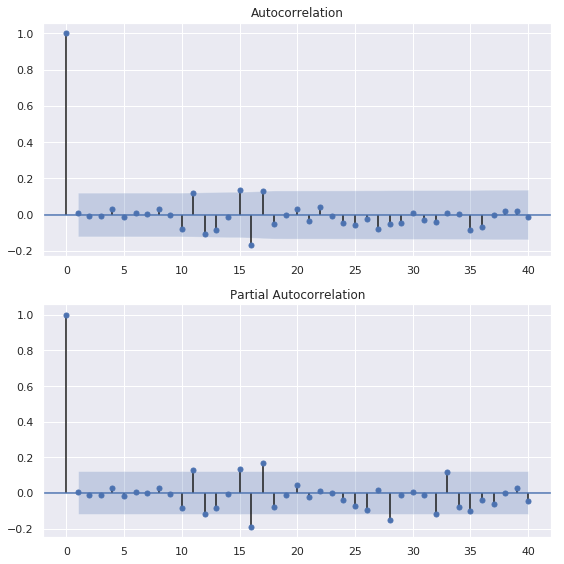

In [ ]:
# SRIMAモデル（ちょっとだけパラメータ最適化・総当たりaicベストを適用）
sarimax_optimization = sm.tsa.SARIMAX(daily_japan_diff_train, 
                        order=(5, 2, 1),
                        seasonal_order=(5, 2, 1, 7),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

sarimax_optimization_resid = sarimax_optimization.resid # 残差成分

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_optimization_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_optimization_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

<function matplotlib.pyplot.show(*args, **kw)>

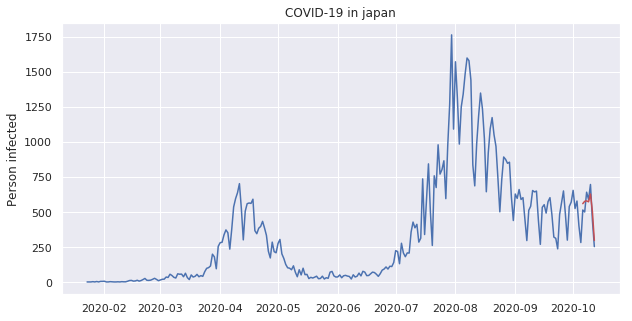

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff_train)
sarimax_eval = sarimax_optimization.predict('2020-10-06', '2020-10-12') 
plt.plot(sarimax_eval, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

In [ ]:
print(sarimax_eval)
eval_data = daily_japan_diff_train.iloc[-7:].copy()
print(eval_data)

2020-10-06    558.222074
2020-10-07    574.897348
2020-10-08    578.052132
2020-10-09    571.477123
2020-10-10    626.994819
2020-10-11    501.826989
2020-10-12    295.601694
Freq: D, dtype: float64
2020-10-06    513.0
2020-10-07    499.0
2020-10-08    640.0
2020-10-09    588.0
2020-10-10    695.0
2020-10-11    438.0
2020-10-12    252.0
Name: 151, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

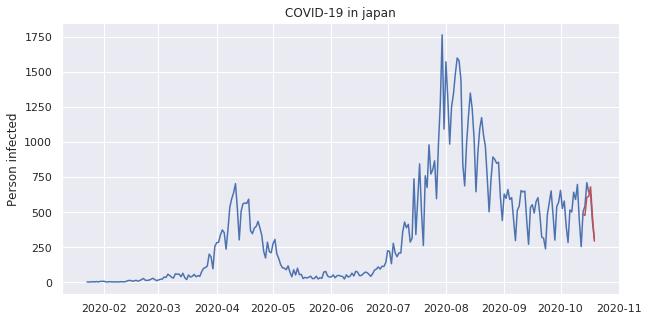

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff)
# plt.plot(test_data)
sarimax_pred = sarimax_optimization.predict('2020-10-13', '2020-10-19') 
plt.plot(sarimax_pred, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

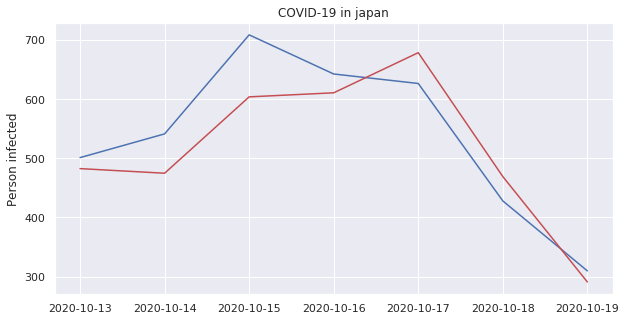

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test_data)
plt.plot(sarimax_pred, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show

In [ ]:
sarimax_pred_train = sarimax_optimization.predict('2020-01-23', '2020-10-12')
train_mae = mean_absolute_error(daily_japan_diff_train, sarimax_pred_train)
train_mse = mean_squared_error(daily_japan_diff_train, sarimax_pred_train)
train_rmse = np.sqrt(mean_squared_error(daily_japan_diff_train, sarimax_pred_train))
train_r2 = r2_score(daily_japan_diff_train, sarimax_pred_train)

test_mae = mean_absolute_error(test_data, sarimax_pred)
test_mse = mean_squared_error(test_data, sarimax_pred)
test_rmse = np.sqrt(mean_squared_error(test_data, sarimax_pred))
test_r2 = r2_score(test_data, sarimax_pred)

print('train_mae:'+str(train_mae))
print('train_mse:'+str(train_mse))
print('train_rmae:'+str(train_rmse))
print('train_r2:'+str(train_r2))
print('')
print('test_mae:'+str(test_mae))
print('test_mse:'+str(test_mse))
print('test_rmae:'+str(test_rmse))
print('test_r2:'+str(test_r2))

train_mae:67.447360953973
train_mse:11800.844713496912
train_rmae:108.63169295144448
train_r2:0.9179291439619065

test_mae:47.56166170315915
test_mse:3060.4462279767927
test_rmae:55.321299948363404
test_r2:0.8102598770033899


**おまけ**

<function matplotlib.pyplot.show(*args, **kw)>

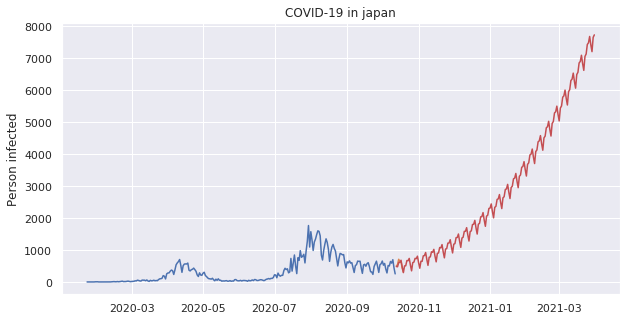

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(daily_japan_diff_train)
plt.plot(test_data)
sarimax_pred_year_end = sarimax_optimization.predict('2020-10-13', '2021-03-31') 
plt.plot(sarimax_pred_year_end, c="r")

plt.title('COVID-19 in japan')
plt.grid(True)
plt.ylabel('Person infected')
plt.show